# Telecom Churn - ML Group Case Study
##### By Subhasis Jethy and Trisit Kumar Chatterjee

### Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
- For many incumbent operators, retaining high profitable customers is the number one business goal. 
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

###### Steps:

- Analyse customer-level data of a leading telecom firm.
- Build predictive models to identify customers at high risk of churn.
- Identify the main indicators of churn.

#### Import Libraries 

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
pd.set_option('float_format', '{:f}'.format)
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer

# settings to see the data.
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_colwidth', 200)

from matplotlib import style
sns.set_style('darkgrid')
style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [269]:
# importing the data dictionary
dic = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

## Data Dictionary

In [270]:
dic

Acronyms      \
0   MOBILE_NUMBER   
1       CIRCLE_ID   
2             LOC   
3             STD   
4              IC   
5              OG   
6             T2T   
7         T2M       
8         T2O       
9         T2F       
10        T2C       
11       ARPU       
12        MOU       
13        AON       
14       ONNET      
15     OFFNET       
16           ROAM   
17         SPL      
18        ISD       
19       RECH       
20        NUM       
21        AMT       
22        MAX       
23       DATA       
24         3G       
25         AV       
26        VOL       
27         2G       
28        PCK       
29      NIGHT       
30    MONTHLY       
31      SACHET      
32        *.6       
33        *.7       
34        *.8       
35        *.9       
36        FB_USER   
37        VBC       

                                                                          Descriptions  
0                                                                Customer phone number  
1                                 Telecom circle area to which the customer belongs to  
2                                             Local calls - within same telecom circle  
3                                               STD calls - outside the calling circle  
4                                                                       Incoming calls  
5                                                                       Outgoing calls  
6                        Operator T to T, i.e. within same operator (mobile to mobile)  
7                                                  Operator T to other operator mobile  
8                                              Operator T to other operator fixed line  
9                                                       Operator T to fixed lines of T  
10                                                  Operator T to it’s own call center  
11                                                            Average revenue per user  
12                                                      Minutes of usage - voice calls  
13        Age on network - number of days the customer is using the operator T network  
14                                  All kind of calls within the same operator network  
15                                    All kind of calls outside the operator T network  
16                          Indicates that customer is in roaming zone during the call  
17                                                                       Special calls  
18                                                                           ISD calls  
19                                                                            Recharge  
20                                                                              Number  
21                                                            Amount in local currency  
22                                                                             Maximum  
23                                                                     Mobile internet  
24                                                                          3G network  
25                                                                             Average  
26                                                Mobile internet usage volume (in MB)  
27                                                                          2G network  
28                                              Prepaid service schemes called - PACKS  
29                                      Scheme to use during specific night hours only  
30                                 Service schemes with validity equivalent to a month  
31                                  Service schemes with validity smaller than a month  
32                                                           KPI for the month of June  
33                                                           KPI for the month of July  
34                                                         KPI for the

In [271]:
#Read the telecom churn csv file
telecom_churn_df = pd.read_csv("telecom_churn_data.csv")

In [272]:
telecom_churn_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109        0.000000        0.000000        0.000000   
1     7001865778        109        0.000000        0.000000        0.000000   
2     7001625959        109        0.000000        0.000000        0.000000   
3     7001204172        109        0.000000        0.000000        0.000000   
4     7000142493        109        0.000000        0.000000        0.000000   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9     arpu_6     arpu_7     arpu_8     arpu_9  \
0            9/30/2014 197.385000 214.816000 213.803000  21.100000   
1            9/30/2014  34.047000 355.074000 268.321000  86.285000   
2            9/30/2014 167.690000 189.058000 210.226000 290.714000   
3            9/30/2014 221.338000 251.102000 508.054000 389.500000   
4            9/30/2014 261.636000 309.876000 238.174000 163.426000   

   onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0          nan          nan     0.000000          nan           nan   
1    24.110000    78.680000     7.680000    18.340000     15.740000   
2    11.540000    55.240000    37.260000    74.810000    143.330000   
3    99.910000    54.390000   310.980000   241.710000    123.310000   
4    50.310000   149.440000    83.890000    58.780000     76.960000   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0           nan      0.000000           nan            nan            nan   
1     99.840000    304.760000     53.760000       0.000000       0.000000   
2    220.590000    208.360000    118.910000       0.000000       0.000000   
3    109.010000     71.680000    113.540000       0.000000      54.860000   
4     91.880000    124.260000     45.810000       0.000000       0.000000   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0       0.000000            nan            nan            nan       0.000000   
1       0.000000       0.000000       0.000000       0.000000       0.000000   
2       0.000000      38.490000       0.000000       0.000000       0.000000   
3      44.380000       0.000000       0.000000      28.090000      39.040000   
4       0.000000       0.000000       0.000000       0.000000       0.000000   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0            nan               nan               nan          0.000000   
1       0.000000         23.880000         74.560000          7.680000   
2      70.940000          7.190000         28.740000         13.580000   
3       0.000000         73.680000         34.810000         10.610000   
4       0.000000         50.310000        149.440000         83.890000   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0               nan               nan               nan          0.000000   
1         18.340000         11.510000         75.940000        291.860000   
2         14.390000         29.340000         16.860000         38.460000   
3         15.490000        107.430000         83.210000         22.460000   
4         58.780000         67.640000         91.880000        124.260000   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               nan               nan               nan          0.000000   
1         53.760000          0.000000          0.000000          0.000000   
2         28.160000         24.110000         21.790000         15.610000   
3         65.460000          1.910000          0.650000          4.910000   
4         37.890000          0.000

### Get unique elements in column

In [273]:
unique = telecom_churn_df.nunique()
#unique

In [274]:
#Eliminate columns with just singlel value
telecom_churn_df = telecom_churn_df[unique.index[unique.values>1]]

In [275]:
#Check for null values in the data columnwise
perc_na=round(100*(telecom_churn_df.isnull().sum()/len(telecom_churn_df.index)), 2)

In [276]:
# Create a dataframe with NA percentage
header=['Name']
perc_na_df=pd.DataFrame(perc_na,columns=header)

In [277]:
#Columns having 0-5% null values
na_5 = perc_na_df[(perc_na_df['Name']<=5.000) & (perc_na_df['Name']>00.00)]

In [278]:
#Columns having 5-10% null values
na_10 = perc_na_df[(perc_na_df['Name']<=10.000) & (perc_na_df['Name']>05.00)]

In [279]:
#Columns having more than 70% null values
na_70 = perc_na_df[(perc_na_df['Name']>=70.00)]

In [280]:
#Check for columns having between 10-70% null values
perc_na_df[(perc_na_df['Name']>10.000) & (perc_na_df['Name']<70.000)]

Empty DataFrame
Columns: [Name]
Index: []

#### It can be seen that there are no columns with 10-70% Null values

In [281]:
#Find the columns which have more than 70% null values
perc_na_df[perc_na_df['Name']>70.000].count()

Name    40
dtype: int64

#### It can be seen that there are 40 columns with > 70% Null values

In [282]:
#Check unique values of each column having null values greater than 70%
print("date_of_last_rech_data_6 --", telecom_churn_df.date_of_last_rech_data_6.unique())
print("date_of_last_rech_data_7 --", telecom_churn_df.date_of_last_rech_data_7.unique())
print("date_of_last_rech_data_8 --", telecom_churn_df.date_of_last_rech_data_8.unique())
print("date_of_last_rech_data_9 --", telecom_churn_df.date_of_last_rech_data_9.unique())
print("-"*100)
print("count_rech_2g_6 --", telecom_churn_df.count_rech_2g_6.unique())
print("count_rech_2g_7 --", telecom_churn_df.count_rech_2g_7.unique())
print("count_rech_2g_8 --", telecom_churn_df.count_rech_2g_8.unique())
print("count_rech_2g_9 --", telecom_churn_df.count_rech_2g_9.unique())
print("-"*100)
print("count_rech_3g_6 --", telecom_churn_df.count_rech_3g_6.unique())
print("count_rech_3g_7 --", telecom_churn_df.count_rech_3g_7.unique())
print("count_rech_3g_8 --", telecom_churn_df.count_rech_3g_8.unique())
print("count_rech_3g_9 --", telecom_churn_df.count_rech_3g_9.unique())
print("-"*100)
print("total_rech_data_6 --", telecom_churn_df.total_rech_data_6.unique())
print("total_rech_data_7 --", telecom_churn_df.total_rech_data_7.unique())
print("total_rech_data_8 --", telecom_churn_df.total_rech_data_8.unique())
print("total_rech_data_9 --", telecom_churn_df.total_rech_data_9.unique())
print("-"*100)
print("max_rech_data_6 --", telecom_churn_df.max_rech_data_6.unique())
print("max_rech_data_7 --", telecom_churn_df.max_rech_data_7.unique())
print("max_rech_data_8 --", telecom_churn_df.max_rech_data_8.unique())
print("max_rech_data_9 --", telecom_churn_df.max_rech_data_9.unique())
print("-"*100)
print("arpu_2g_6 --", telecom_churn_df.arpu_2g_6.unique())
print("arpu_2g_7 --", telecom_churn_df.arpu_2g_7.unique())
print("arpu_2g_8 --", telecom_churn_df.arpu_2g_8.unique())
print("arpu_2g_9 --", telecom_churn_df.arpu_2g_9.unique())
print("-"*100)
print("arpu_3g_6 --", telecom_churn_df.arpu_3g_6.unique())
print("arpu_3g_7 --", telecom_churn_df.arpu_3g_7.unique())
print("arpu_3g_8 --", telecom_churn_df.arpu_3g_8.unique())
print("arpu_3g_9 --", telecom_churn_df.arpu_3g_9.unique())
print("-"*100)
print("night_pck_user_6 --", telecom_churn_df.night_pck_user_6.unique())
print("night_pck_user_7 --", telecom_churn_df.night_pck_user_7.unique())
print("night_pck_user_8--", telecom_churn_df.night_pck_user_8.unique())
print("night_pck_user_9 --", telecom_churn_df.night_pck_user_9.unique())
print("-"*100)
print("fb_user_6 --", telecom_churn_df.fb_user_6.unique())
print("fb_user_7 --", telecom_churn_df.fb_user_7.unique())
print("fb_user_8 --", telecom_churn_df.fb_user_8.unique())
print("fb_user_9 --", telecom_churn_df.fb_user_9.unique())
print("-"*100)

date_of_last_rech_data_6 -- ['6/21/2014' nan '6/4/2014' '6/27/2014' '6/30/2014' '6/6/2014' '6/2/2014'
 '6/12/2014' '6/19/2014' '6/29/2014' '6/5/2014' '6/17/2014' '6/11/2014'
 '6/25/2014' '6/10/2014' '6/20/2014' '6/23/2014' '6/13/2014' '6/26/2014'
 '6/16/2014' '6/14/2014' '6/24/2014' '6/28/2014' '6/15/2014' '6/9/2014'
 '6/22/2014' '6/1/2014' '6/8/2014' '6/7/2014' '6/18/2014' '6/3/2014']
date_of_last_rech_data_7 -- ['7/16/2014' '7/25/2014' nan '7/31/2014' '7/23/2014' '7/7/2014'
 '7/27/2014' '7/2/2014' '7/28/2014' '7/12/2014' '7/4/2014' '7/5/2014'
 '7/6/2014' '7/26/2014' '7/19/2014' '7/10/2014' '7/11/2014' '7/29/2014'
 '7/18/2014' '7/9/2014' '7/24/2014' '7/14/2014' '7/13/2014' '7/22/2014'
 '7/30/2014' '7/20/2014' '7/21/2014' '7/15/2014' '7/8/2014' '7/17/2014'
 '7/1/2014' '7/3/2014']
date_of_last_rech_data_8 -- ['8/8/2014' '8/10/2014' nan '8/23/2014' '8/24/2014' '8/21/2014'
 '8/30/2014' '8/6/2014' '8/25/2014' '8/7/2014' '8/26/2014' '8/11/2014'
 '8/2/2014' '8/31/2014' '8/20/2014' '8/29/2014

## Data Cleaning

In [283]:
#As Night pack user and fb user columns have only 0 and 1s. Let's impute by adding min value
for column in telecom_churn_df.filter(regex ='user').columns:
    telecom_churn_df[column].replace(np.nan, 0, inplace = True)

In [284]:
# drop column with > 70% missing values
telecom_churn_df.drop(na_70.index, axis=1, inplace=True)

In [285]:
#After imputing all the variables having null values more than 70%, let's verify the null values which are above 70%
perc_na=round(100*(telecom_churn_df.isnull().sum()/len(telecom_churn_df.index)), 2)
perc_na.where(perc_na>10).count()

0

In [286]:
telecom_churn_df.shape

(99999, 170)

In [287]:
round(100*(telecom_churn_df.isnull().sum()/len(telecom_churn_df.index)), 2).max()

7.75

In [288]:
#impute date columns
date_columns = telecom_churn_df.filter(regex ='date').columns

In [289]:
for d in date_columns:
    telecom_churn_df[d] = pd.to_datetime(telecom_churn_df[d]).dt.day
    telecom_churn_df[d].fillna(int(telecom_churn_df[d].mean()), inplace=True)

In [290]:
#check the type of  variables in data frame
telecom_churn_df.dtypes.value_counts()

float64    136
int64       34
dtype: int64

### Impute columns where nan values % is less than 10

In [291]:
#impute the missing values for variables having upto 10%
perc_na_df_10=perc_na_df[(perc_na_df['Name']<10) & (perc_na_df['Name']>0)]
perc_na_df_10.count()

Name    112
dtype: int64

In [292]:
columns_name = telecom_churn_df.columns

**Impute Using Iterative Imputer** <br>
Iterative imputation refers to a process where each feature is modeled as a function of the other features, e.g. a regression problem where missing values are predicted. Each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features.

It is iterative because this process is repeated multiple times, allowing ever improved estimates of missing values to be calculated as missing values across all features are estimated.

In [293]:
# Impute remaining values using iterative imputer
telecom_churn_df = pd.DataFrame(IterativeImputer().fit_transform(telecom_churn_df))

In [294]:
#Check if null values exist
telecom_churn_df.isnull().sum().sum()

0

In [295]:
telecom_churn_df.columns = columns_name
telecom_churn_df.shape

(99999, 170)

*******

### Find the High Value Customer

In [296]:
telecom_churn_df.head()

mobile_number     arpu_6     arpu_7     arpu_8     arpu_9  onnet_mou_6  \
0 7000842753.000000 197.385000 214.816000 213.803000  21.100000   -44.441260   
1 7001865778.000000  34.047000 355.074000 268.321000  86.285000    24.110000   
2 7001625959.000000 167.690000 189.058000 210.226000 290.714000    11.540000   
3 7001204172.000000 221.338000 251.102000 508.054000 389.500000    99.910000   
4 7000142493.000000 261.636000 309.876000 238.174000 163.426000    50.310000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0   -16.626879     0.000000   -32.635975    186.655037    174.503632   
1    78.680000     7.680000    18.340000     15.740000     99.840000   
2    55.240000    37.260000    74.810000    143.330000    220.590000   
3    54.390000   310.980000   241.710000    123.310000    109.010000   
4   149.440000    83.890000    58.780000     76.960000     91.880000   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0      0.000000    172.488316      33.384589      21.765564       0.000000   
1    304.760000     53.760000       0.000000       0.000000       0.000000   
2    208.360000    118.910000       0.000000       0.000000       0.000000   
3     71.680000    113.540000       0.000000      54.860000      44.380000   
4    124.260000     45.810000       0.000000       0.000000       0.000000   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0      21.134681      13.974210       5.455436       0.000000       3.273248   
1       0.000000       0.000000       0.000000       0.000000       0.000000   
2      38.490000       0.000000       0.000000       0.000000      70.940000   
3       0.000000       0.000000      28.090000      39.040000       0.000000   
4       0.000000       0.000000       0.000000       0.000000       0.000000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0         41.029074         27.181765          0.000000         34.850041   
1         23.880000         74.560000          7.680000         18.340000   
2          7.190000         28.740000         13.580000         14.390000   
3         73.680000         34.810000         10.610000         15.490000   
4         50.310000        149.440000         83.890000         58.780000   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0         93.343652         91.393394          0.000000         90.450448   
1         11.510000         75.940000        291.860000         53.760000   
2         29.340000         16.860000         38.460000         28.160000   
3        107.430000         83.210000         22.460000         65.460000   
4         67.640000         91.880000        124.260000         37.890000   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0          3.752945          3.801149          0.000000          3.663919   
1          0.000000          0.000000          0.000000          0.000000   
2         24.110000         21.790000         15.610000         22.240000   
3          1.910000          0.650000          4.910000          2.060000   
4          0.000000          0.000000          0.000000          1.930000   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0         -7.824052        -14.679546          0.000000        -10.582960   
1          0.000000          2.910000          0.000000          0.000000   
2          0.000000        135.540000         45.760000          0.480000   
3          0.000000          0.000000          0.000000          0.000000   
4          0.000000          0.000000          0.000000          0.000000   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0      5.192725    -12.600261      0.000000    -21.355671         92.113823   
1     35.390000    150.510000    299.540000     72.110000          0.230000   
2     60.660000     67.410000     67.660000     64.81

### In this case study, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

#### Get total avg recharge amount for 6th and 7th months - Good phase

In [297]:
telecom_churn_df.total_rech_amt_avg = (telecom_churn_df.total_rech_amt_6 +telecom_churn_df.total_rech_amt_7)/2

##### Find total avg recharge amount for 6th and 7th months - Good phase

In [298]:
#Finding good phase for filtering High Value Customer
telecom_churn_df.total_rech_amt_good_phase=(telecom_churn_df.total_rech_amt_avg)

In [299]:
telecom_churn_df.total_rech_amt_good_phase.describe()

count   99999.000000
mean      325.238792
std       370.833466
min         0.000000
25%       115.000000
50%       229.000000
75%       419.000000
max     37762.500000
dtype: float64

Compute the 70 percentile of High Value Customer data set

In [300]:
_70percentile = telecom_churn_df.total_rech_amt_good_phase.quantile(q=0.7)

In [301]:
print(_70percentile)

368.5


##### Fetching High Value customer of more than 70th percentile(inclusive) of data set

In [302]:
telecom_churn_df_high = telecom_churn_df[(telecom_churn_df.total_rech_amt_good_phase >= _70percentile)]

In [303]:
telecom_churn_df_high.describe()

mobile_number       arpu_6       arpu_7       arpu_8       arpu_9  \
count      30011.000000 30011.000000 30011.000000 30011.000000 30011.000000   
mean  7001222923.595415   587.284404   589.135427   534.857433   488.656197   
std       684640.490765   442.722413   462.897814   492.259586   496.486834   
min   7000000074.000000 -2258.709000 -2014.045000  -945.808000 -1899.505000   
25%   7000641091.500000   364.161000   365.004500   289.609500   239.184000   
50%   7001231966.000000   495.682000   493.561000   452.091000   413.152000   
75%   7001813975.000000   703.922000   700.788000   671.150000   635.553000   
max   7002410905.000000 27731.088000 35145.834000 33543.624000 38805.617000   

       onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
count 30011.000000 30011.000000 30011.000000 30011.000000  30011.000000   
mean    295.569095   304.177482   266.231669   238.881456    419.897849   
std     461.097199   481.891849   467.416954   443.904787    469.227235   
min     -66.392577  -318.468500  -505.550034  -327.784138      0.000000   
25%      41.130000    40.960000    27.010000    18.140000    142.825000   
50%     125.830000   125.460000    99.440000    82.880000    282.190000   
75%     353.310000   359.925000   297.735000   260.785000    523.125000   
max    7376.710000  8157.780000 10752.560000 10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  30011.000000  30011.000000  30011.000000   30011.000000   30011.000000   
mean     425.689319    380.458608    346.893216      17.777083      13.733325   
std      485.299926    474.167108    438.897754      79.201308      76.346868   
min        0.000000      0.000000      0.000000    -156.445548     -91.719658   
25%      141.185000    111.730000     96.350000       0.000000       0.000000   
50%      281.940000    240.940000    208.210000       0.000000       0.000000   
75%      532.695000    482.610000    434.430000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000    2613.310000    3813.290000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   30011.000000   30011.000000   30011.000000   30011.000000   
mean       14.501703      12.897269      29.470348      22.092268   
std        74.932934      68.629380     118.542431      97.914354   
min      -381.036217    -244.379293       0.000000     -16.385771   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4169.810000    3220.660000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30011.000000   30011.000000      30011.000000      30011.000000   
mean       21.712007      17.429070         95.112707         96.004162   
std       106.204486      90.164106        236.713549        248.041607   
min       -11.994015      -4.028684          0.000000          0.000000   
25%         0.000000       0.000000          8.990000          9.760000   
50%         0.000000       0.000000         34.010000         33.160000   
75%         0.000000       0.000000         91.460000         91.480000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      30011.000000      30011.000000      30011.000000      30011.000000   
mean          88.061124         82.734005        182.262445        182.194259   
std          234.435807        227.370634        249.600630        240.200096   
min            0.000000          0.000000          0.000000          0.000000   
25%            7.760000          6.835000         32.210000         35.560000   
50%           29.472104         32.610000        101.240000        104.340000   
75%           84.670000    

In [304]:
#round(100*(telecom_churn_df_high.isnull().sum()/len(telecom_churn_df_high.index)), 2)

##### Including churn information to dataframe

In [305]:
telecom_churn_df_high['usage_9'] = telecom_churn_df_high['total_ic_mou_9'] + telecom_churn_df_high['total_og_mou_9'] + telecom_churn_df_high['vol_3g_mb_9'] + telecom_churn_df_high['vol_2g_mb_9']

##### Get the churn data from 9th(Sept) month of data

In [306]:
telecom_churn_df_high["churn_data"] = [1 if value == 0 else 0 for value in telecom_churn_df_high.usage_9]

In [307]:
telecom_churn_df_high["churn_data"].describe()

count   30011.000000
mean        0.086402
std         0.280961
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: churn_data, dtype: float64

Review the churn data percentage 

In [308]:
(telecom_churn_df_high["churn_data"].sum()/telecom_churn_df_high["churn_data"].count())*100

8.64016527273333

Dropping 9th(Sept) month columns from data set 

In [309]:
drop_columns = telecom_churn_df_high.filter(regex ='9').columns
telecom_churn_df_high.drop(drop_columns, axis=1,inplace=True)

In [310]:
#Checking the shape of clean data after finding high value customers
telecom_churn_df_high.shape

(30011, 130)

## Derived metrics

In [311]:
# Find out ratio of revenue on happy/action phase
telecom_churn_df_high['arpu_ratio'] = ((telecom_churn_df_high.arpu_6 + telecom_churn_df_high.arpu_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.arpu_8]

In [312]:
# Find out if customer centre call were made more in action phase
telecom_churn_df_high['call_centre_ratio'] = ((telecom_churn_df_high.loc_og_t2c_mou_6 + telecom_churn_df_high.loc_og_t2c_mou_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.loc_og_t2c_mou_8]

In [313]:
# Find out ratio of usage from other network
telecom_churn_df_high['network_usage_diff'] = (telecom_churn_df_high.onnet_mou_8) - ( telecom_churn_df_high.offnet_mou_8)
# Find out ratio of usage from other network
telecom_churn_df_high['network_usage_diff_good'] = (telecom_churn_df_high.onnet_mou_6 + telecom_churn_df_high.onnet_mou_7 - telecom_churn_df_high.offnet_mou_6 - telecom_churn_df_high.offnet_mou_6)/2

In [314]:
# Find ratio of good/action for 2g
telecom_churn_df_high['2g_usage_ratio'] = ((telecom_churn_df_high.vol_2g_mb_6 + telecom_churn_df_high.vol_2g_mb_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.vol_2g_mb_8]

In [315]:
# Find ratio of good/action for 3g
telecom_churn_df_high['3g_usage_ratio'] = ((telecom_churn_df_high.vol_3g_mb_6 + telecom_churn_df_high.vol_3g_mb_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.vol_3g_mb_8]

In [316]:
# Find ratio of good/action for outgoing call
telecom_churn_df_high['og_ratio'] = ((telecom_churn_df_high.total_og_mou_6 + telecom_churn_df_high.total_og_mou_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.total_og_mou_8]

In [317]:
# Find ratio of good/action for outgoing call
telecom_churn_df_high['ic_ratio'] = ((telecom_churn_df_high.total_ic_mou_6 + telecom_churn_df_high.total_ic_mou_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.total_ic_mou_8]

In [318]:
# Find ratio of good/action for vbc
telecom_churn_df_high['vbc_difference'] = ((telecom_churn_df_high.jun_vbc_3g + telecom_churn_df_high.jul_vbc_3g)/2) - [1 if x ==0 else x for x in telecom_churn_df_high.aug_vbc_3g]

# Exploratory Data Analysis

In [319]:
# checking variance to see which columns hold most information
round(100*(np.var(telecom_churn_df_high.drop('mobile_number' , axis =1))/np.var(telecom_churn_df_high.drop('mobile_number' , axis =1)).sum()), 2).sort_values().tail()

vol_3g_mb_7    4.370000
vol_3g_mb_8    4.400000
vol_3g_mb_6    4.470000
aon            5.670000
arpu_ratio    12.250000
dtype: float64

In [320]:
telecom_churn_df_high.describe()

mobile_number       arpu_6       arpu_7       arpu_8  onnet_mou_6  \
count      30011.000000 30011.000000 30011.000000 30011.000000 30011.000000   
mean  7001222923.595415   587.284404   589.135427   534.857433   295.569095   
std       684640.490765   442.722413   462.897814   492.259586   461.097199   
min   7000000074.000000 -2258.709000 -2014.045000  -945.808000   -66.392577   
25%   7000641091.500000   364.161000   365.004500   289.609500    41.130000   
50%   7001231966.000000   495.682000   493.561000   452.091000   125.830000   
75%   7001813975.000000   703.922000   700.788000   671.150000   353.310000   
max   7002410905.000000 27731.088000 35145.834000 33543.624000  7376.710000   

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count 30011.000000 30011.000000  30011.000000  30011.000000  30011.000000   
mean    304.177482   266.231669    419.897849    425.689319    380.458608   
std     481.891849   467.416954    469.227235    485.299926    474.167108   
min    -318.468500  -505.550034      0.000000      0.000000      0.000000   
25%      40.960000    27.010000    142.825000    141.185000    111.730000   
50%     125.460000    99.440000    282.190000    281.940000    240.940000   
75%     359.925000   297.735000    523.125000    532.695000    482.610000   
max    8157.780000 10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30011.000000   30011.000000   30011.000000   30011.000000   
mean       17.777083      13.733325      14.501703      29.470348   
std        79.201308      76.346868      74.932934     118.542431   
min      -156.445548     -91.719658    -381.036217       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30011.000000   30011.000000      30011.000000      30011.000000   
mean       22.092268      21.712007         95.112707         96.004162   
std        97.914354     106.204486        236.713549        248.041607   
min       -16.385771     -11.994015          0.000000          0.000000   
25%         0.000000       0.000000          8.990000          9.760000   
50%         0.000000       0.000000         34.010000         33.160000   
75%         0.000000       0.000000         91.460000         91.480000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      30011.000000      30011.000000      30011.000000      30011.000000   
mean          88.061124        182.262445        182.194259        170.459638   
std          234.435807        249.600630        240.200096        233.353653   
min            0.000000          0.000000          0.000000          0.000000   
25%            7.760000         32.210000         35.560000         28.480000   
50%           29.472104        101.240000        104.340000         91.774949   
75%           84.670000        240.165000        239.485000        223.590000   
max        10752.560000       4729.740000       4557.140000       4961.330000   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count      30011.000000      30011.000000      30011.000000      30011.000000   
mean           7.018846          7.135646          6.608886          1.485319   
std           22.656587         22.580001         20.193272          6.954470   
min            0.000000          0.000000          0.000000        -12.079890   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.430000          0.480000          0.450000          0.000000   
75%      

# Univariate analysis

mobile_number


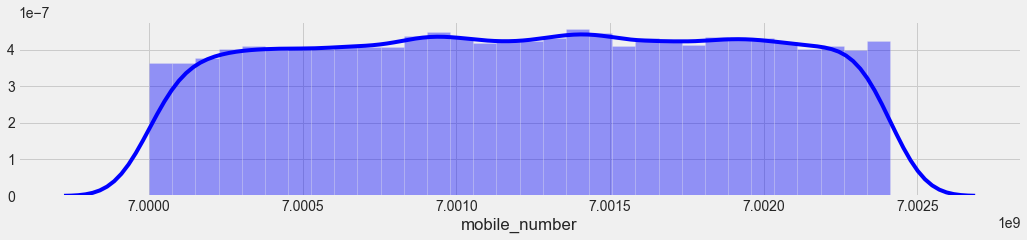

arpu_6


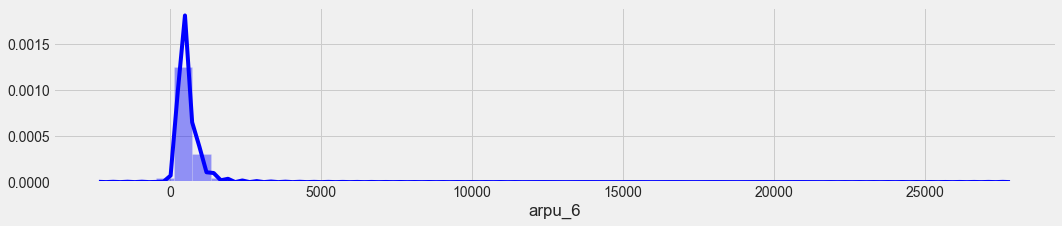

arpu_7


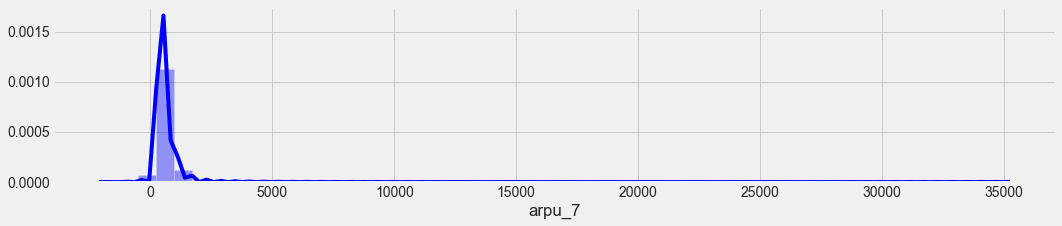

arpu_8


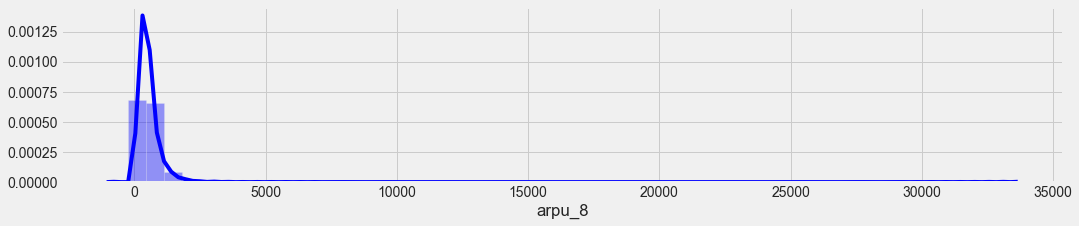

onnet_mou_6


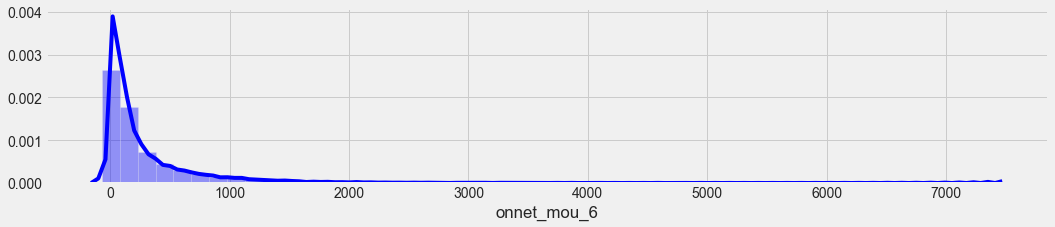

onnet_mou_7


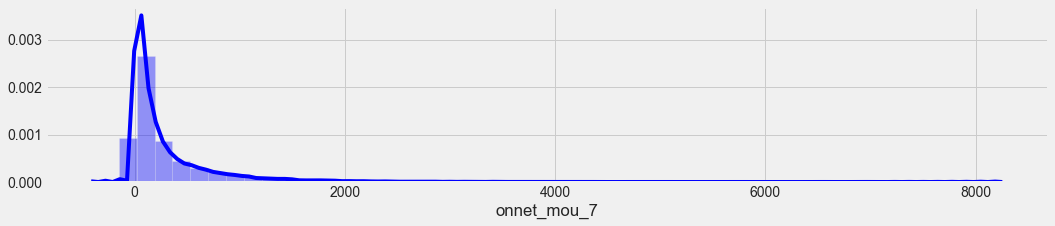

onnet_mou_8


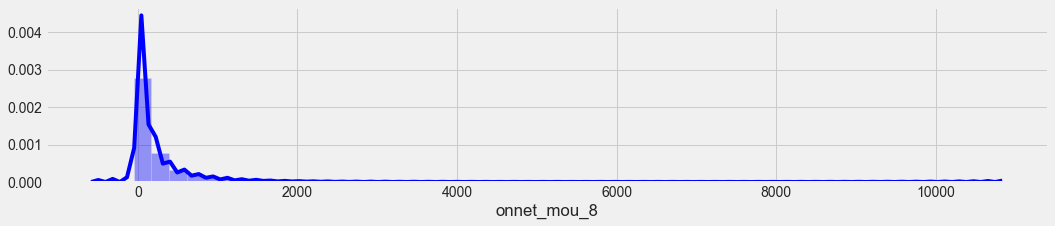

offnet_mou_6


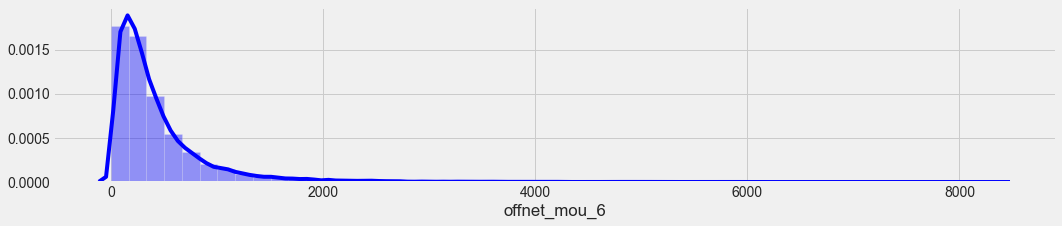

offnet_mou_7


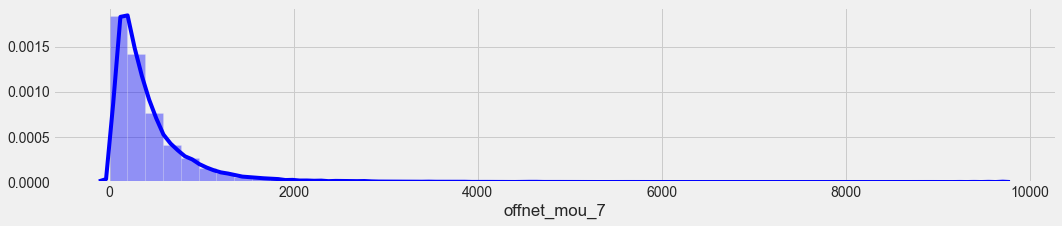

offnet_mou_8


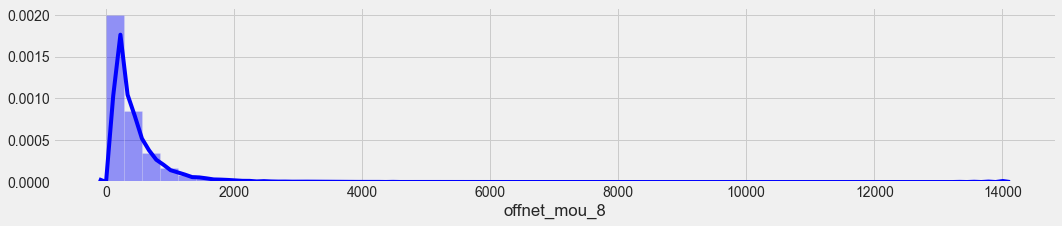

roam_ic_mou_6


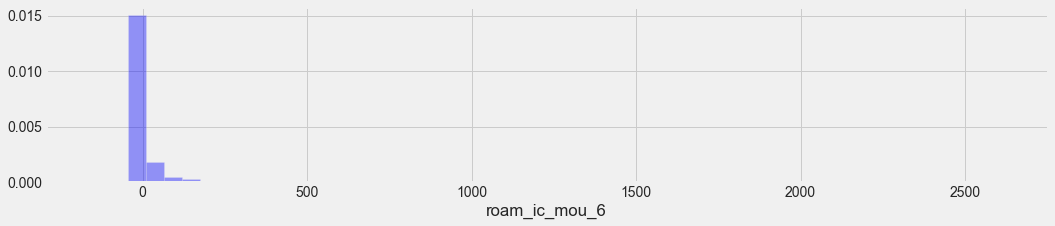

roam_ic_mou_7


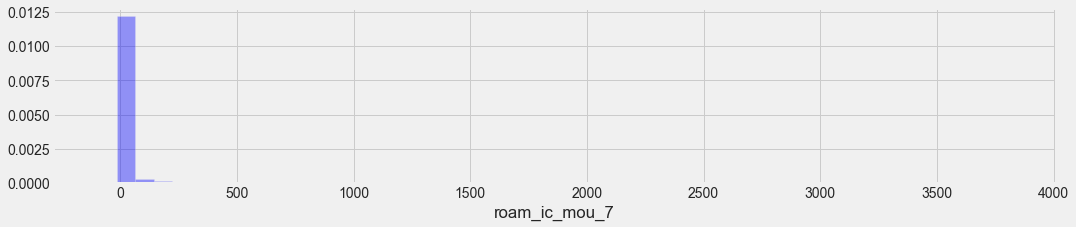

roam_ic_mou_8


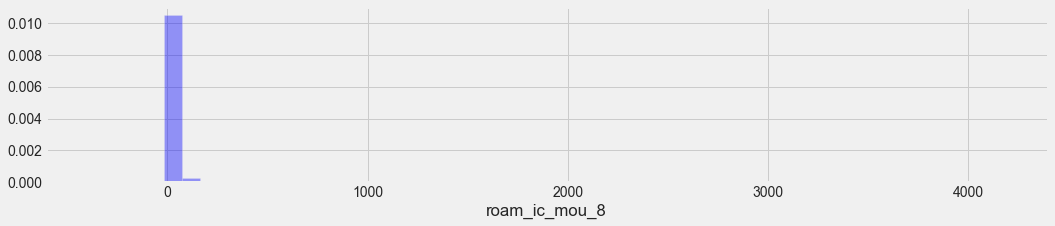

roam_og_mou_6


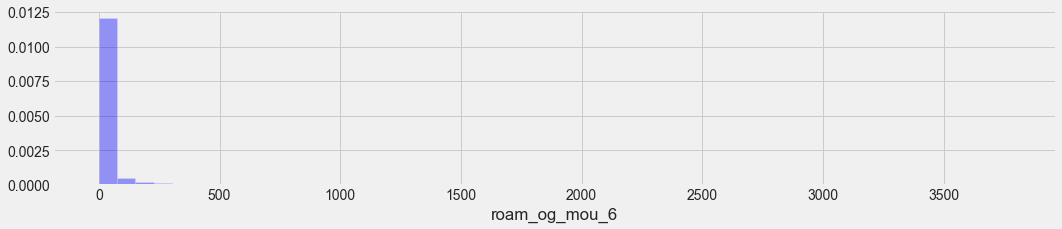

roam_og_mou_7


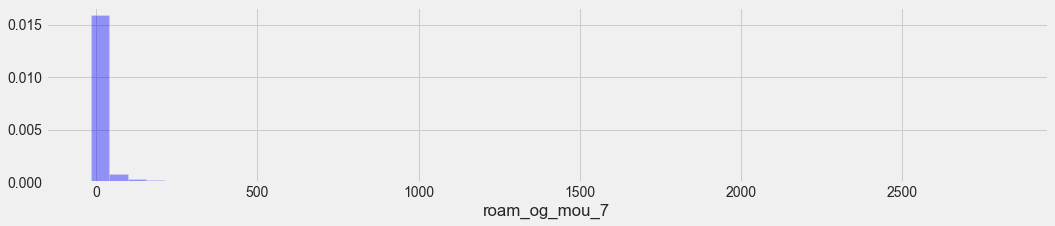

roam_og_mou_8


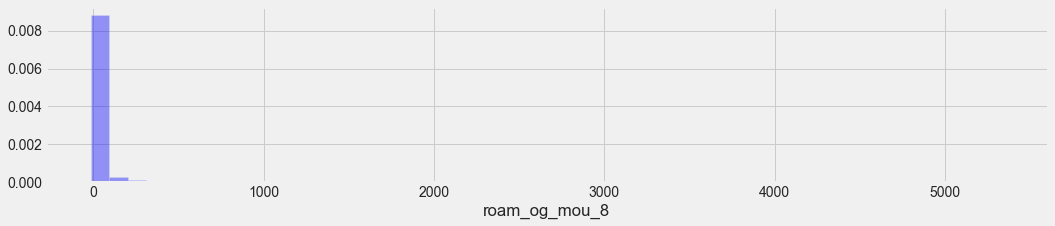

loc_og_t2t_mou_6


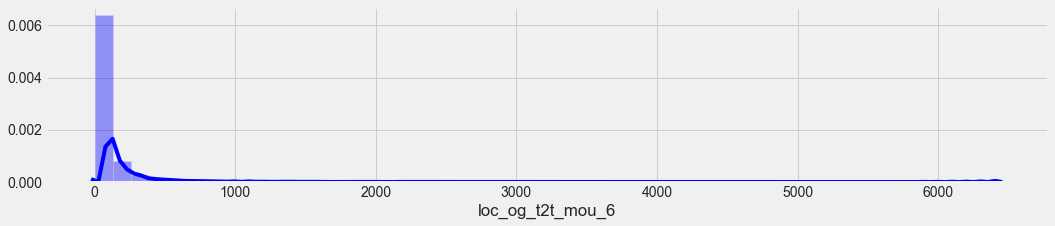

loc_og_t2t_mou_7


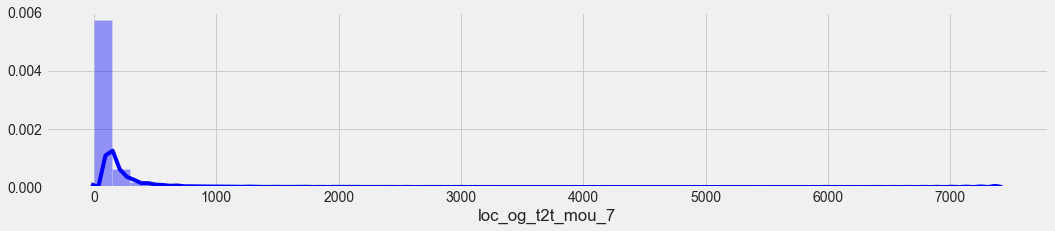

loc_og_t2t_mou_8


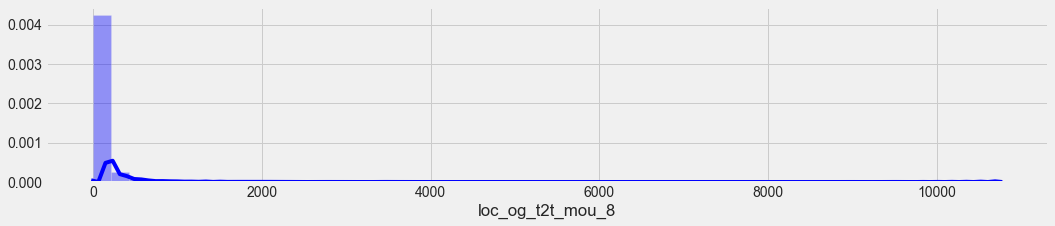

loc_og_t2m_mou_6


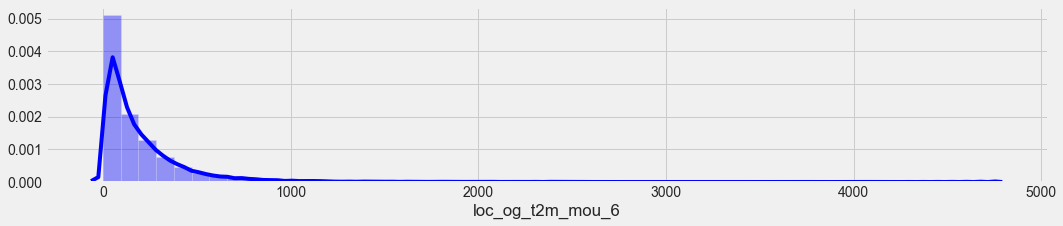

loc_og_t2m_mou_7


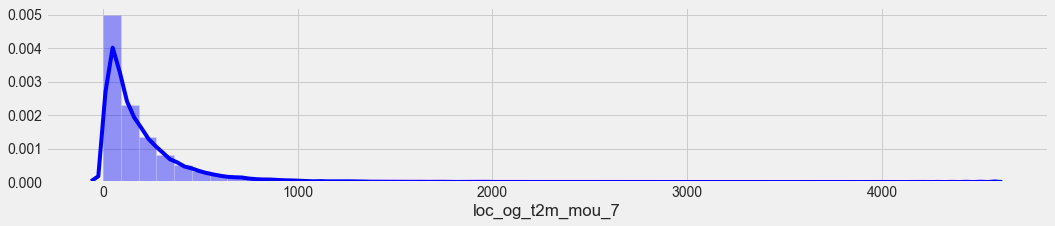

loc_og_t2m_mou_8


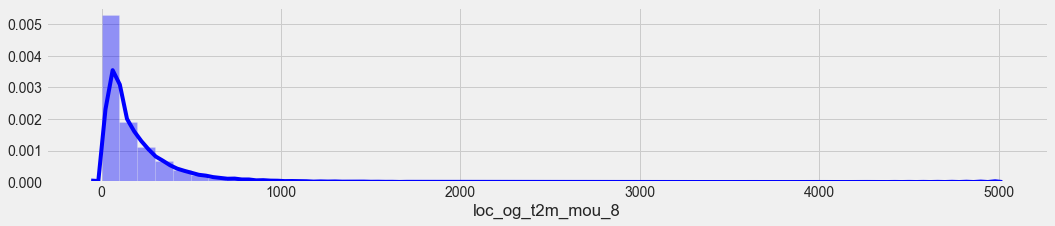

loc_og_t2f_mou_6


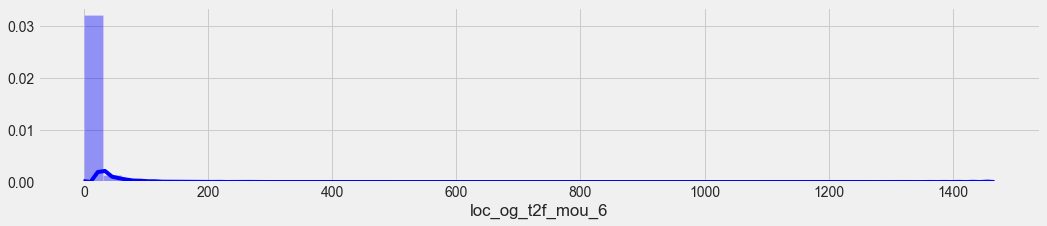

loc_og_t2f_mou_7


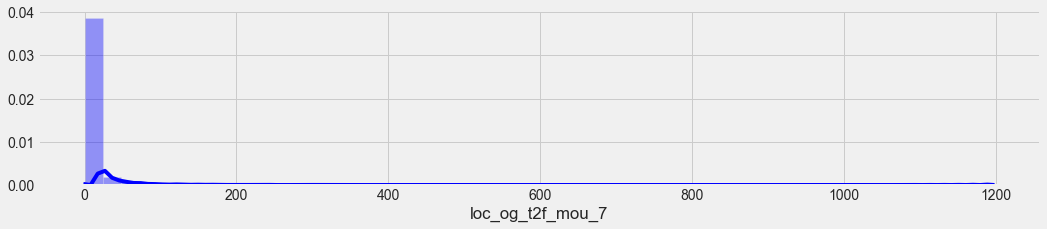

loc_og_t2f_mou_8


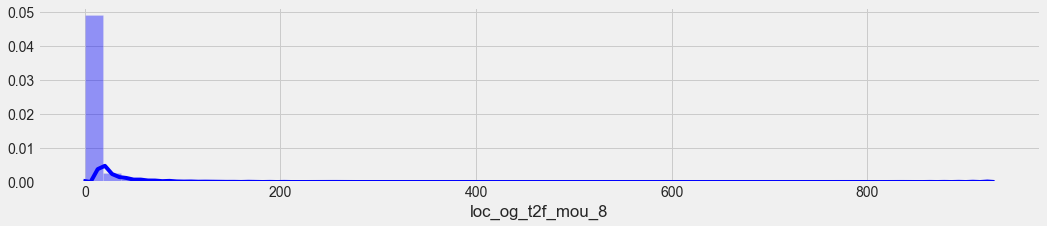

loc_og_t2c_mou_6


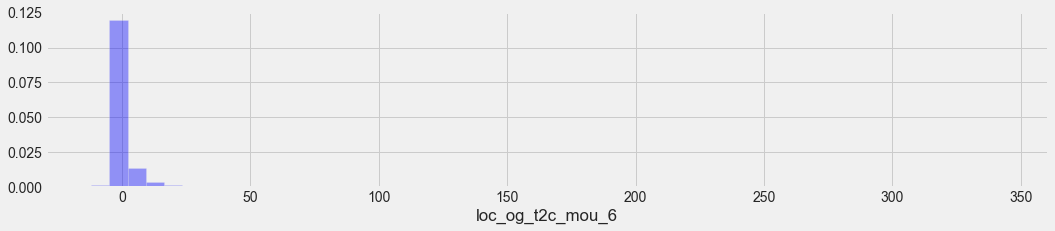

loc_og_t2c_mou_7


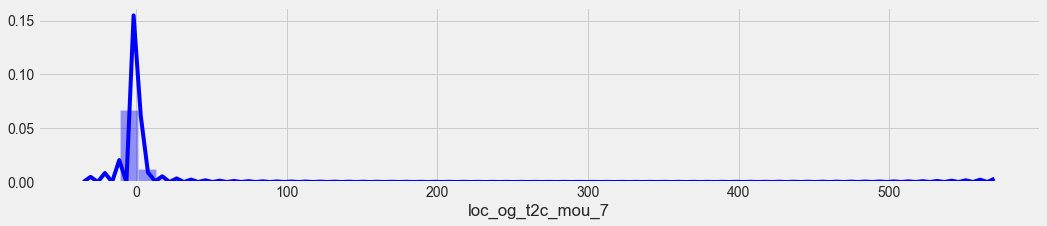

loc_og_t2c_mou_8


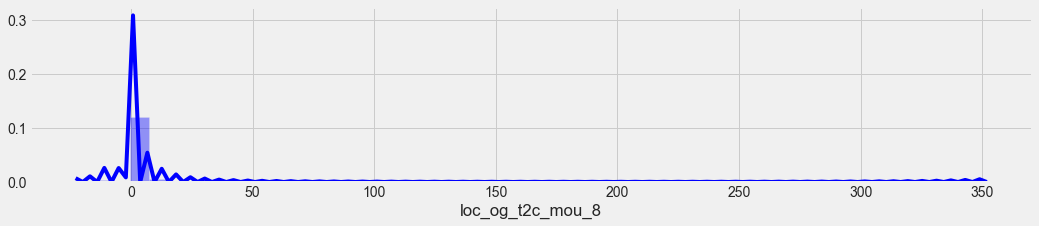

loc_og_mou_6


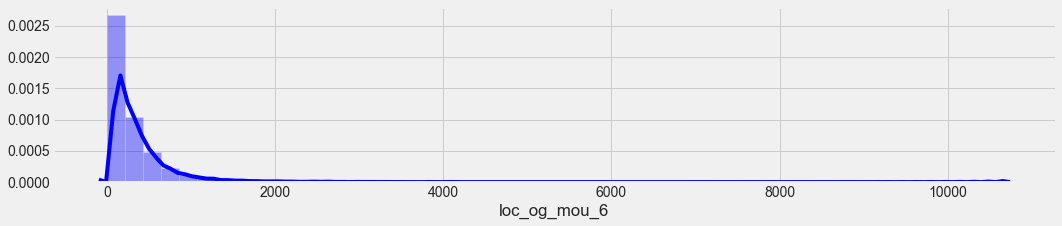

loc_og_mou_7


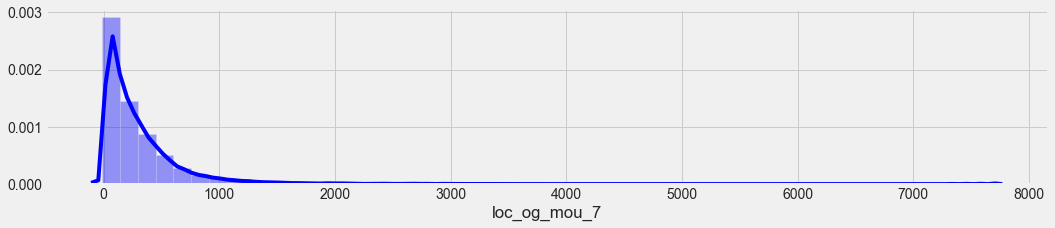

loc_og_mou_8


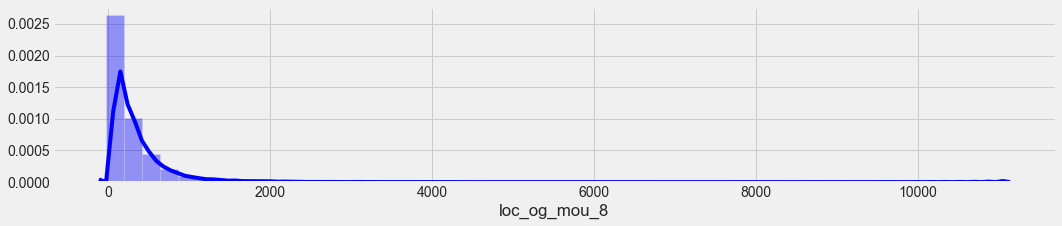

std_og_t2t_mou_6


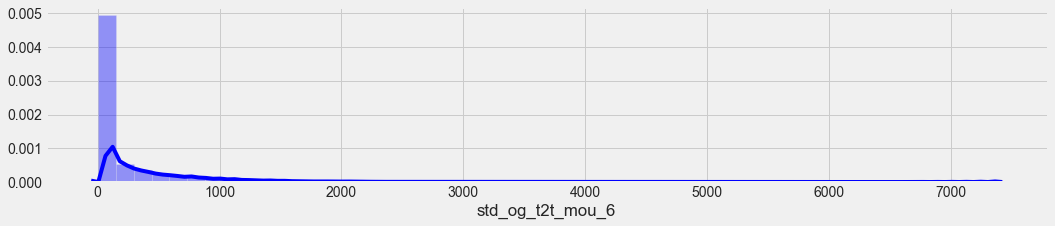

std_og_t2t_mou_7


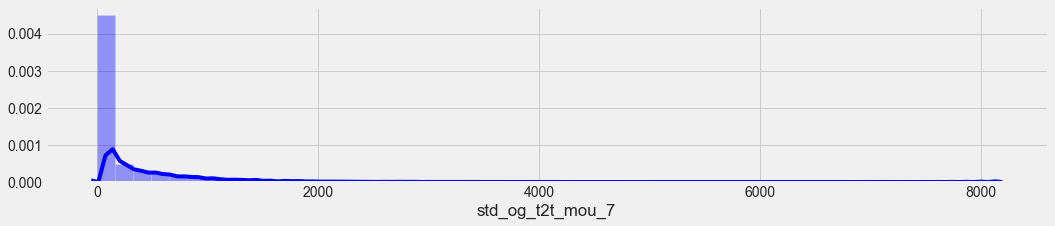

std_og_t2t_mou_8


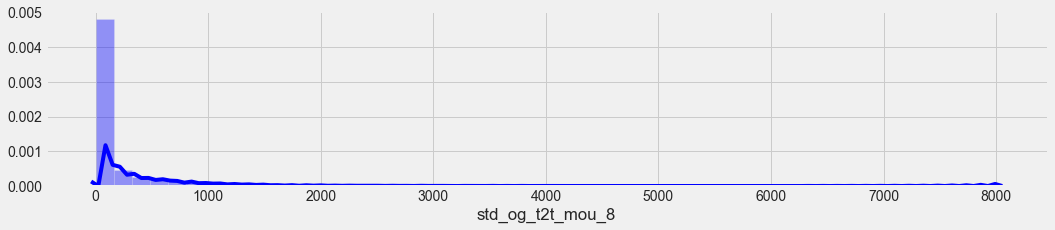

std_og_t2m_mou_6


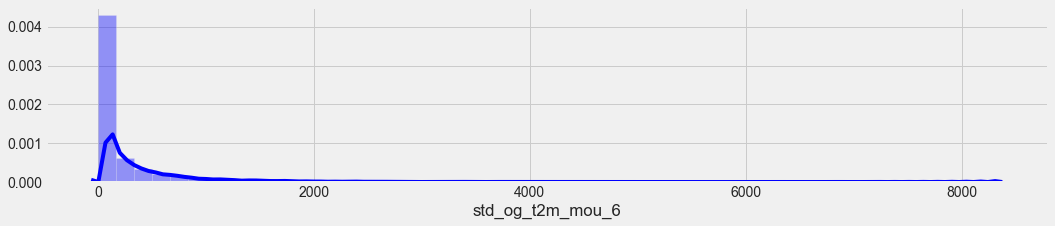

std_og_t2m_mou_7


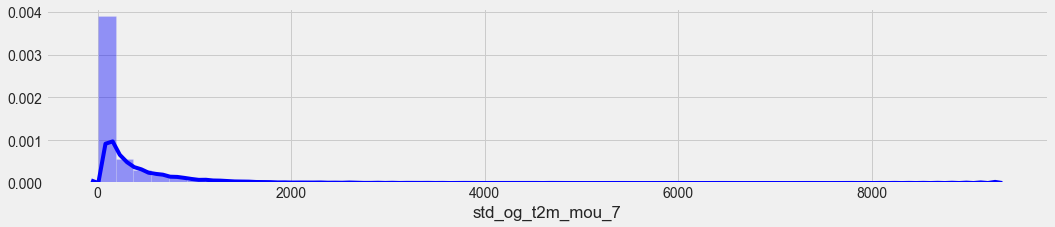

std_og_t2m_mou_8


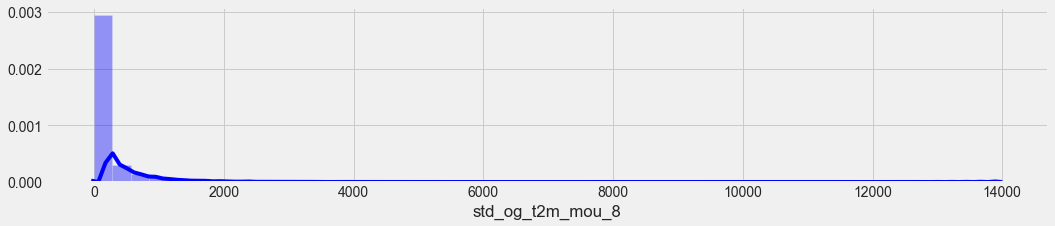

std_og_t2f_mou_6


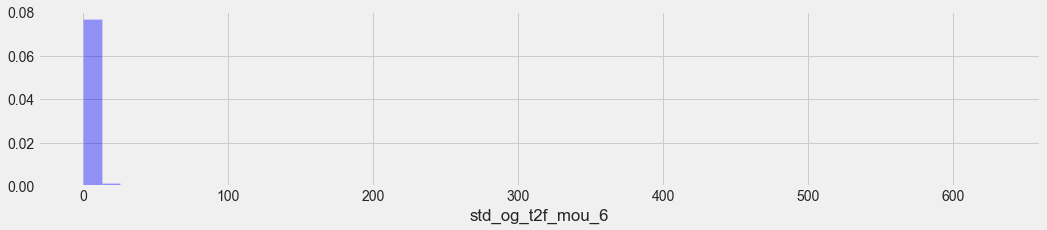

std_og_t2f_mou_7


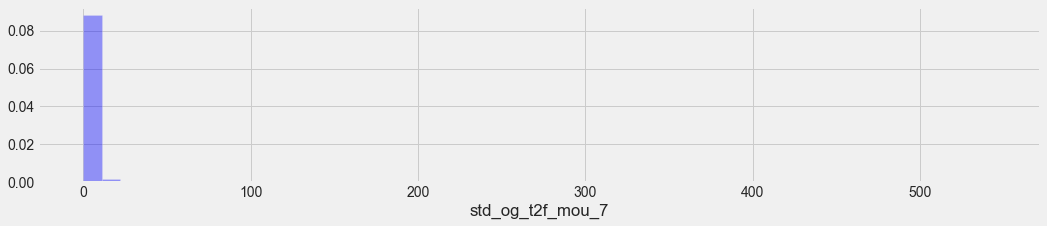

std_og_t2f_mou_8


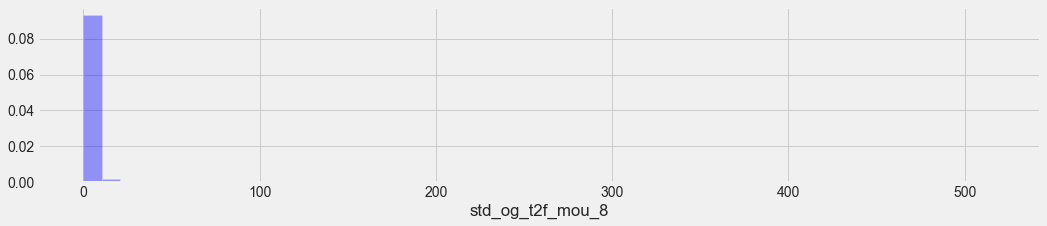

std_og_mou_6


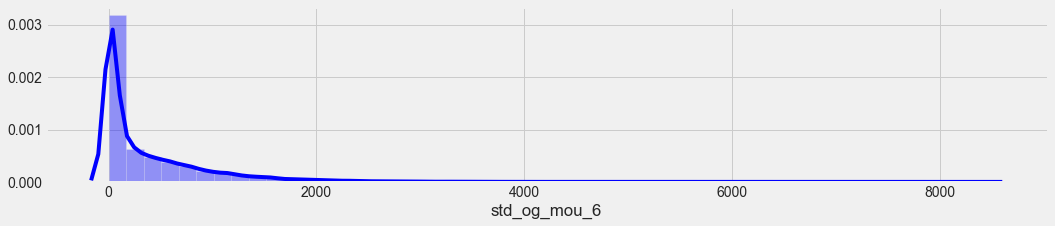

std_og_mou_7


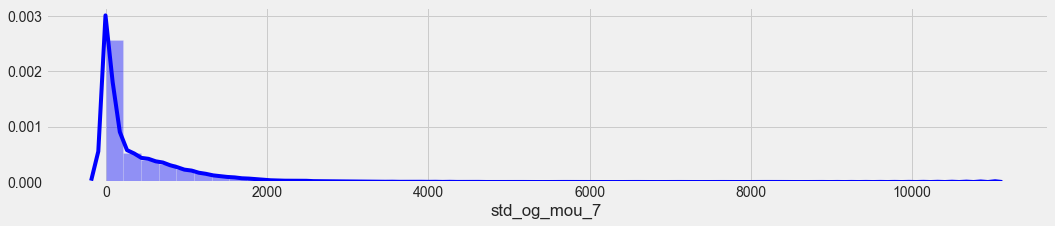

std_og_mou_8


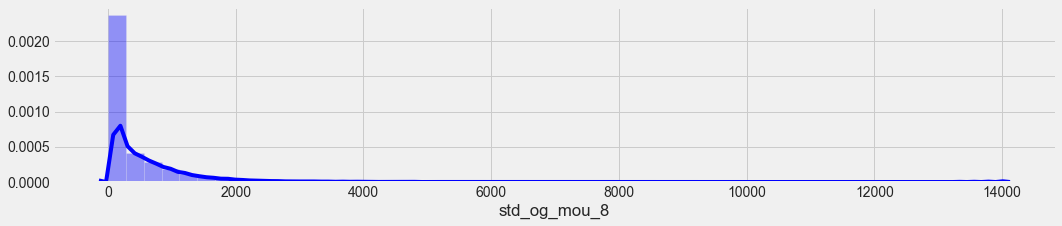

isd_og_mou_6


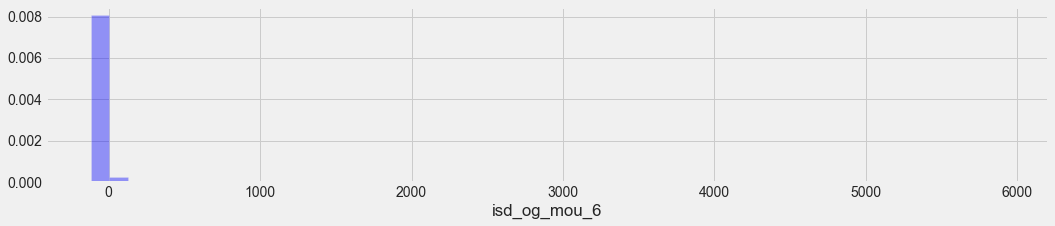

isd_og_mou_7


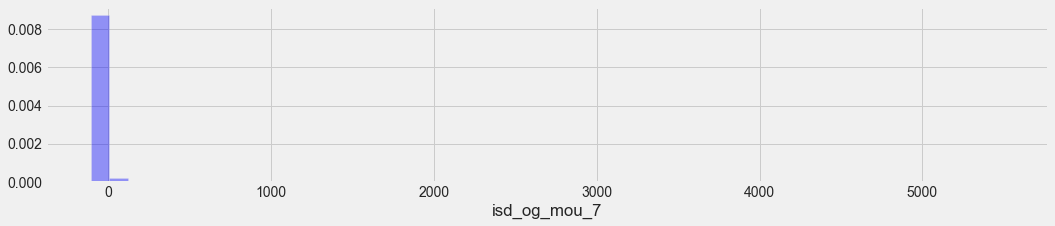

isd_og_mou_8


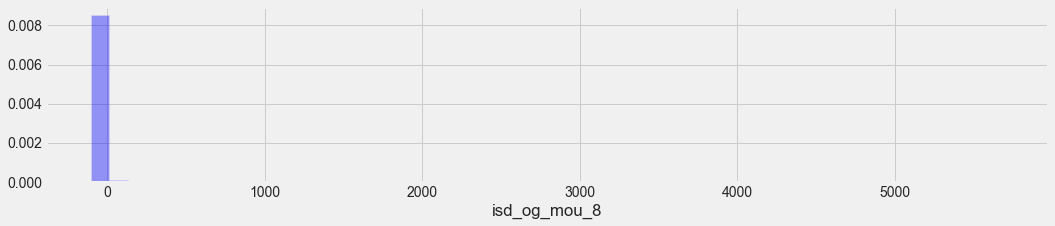

spl_og_mou_6


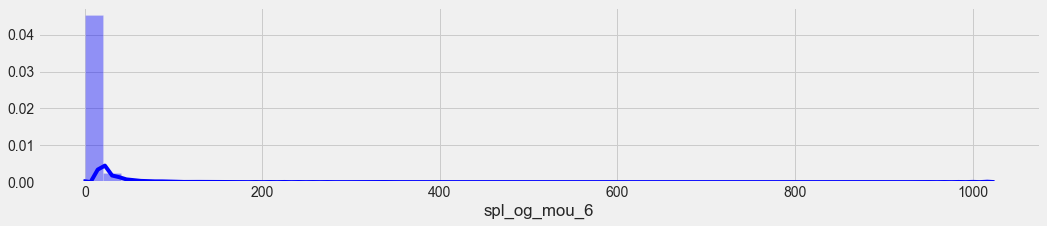

spl_og_mou_7


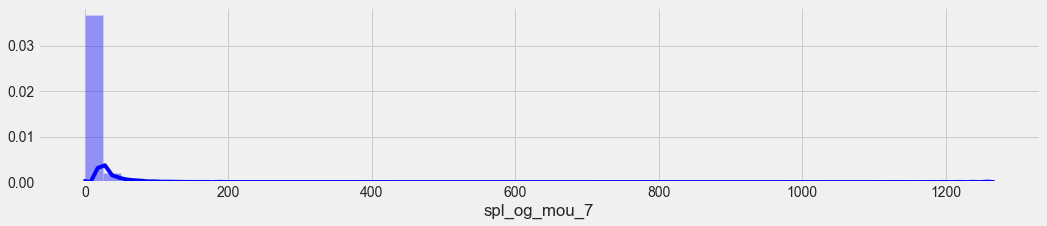

spl_og_mou_8


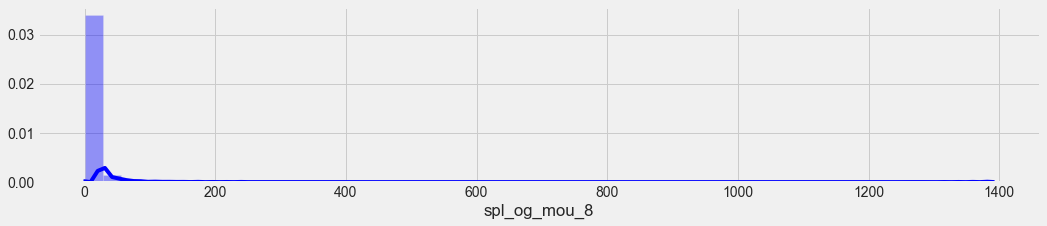

og_others_6


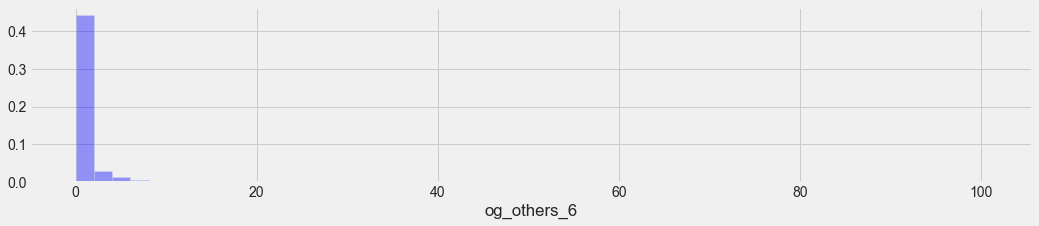

og_others_7


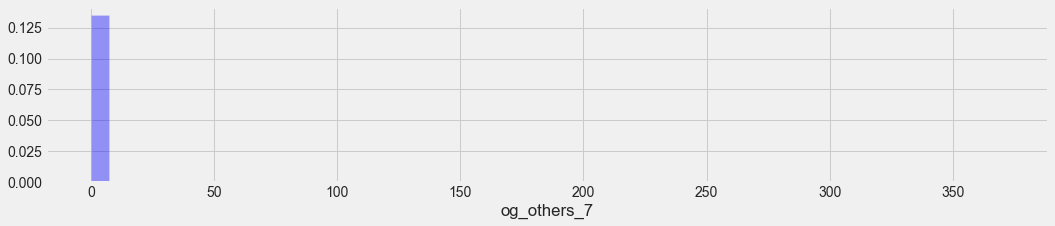

og_others_8


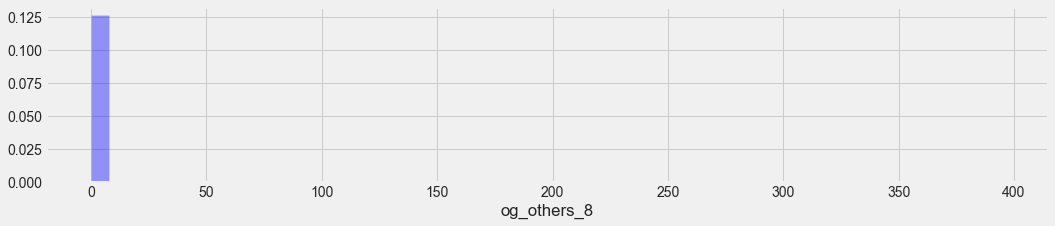

total_og_mou_6


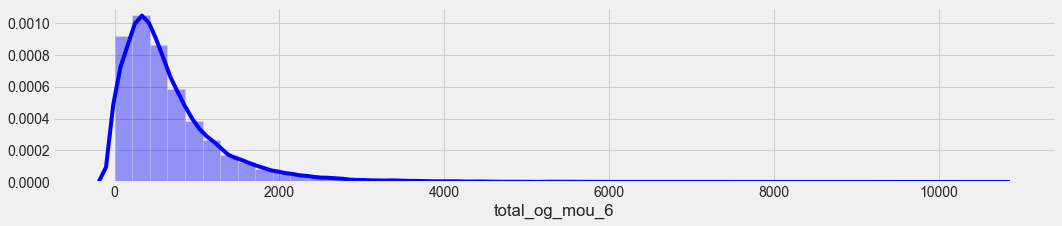

total_og_mou_7


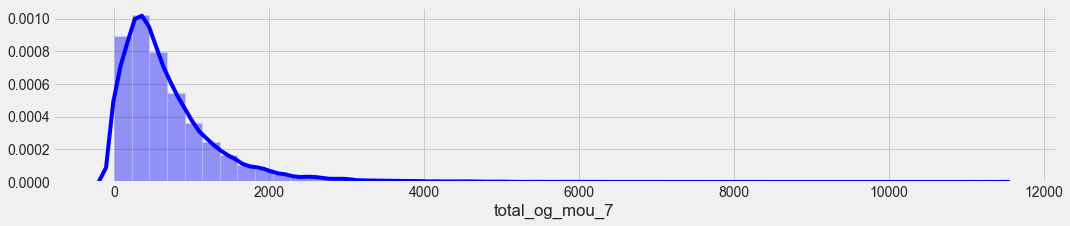

total_og_mou_8


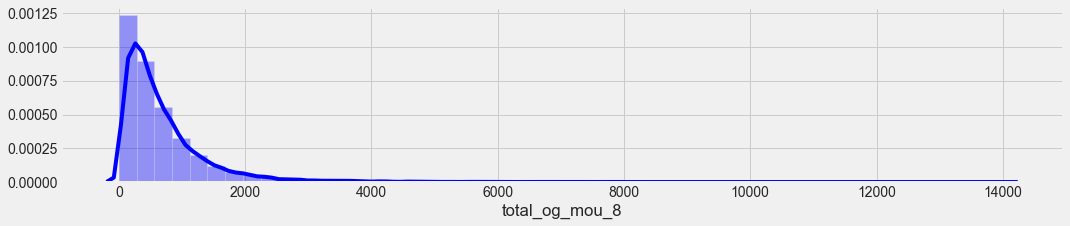

loc_ic_t2t_mou_6


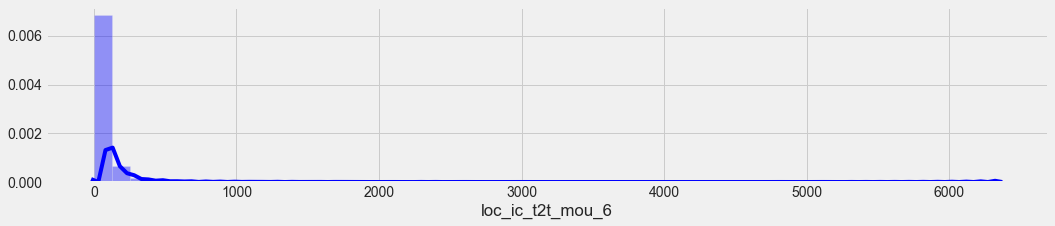

loc_ic_t2t_mou_7


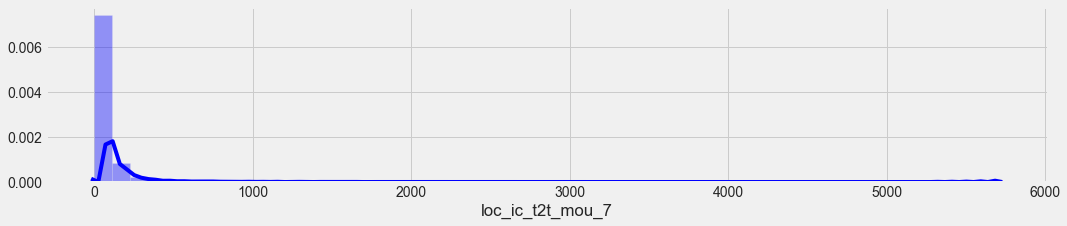

loc_ic_t2t_mou_8


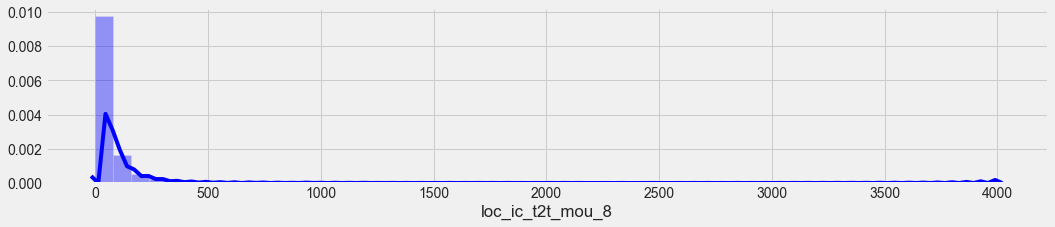

loc_ic_t2m_mou_6


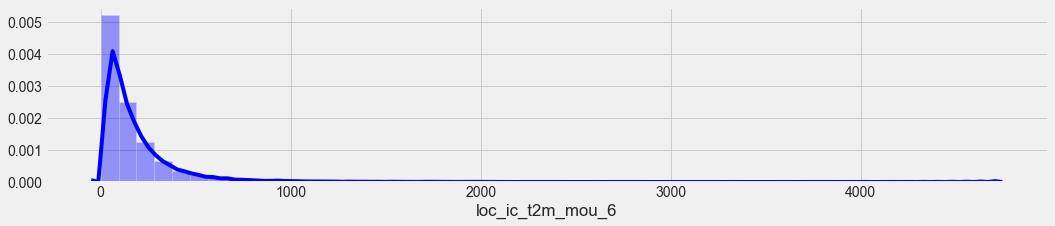

loc_ic_t2m_mou_7


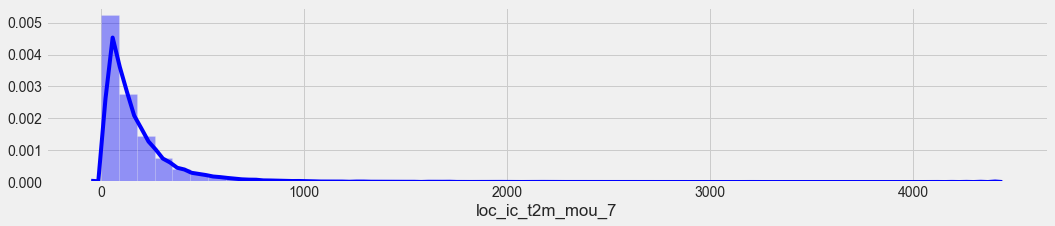

loc_ic_t2m_mou_8


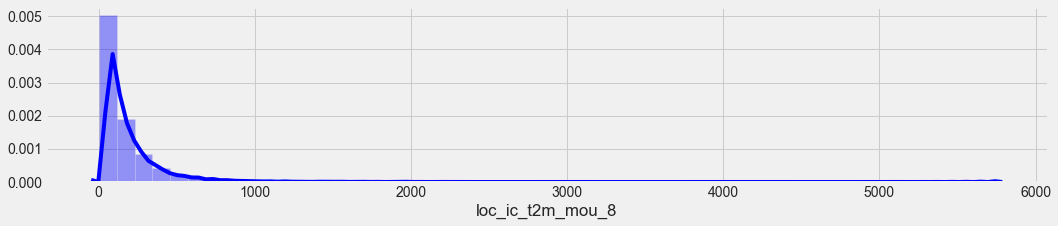

loc_ic_t2f_mou_6


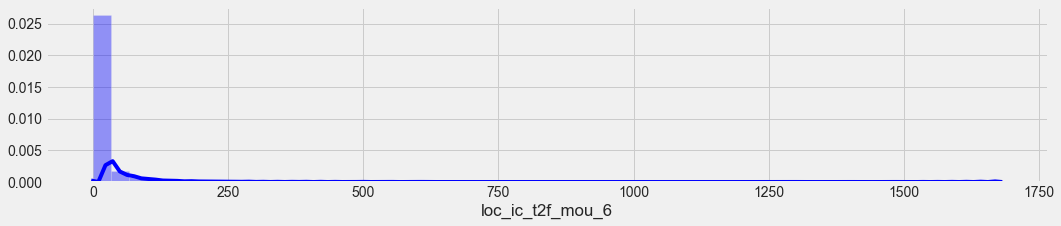

loc_ic_t2f_mou_7


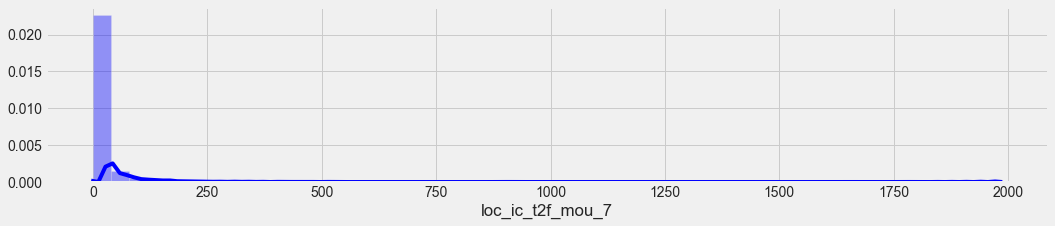

loc_ic_t2f_mou_8


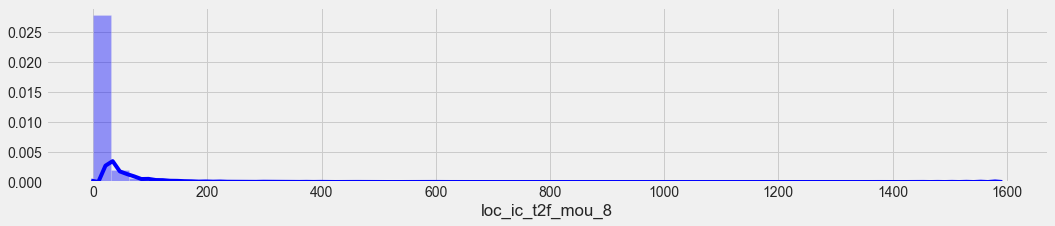

loc_ic_mou_6


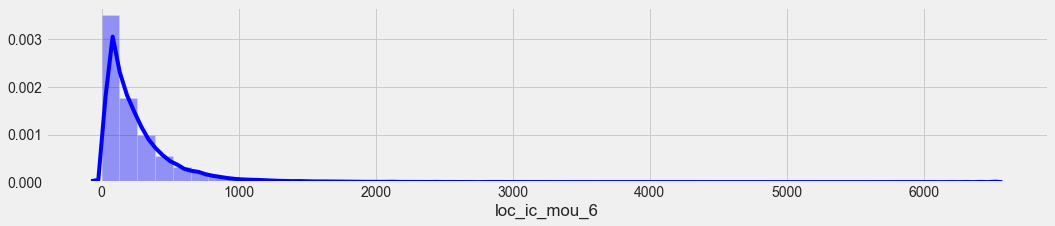

loc_ic_mou_7


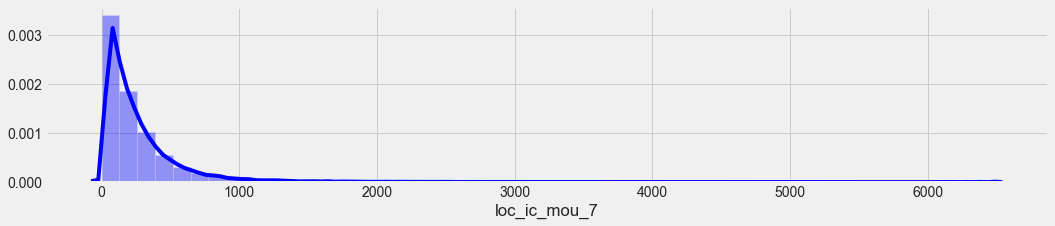

loc_ic_mou_8


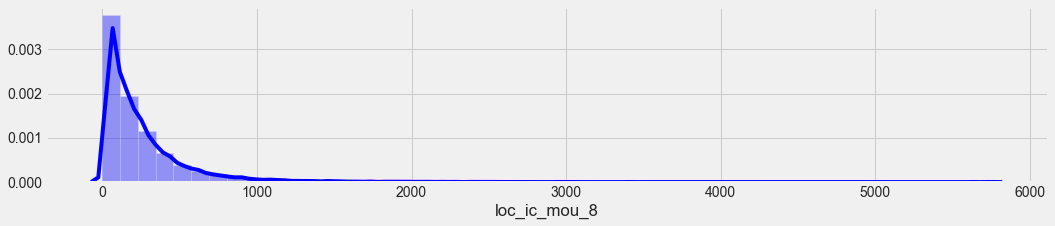

std_ic_t2t_mou_6


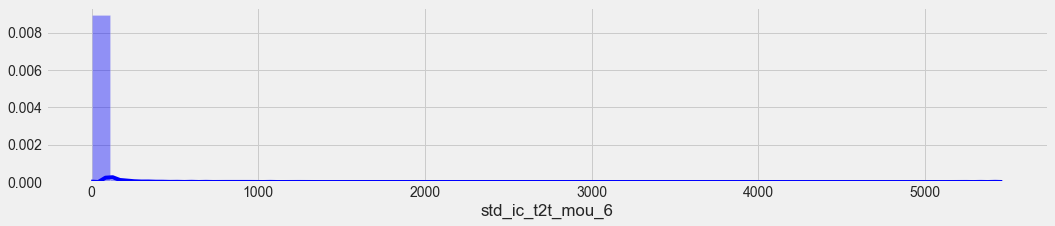

std_ic_t2t_mou_7


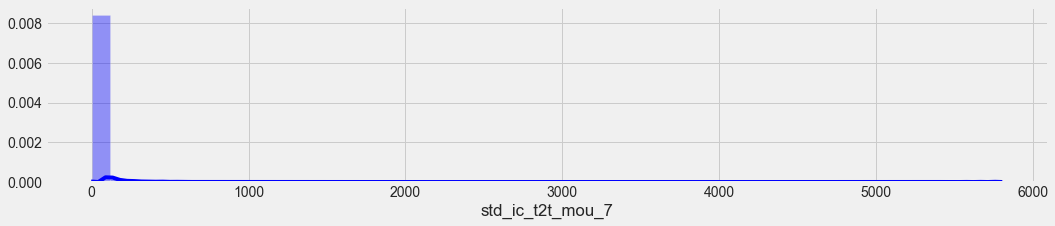

std_ic_t2t_mou_8


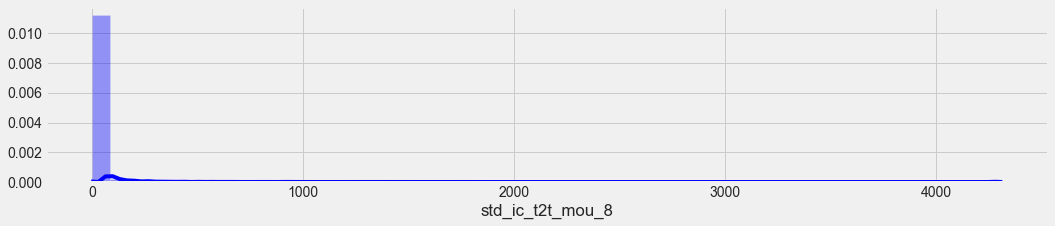

std_ic_t2m_mou_6


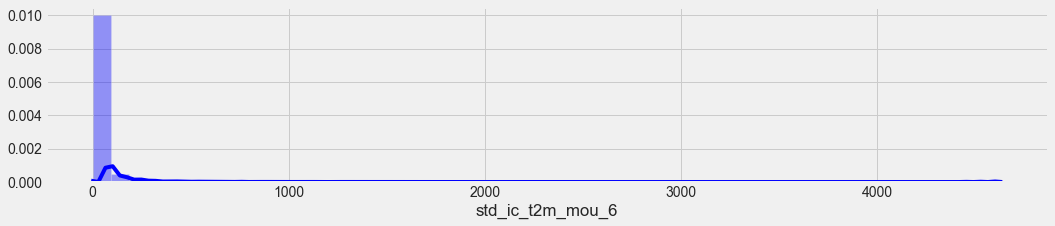

std_ic_t2m_mou_7


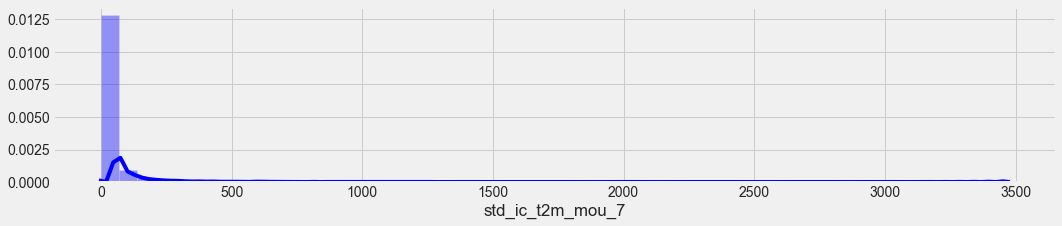

std_ic_t2m_mou_8


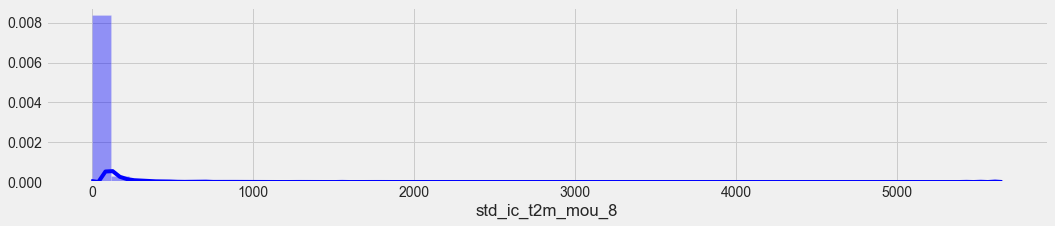

std_ic_t2f_mou_6


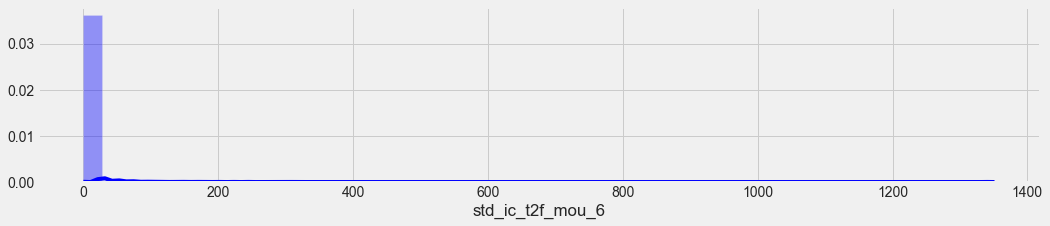

std_ic_t2f_mou_7


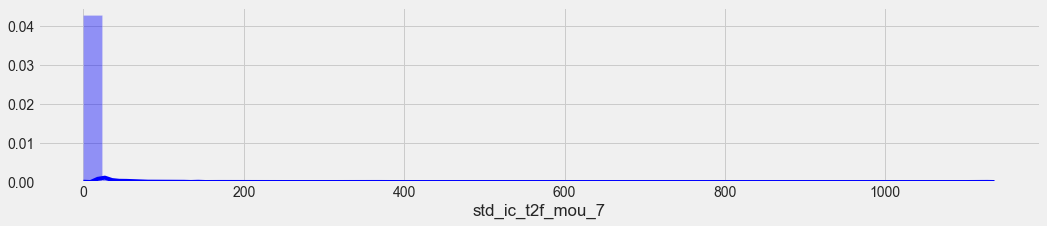

std_ic_t2f_mou_8


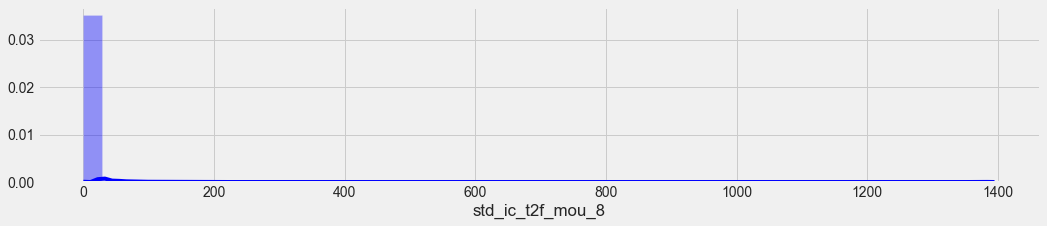

std_ic_mou_6


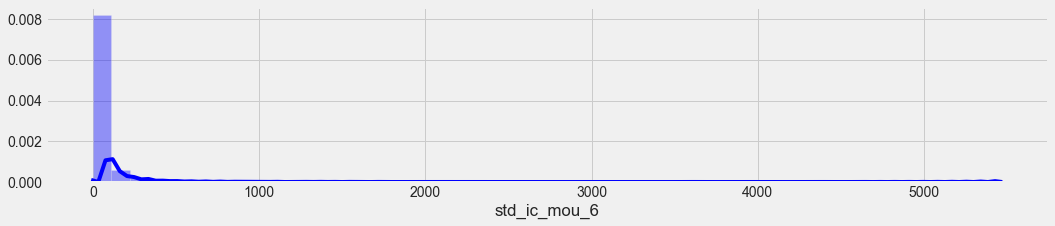

std_ic_mou_7


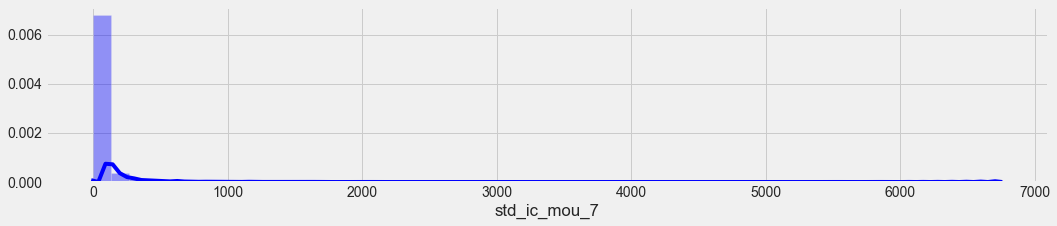

std_ic_mou_8


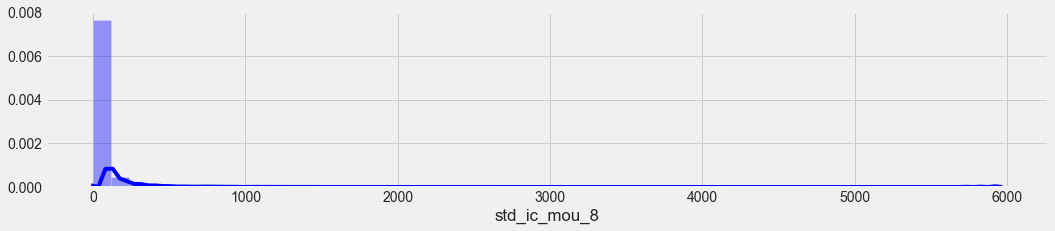

total_ic_mou_6


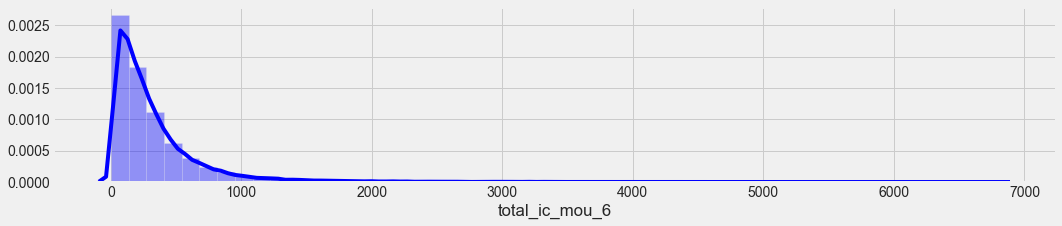

total_ic_mou_7


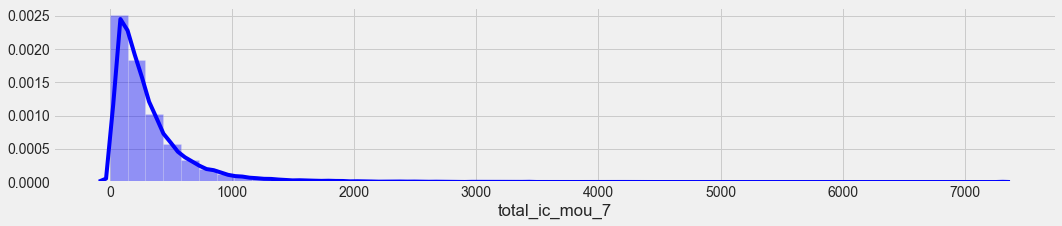

total_ic_mou_8


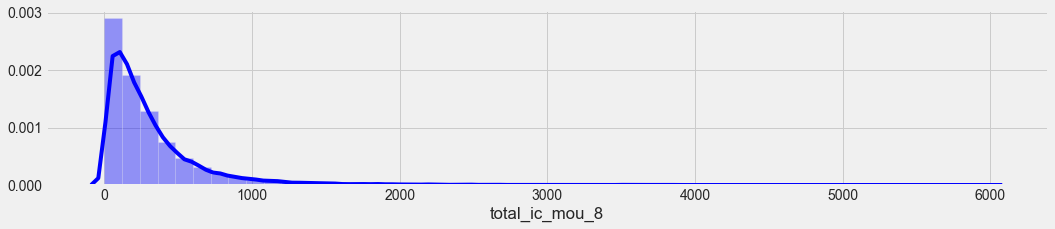

spl_ic_mou_6


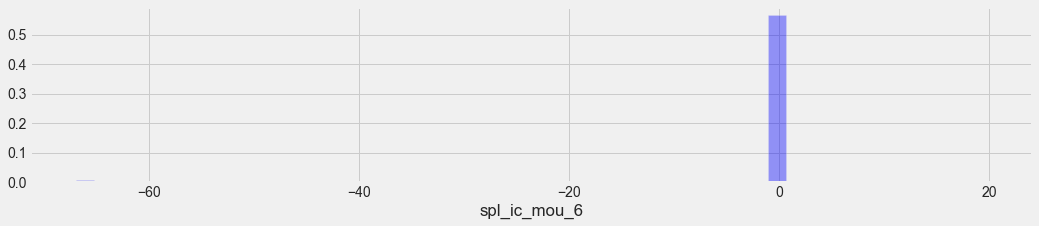

spl_ic_mou_7


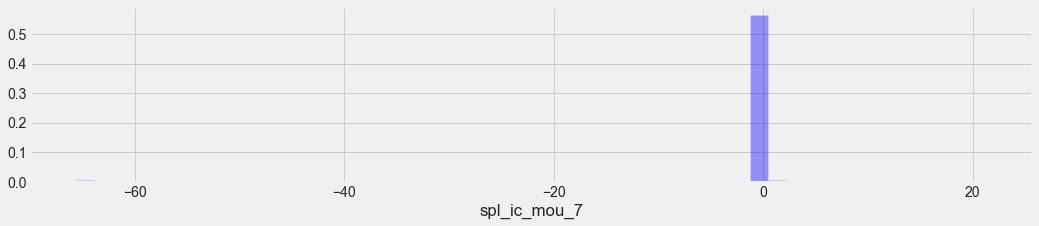

spl_ic_mou_8


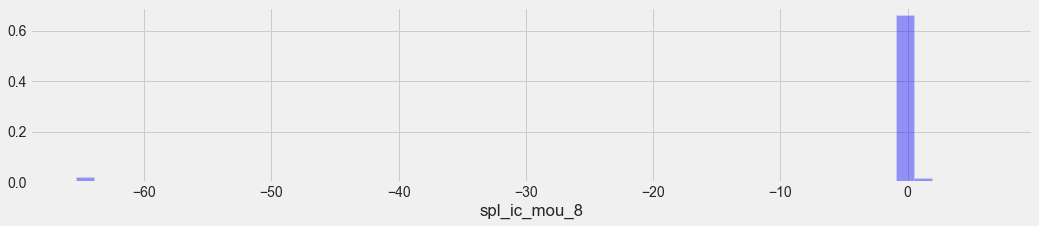

isd_ic_mou_6


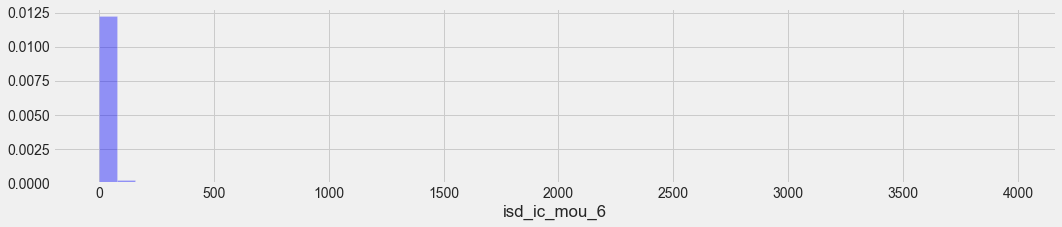

isd_ic_mou_7


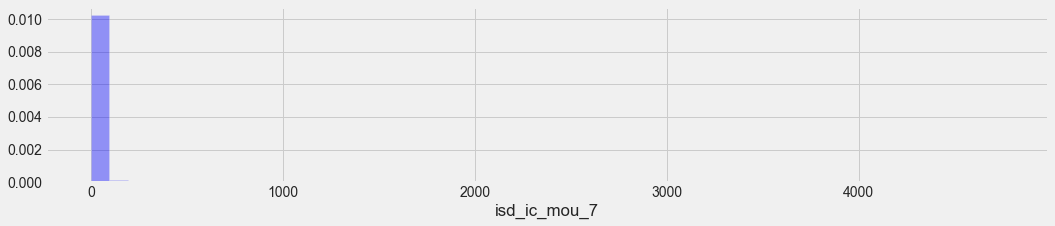

isd_ic_mou_8


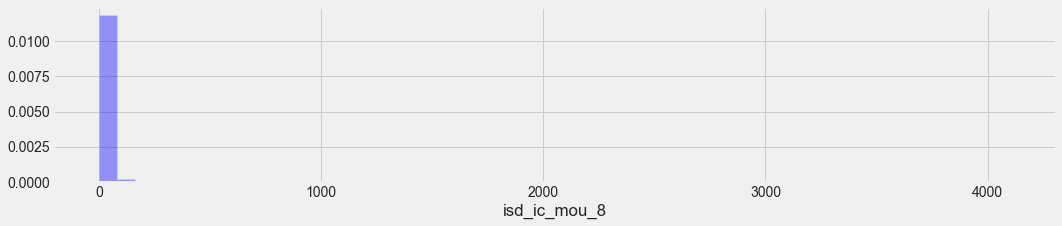

ic_others_6


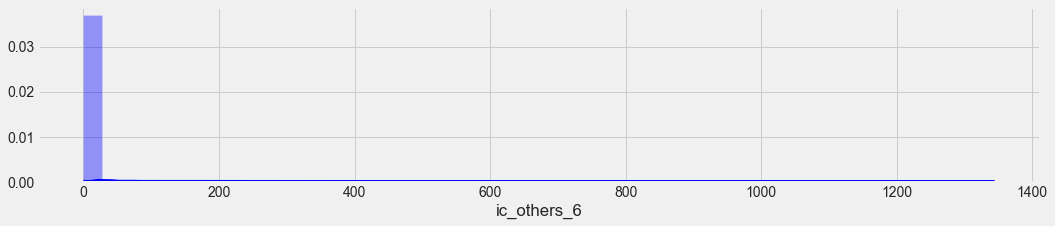

ic_others_7


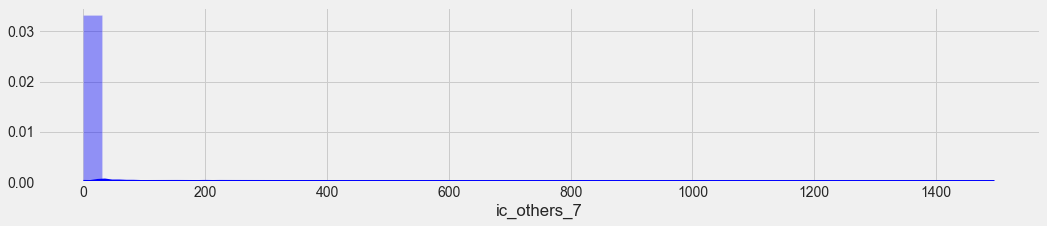

ic_others_8


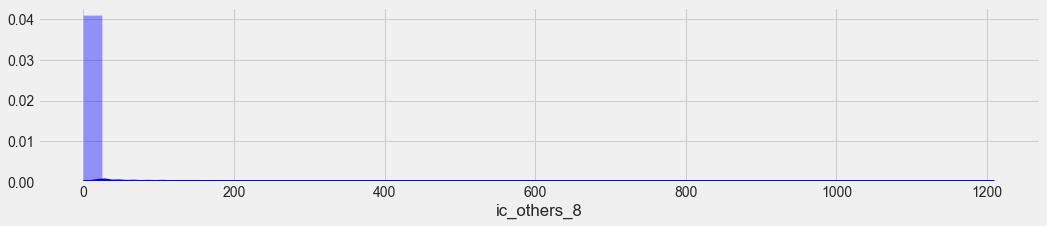

total_rech_num_6


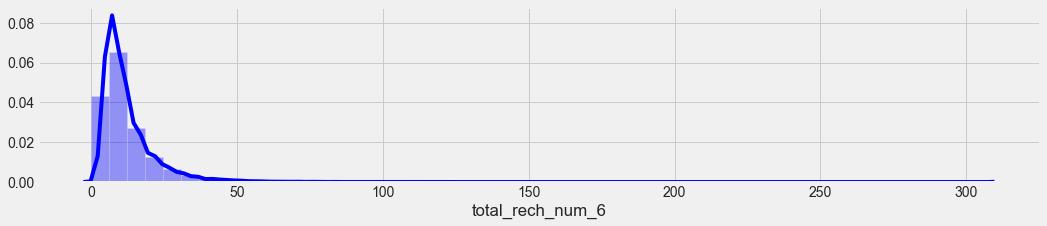

total_rech_num_7


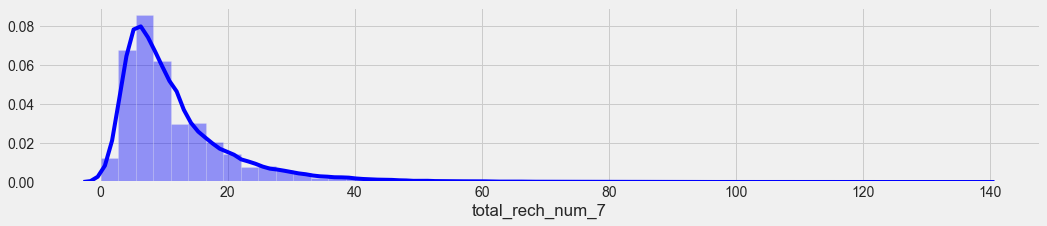

total_rech_num_8


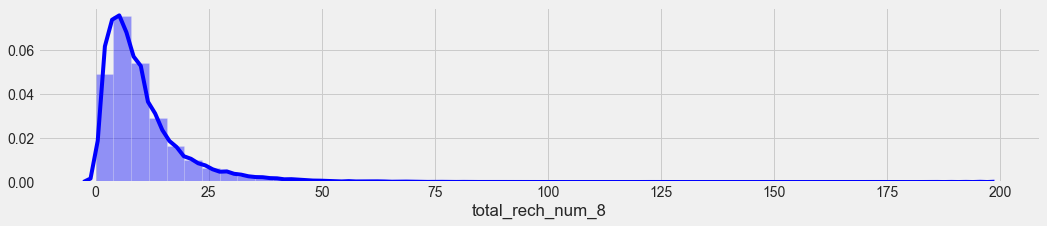

total_rech_amt_6


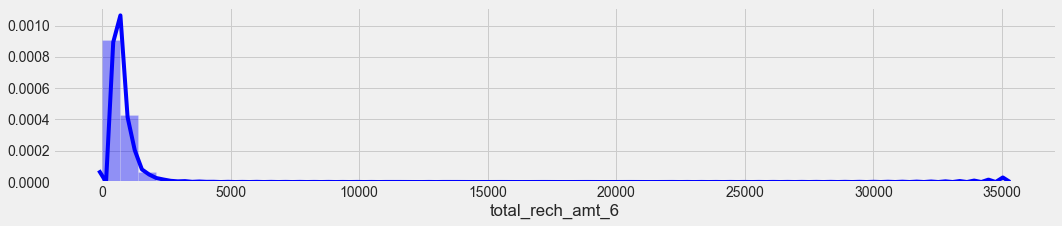

total_rech_amt_7


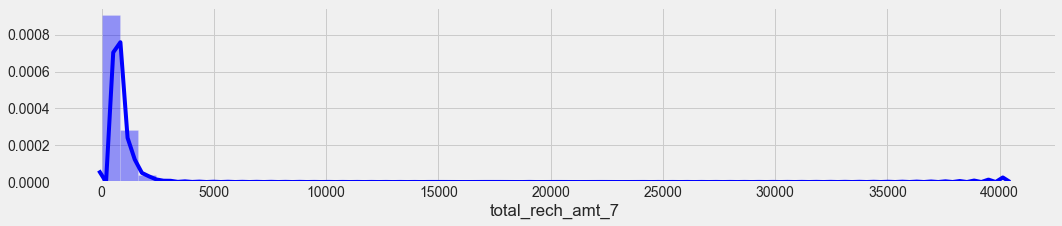

total_rech_amt_8


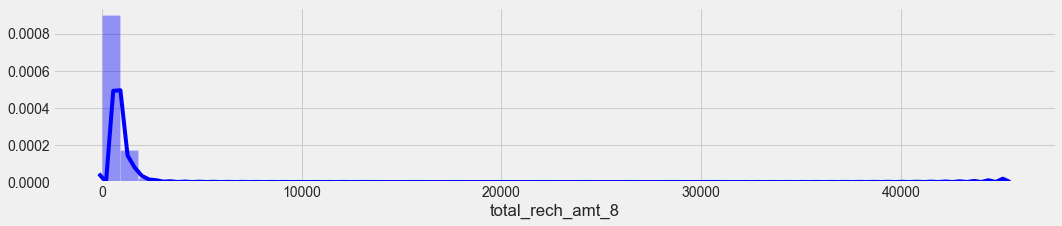

max_rech_amt_6


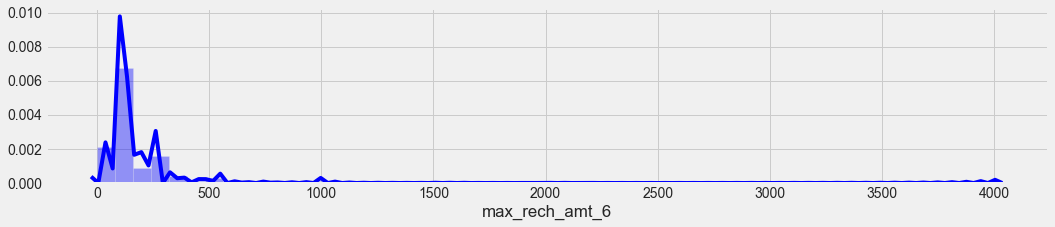

max_rech_amt_7


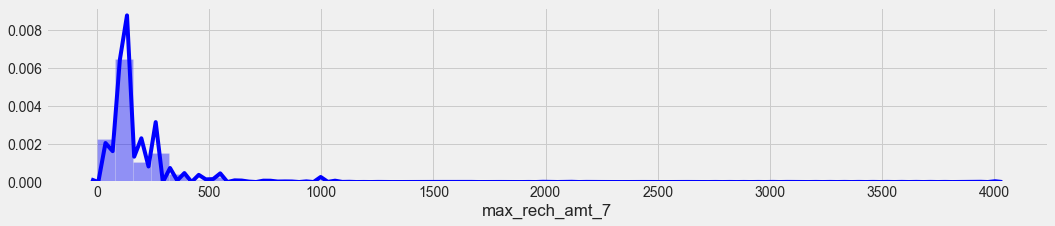

max_rech_amt_8


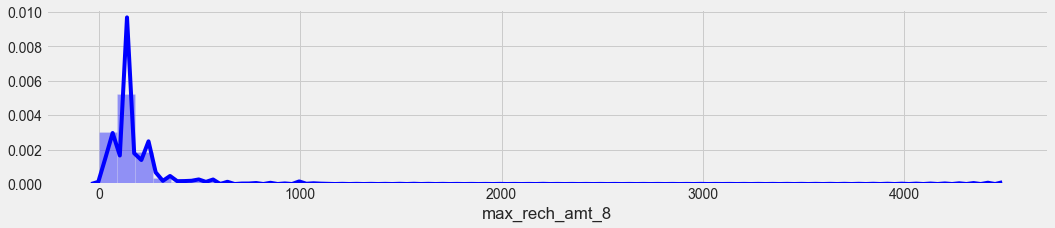

date_of_last_rech_6


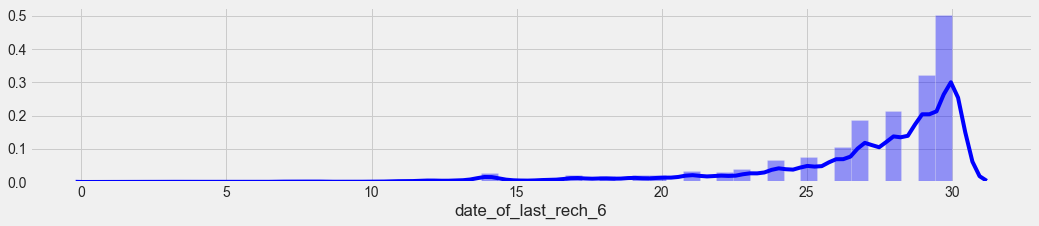

date_of_last_rech_7


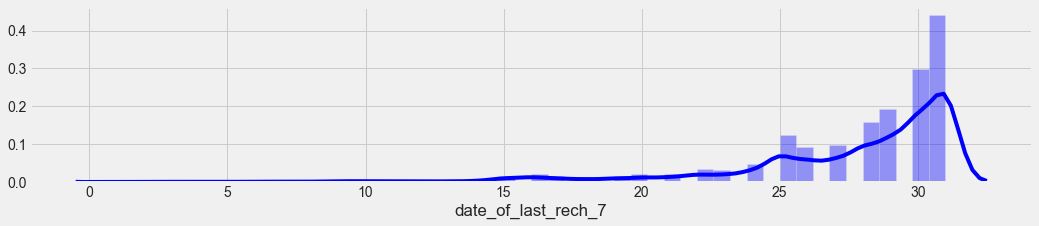

date_of_last_rech_8


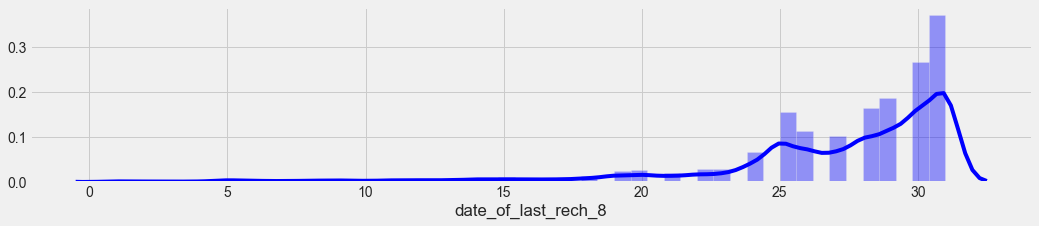

last_day_rch_amt_6


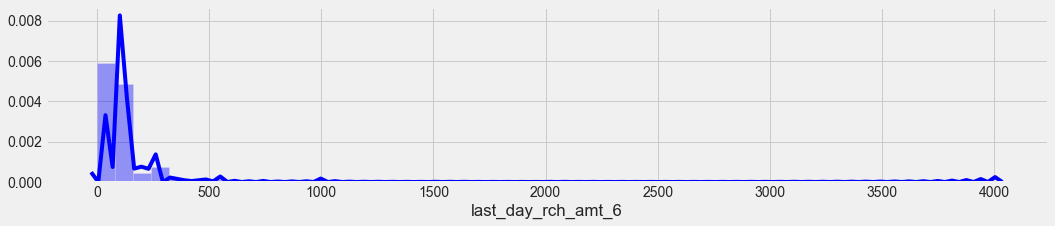

last_day_rch_amt_7


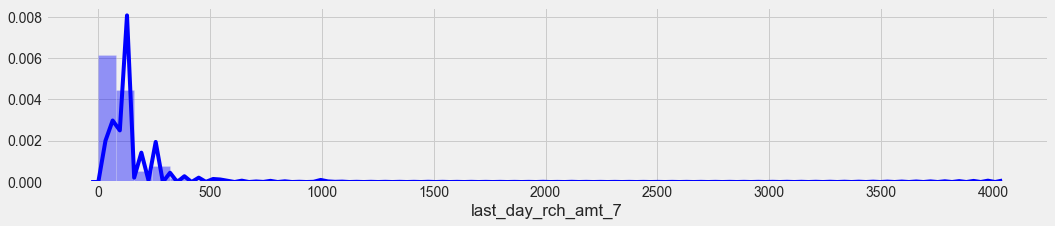

last_day_rch_amt_8


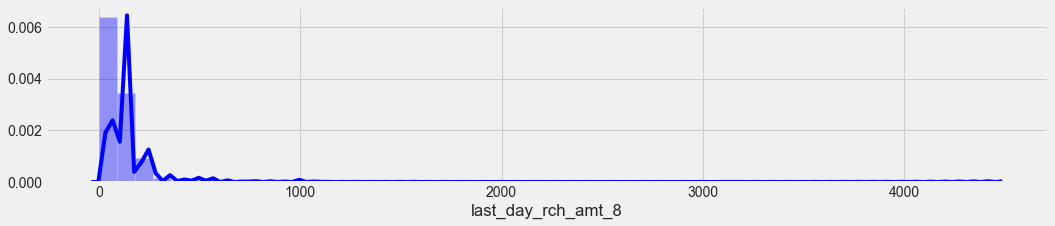

vol_2g_mb_6


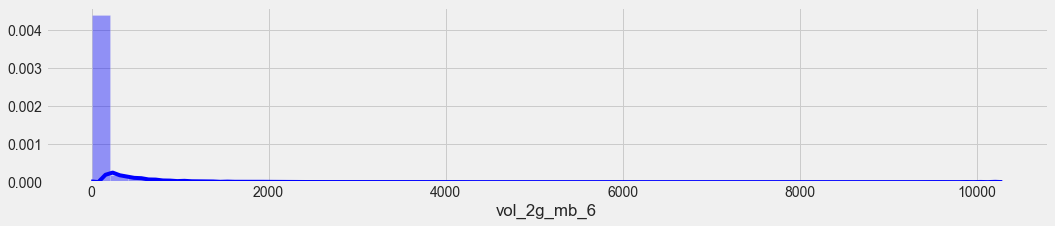

vol_2g_mb_7


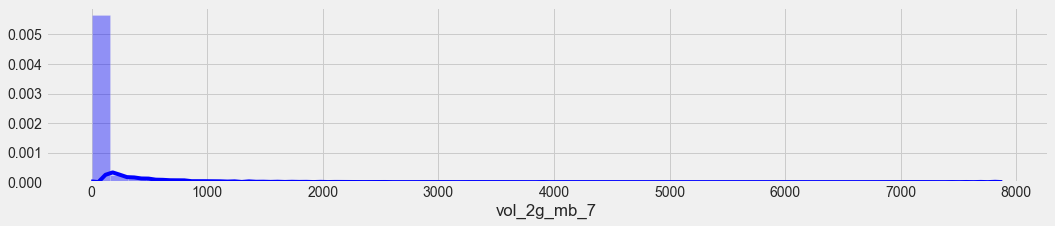

vol_2g_mb_8


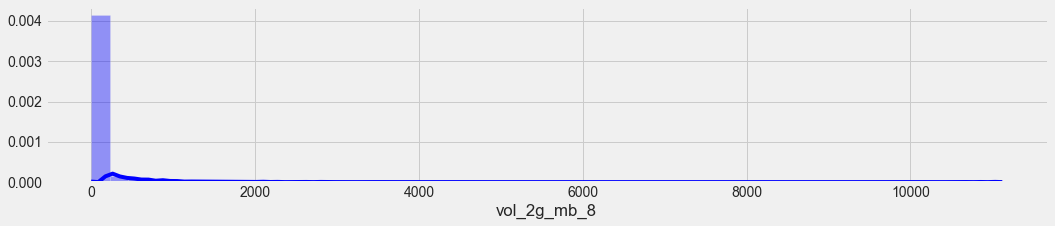

vol_3g_mb_6


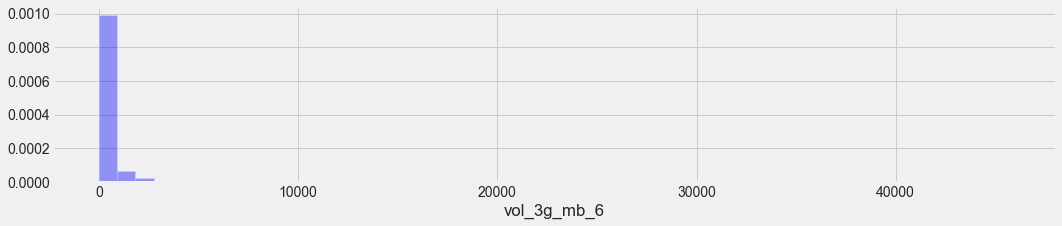

vol_3g_mb_7


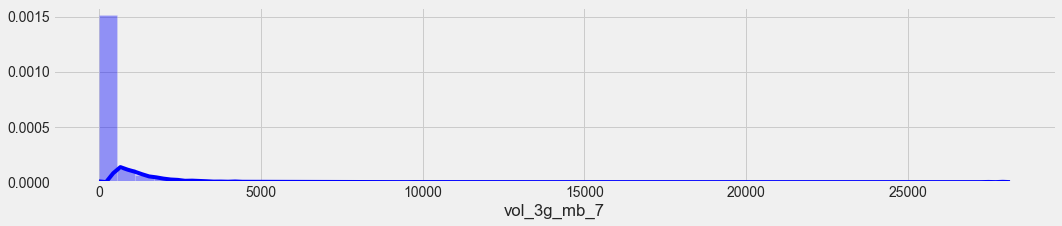

vol_3g_mb_8


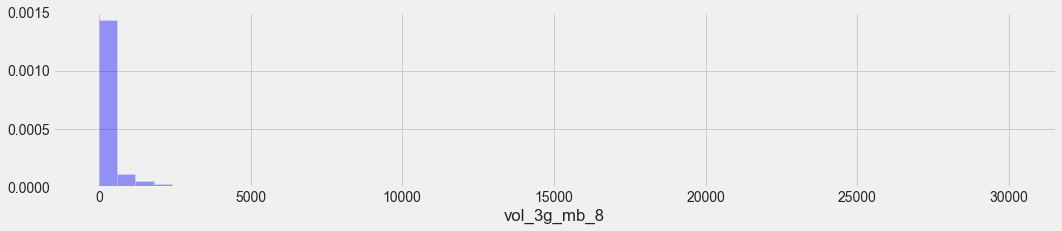

monthly_2g_6


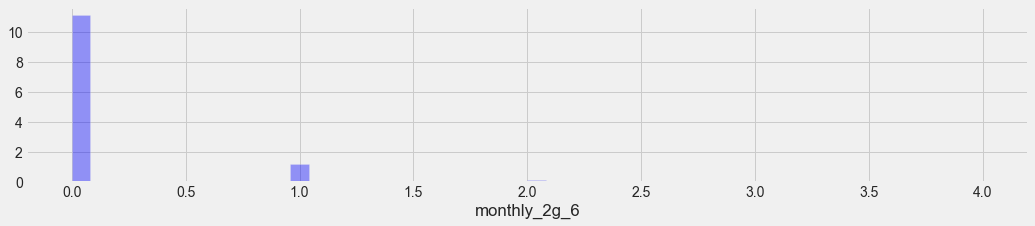

monthly_2g_7


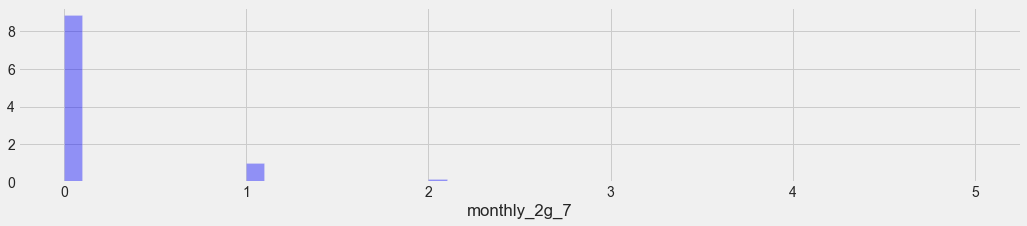

monthly_2g_8


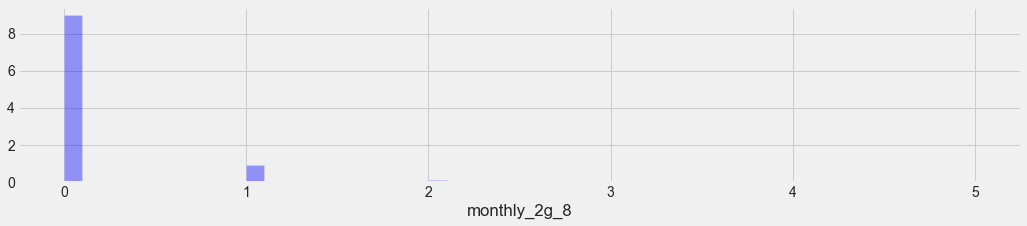

sachet_2g_6


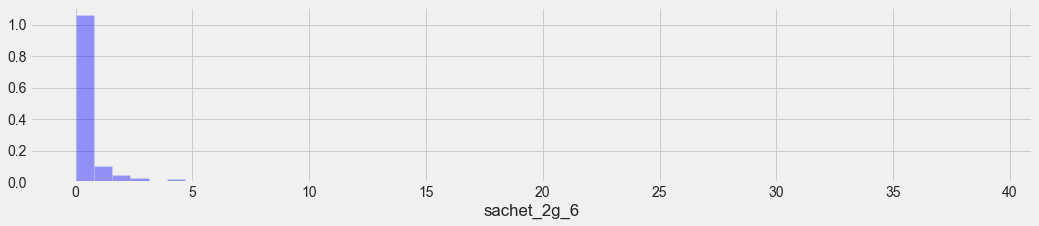

sachet_2g_7


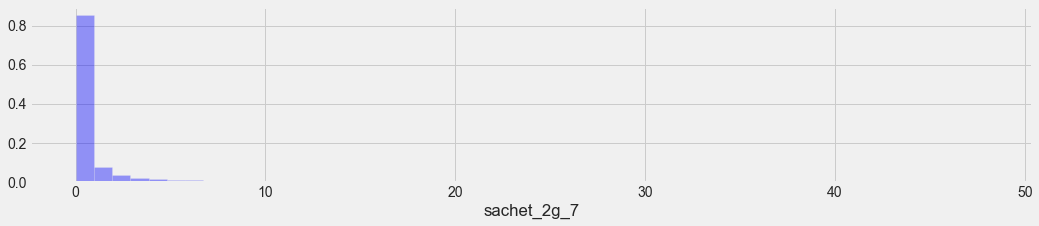

sachet_2g_8


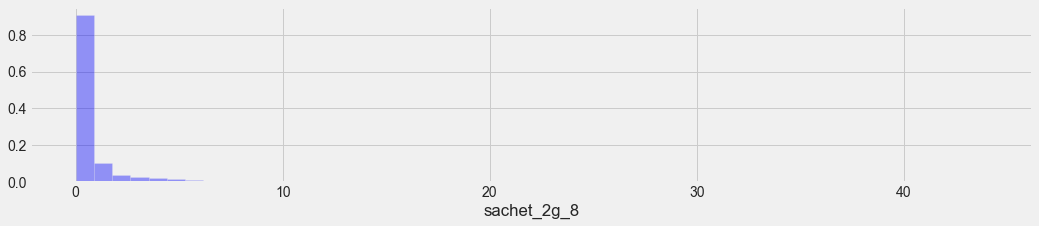

monthly_3g_6


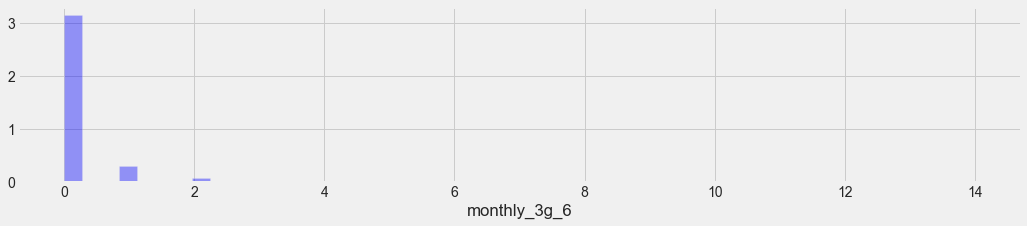

monthly_3g_7


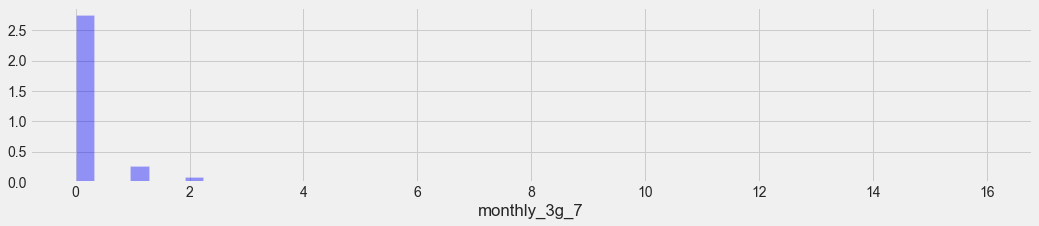

monthly_3g_8


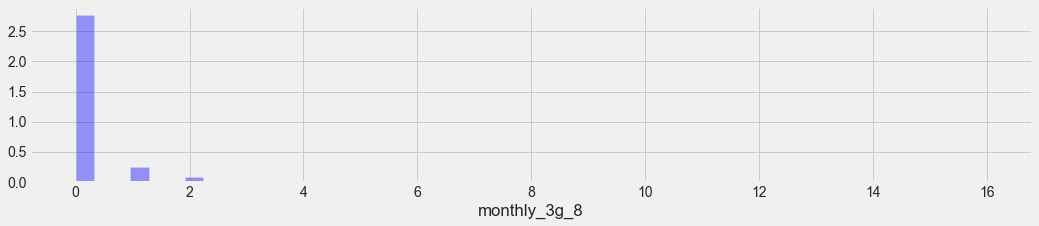

sachet_3g_6


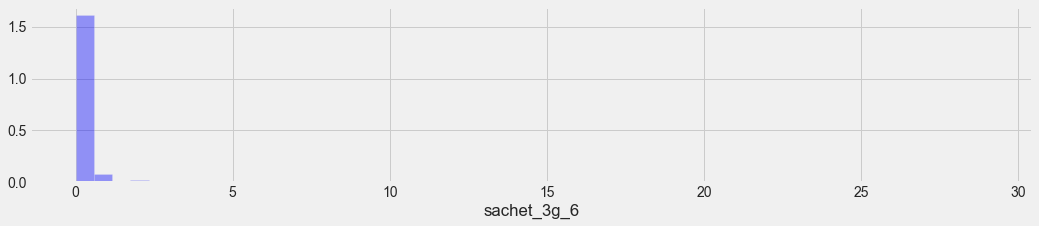

sachet_3g_7


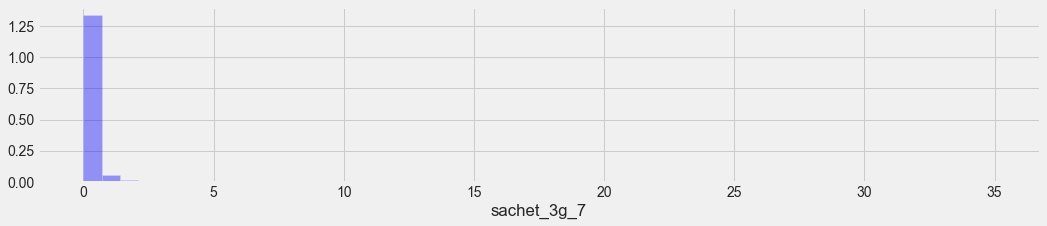

sachet_3g_8


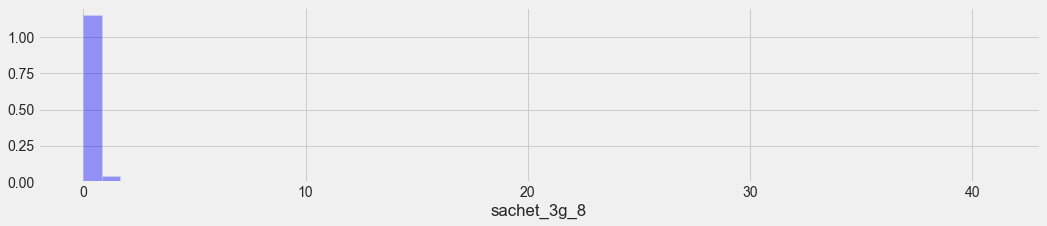

aon


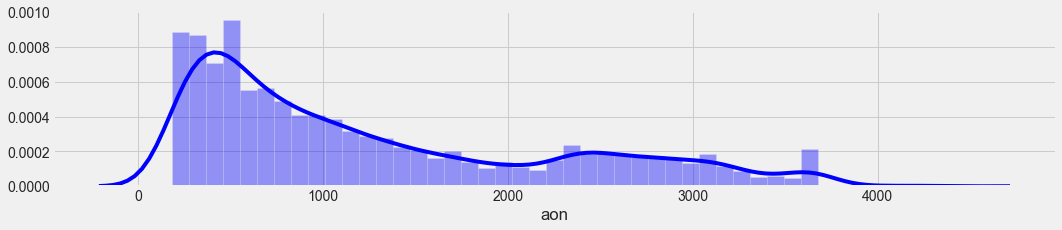

aug_vbc_3g


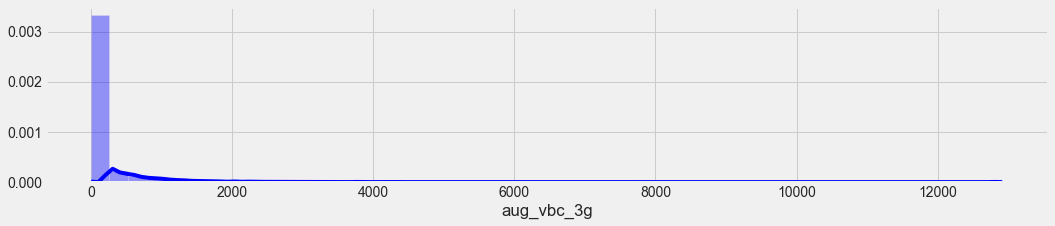

jul_vbc_3g


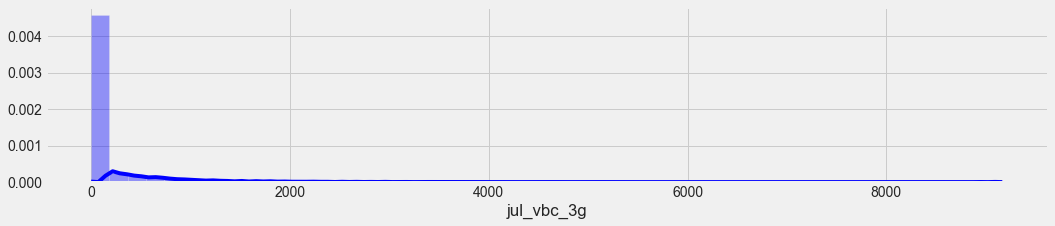

jun_vbc_3g


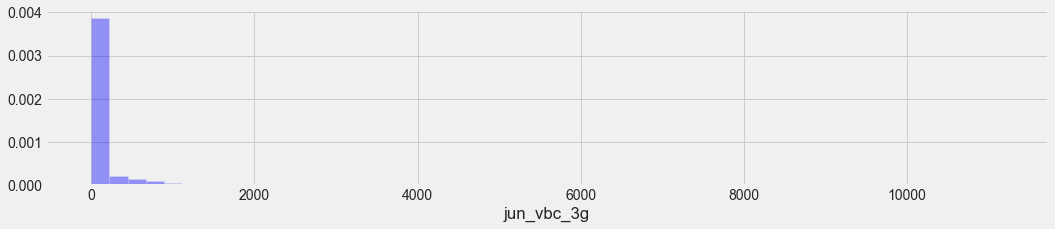

sep_vbc_3g


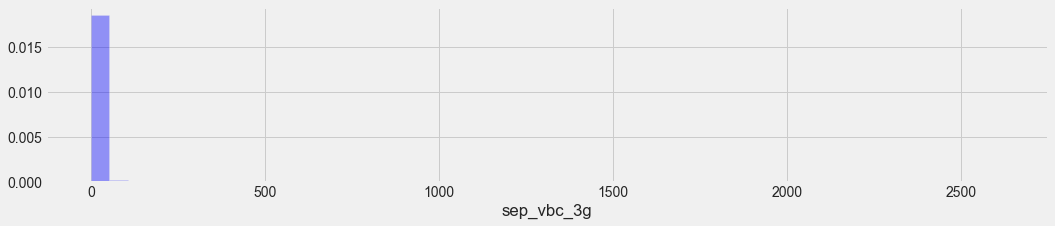

churn_data


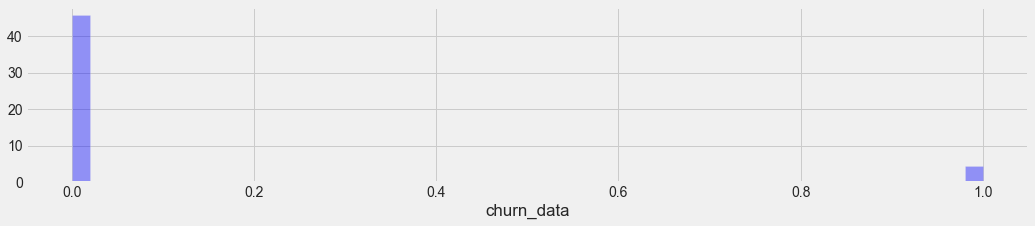

arpu_ratio


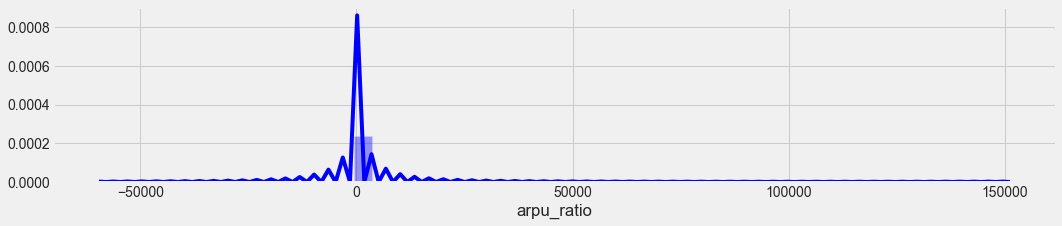

call_centre_ratio


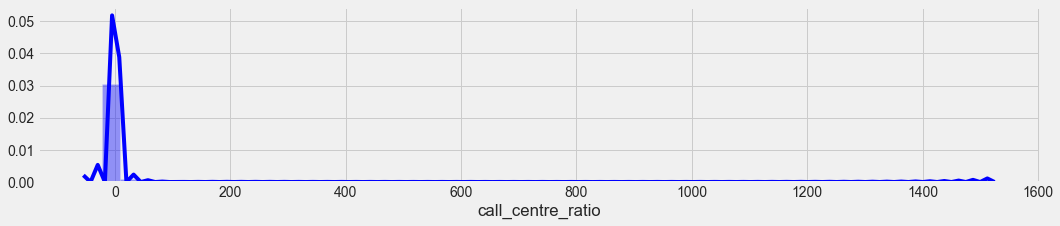

network_usage_diff


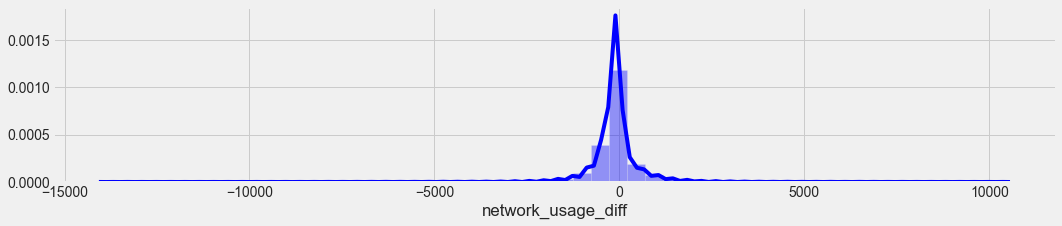

network_usage_diff_good


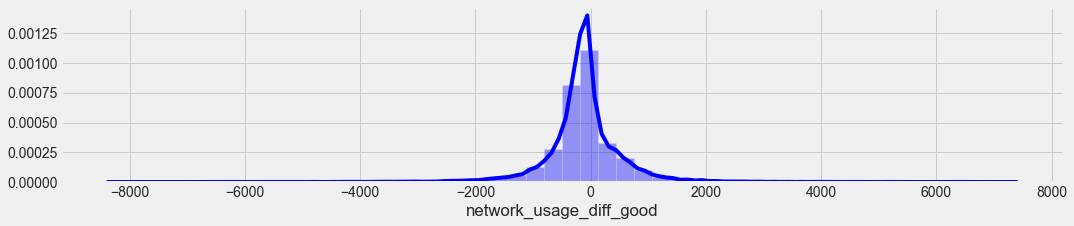

2g_usage_ratio


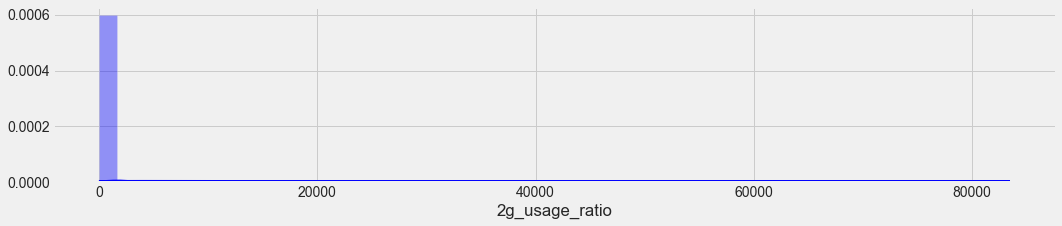

3g_usage_ratio


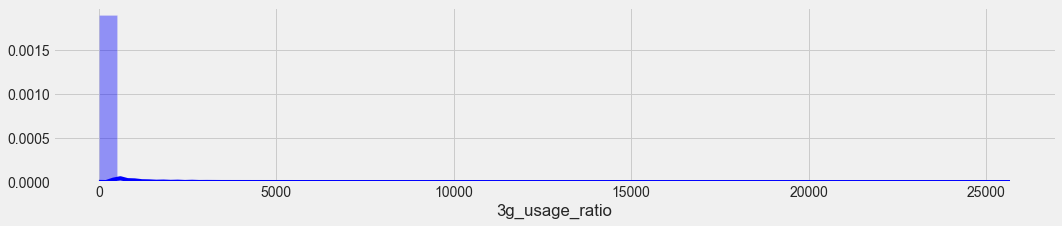

og_ratio


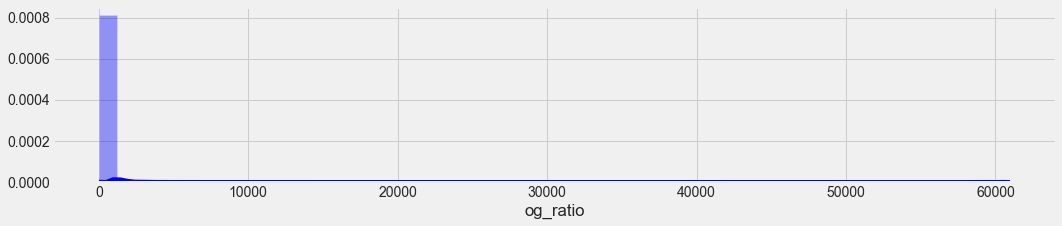

ic_ratio


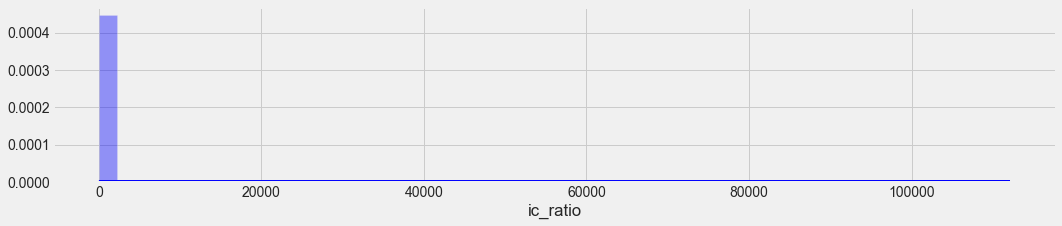

vbc_difference


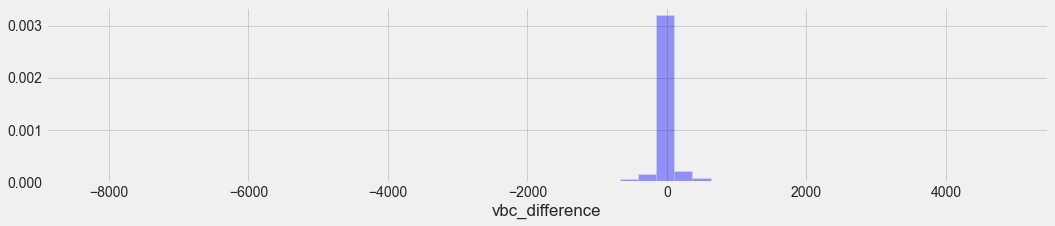

In [321]:
# Univariate analysis on all column
for columns in telecom_churn_df_high.columns:
    plt.figure(figsize=(16,3))
    column = telecom_churn_df_high[columns]
    print(columns)
    sns.distplot(column,color='blue')
    plt.show()

# Bivariate analysis

In [322]:
#Older customer are more likely to continue
telecom_churn_df_high['binned_aon'] = pd.qcut(telecom_churn_df_high['aon'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_aon','churn_data']).count()/telecom_churn_df_high.groupby(['binned_aon']).count()).mobile_number),2)

(binned_aon        churn_data
 (179.999, 294.0]  0            85.000000
                   1            15.000000
 (294.0, 418.0]    0            87.000000
                   1            13.000000
 (418.0, 522.0]    0            90.000000
                   1            10.000000
 (522.0, 703.0]    0            89.000000
                   1            11.000000
 (703.0, 914.0]    0            88.000000
                   1            12.000000
 (914.0, 1183.0]   0            91.000000
                   1             9.000000
 (1183.0, 1590.0]  0            94.000000
                   1             6.000000
 (1590.0, 2325.0]  0            95.000000
                   1             5.000000
 (2325.0, 2846.0]  0            96.000000
                   1             4.000000
 (2846.0, 4321.0]  0            97.000000
                   1             3.000000
 Name: mobile_number, dtype: float64,
 2)

In [323]:
telecom_churn_df_high.drop(['binned_aon'], axis=1, inplace=True)

In [324]:
# customers having low arpu in action phase as compared to good phase is likely to churn
telecom_churn_df_high['binned_arpu_ratio'] = pd.qcut(telecom_churn_df_high['arpu_ratio'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_arpu_ratio','churn_data']).count()/telecom_churn_df_high.groupby(['binned_arpu_ratio']).count()).mobile_number),2)

(binned_arpu_ratio             churn_data
 (-59575.700999999994, 0.661]  0            95.000000
                               1             5.000000
 (0.661, 0.79]                 0            97.000000
                               1             3.000000
 (0.79, 0.894]                 0            97.000000
                               1             3.000000
 (0.894, 0.991]                0            98.000000
                               1             2.000000
 (0.991, 1.098]                0            97.000000
                               1             3.000000
 (1.098, 1.229]                0            97.000000
                               1             3.000000
 (1.229, 1.415]                0            96.000000
                               1             4.000000
 (1.415, 1.786]                0            95.000000
                               1             5.000000
 (1.786, 3.391]                0            87.000000
                               1        

In [325]:
telecom_churn_df_high.drop(['binned_arpu_ratio'], axis=1, inplace=True)

In [326]:
# customers not using outgoing calls for september are likely to churn
telecom_churn_df_high['binned_total_og_mou_8'] = pd.qcut(telecom_churn_df_high['total_og_mou_8'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_total_og_mou_8','churn_data']).count()/telecom_churn_df_high.groupby(['binned_total_og_mou_8']).count()).mobile_number),2)

(binned_total_og_mou_8  churn_data
 (-0.001, 19.41]        0            51.000000
                        1            49.000000
 (19.41, 138.06]        0            91.000000
                        1             9.000000
 (138.06, 235.91]       0            94.000000
                        1             6.000000
 (235.91, 331.76]       0            96.000000
                        1             4.000000
 (331.76, 435.33]       0            96.000000
                        1             4.000000
 (435.33, 563.51]       0            97.000000
                        1             3.000000
 (563.51, 732.94]       0            98.000000
                        1             2.000000
 (732.94, 960.03]       0            97.000000
                        1             3.000000
 (960.03, 1393.51]      0            97.000000
                        1             3.000000
 (1393.51, 14043.06]    0            97.000000
                        1             3.000000
 Name: mobile_number, dty

In [327]:
telecom_churn_df_high.drop(['binned_total_og_mou_8'], axis=1, inplace=True)

In [328]:
# customers having low arpu in action period is likely to churn
telecom_churn_df_high['binned_arpu_8'] = pd.qcut(telecom_churn_df_high['arpu_8'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_arpu_8','churn_data']).count()/telecom_churn_df_high.groupby(['binned_arpu_8']).count()).mobile_number),2)

(binned_arpu_8         churn_data
 (-945.809, 134.17]    0            53.000000
                       1            47.000000
 (134.17, 252.3]       0            90.000000
                       1            10.000000
 (252.3, 324.913]      0            94.000000
                       1             6.000000
 (324.913, 387.465]    0            96.000000
                       1             4.000000
 (387.465, 452.091]    0            97.000000
                       1             3.000000
 (452.091, 526.063]    0            97.000000
                       1             3.000000
 (526.063, 614.013]    0            97.000000
                       1             3.000000
 (614.013, 744.166]    0            97.000000
                       1             3.000000
 (744.166, 985.202]    0            97.000000
                       1             3.000000
 (985.202, 33543.624]  0            96.000000
                       1             4.000000
 Name: mobile_number, dtype: float64,
 2)

In [329]:
telecom_churn_df_high.drop(['binned_arpu_8'], axis=1, inplace=True)

In [330]:
# customers having low arpu in action period is likely to churn
telecom_churn_df_high['binned_onnet_mou_8'] = pd.qcut(telecom_churn_df_high['onnet_mou_8'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_onnet_mou_8','churn_data']).count()/telecom_churn_df_high.groupby(['binned_onnet_mou_8']).count()).mobile_number),2)

(binned_onnet_mou_8  churn_data
 (-505.551, 2.9]     0            62.000000
                     1            38.000000
 (2.9, 17.98]        0            89.000000
                     1            11.000000
 (17.98, 38.24]      0            92.000000
                     1             8.000000
 (38.24, 63.58]      0            95.000000
                     1             5.000000
 (63.58, 99.44]      0            96.000000
                     1             4.000000
 (99.44, 150.38]     0            96.000000
                     1             4.000000
 (150.38, 234.51]    0            96.000000
                     1             4.000000
 (234.51, 389.31]    0            96.000000
                     1             4.000000
 (389.31, 723.61]    0            96.000000
                     1             4.000000
 (723.61, 10752.56]  0            97.000000
                     1             3.000000
 Name: mobile_number, dtype: float64,
 2)

In [331]:
telecom_churn_df_high.drop(['binned_onnet_mou_8'], axis=1, inplace=True)

In [332]:
# customers having low arpu in action period is likely to churn
telecom_churn_df_high['binned_offnet_mou_8'] = pd.qcut(telecom_churn_df_high['offnet_mou_8'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_offnet_mou_8','churn_data']).count()/telecom_churn_df_high.groupby(['binned_offnet_mou_8']).count()).mobile_number),2)

(binned_offnet_mou_8  churn_data
 (-0.001, 35.08]      0            78.000000
                      1            22.000000
 (35.08, 85.63]       0            91.000000
                      1             9.000000
 (85.63, 138.88]      0            94.000000
                      1             6.000000
 (138.88, 177.36]     0            72.000000
                      1            28.000000
 (177.36, 240.94]     0            95.000000
                      1             5.000000
 (240.94, 314.71]     0            97.000000
                      1             3.000000
 (314.71, 415.84]     0            97.000000
                      1             3.000000
 (415.84, 564.58]     0            97.000000
                      1             3.000000
 (564.58, 853.79]     0            97.000000
                      1             3.000000
 (853.79, 14007.34]   0            97.000000
                      1             3.000000
 Name: mobile_number, dtype: float64,
 2)

In [333]:
telecom_churn_df_high.drop(['binned_offnet_mou_8'], axis=1, inplace=True)

# Outlier Treatment

There must be data which are not significant in predicting the Churn customers in every column and presence of this data would give biased results. Hence we can do outlier treatement to remove such data

It is done using **3 sigma** technique

In [334]:
pre_treatment = telecom_churn_df_high.index.size

In [335]:
# Remove 0.3 percent outliers from data set 
for columns in telecom_churn_df_high.columns:
    column = telecom_churn_df_high[columns]
    upper = column.mean() + 3*column.std()
    lower = column.mean() - 3*column.std()
    outliers = pd.Series([x for x in column if (x < lower) or (x > upper)])
    out_percent = (outliers.size/column.size) * 100
    if out_percent <= 0.3:
        print(out_percent)
        telecom_churn_df_high = telecom_churn_df_high[(telecom_churn_df_high[columns] >= lower) & (telecom_churn_df_high[columns] <= upper)]
    

0.0
0.29322581720035984
0.08354777261638205
0.12709880259549133
0.09377093101138648
0.19777420219898095
0.2854935679978504
0.13136620856911885
0.03372795035245708


In [336]:
telecom_churn_df_high.shape

(29639, 139)

In [337]:
# % data retained after treatment
(telecom_churn_df_high.index.size/pre_treatment) *100

98.76045450001666


- Converting data set into dependant and independant variables for building the models

In [338]:
X = telecom_churn_df_high.drop(['churn_data','mobile_number'],axis=1)

# Putting response variable to y
y = telecom_churn_df_high['churn_data']

y.head()

7     1
13    0
16    0
17    0
21    0
Name: churn_data, dtype: int64

### Splitting test/train data:
- We need to split the data into training and testing set. Models would be run on Training set and validated on testing data set later

In [339]:
columns_name = X.columns
#[print(x) for x in columns_name]

In [73]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100) 

### Balancing data:
- There will be imbalanced data present, which would give wrong results. We need to do resampling by SMOTE sampling

In [74]:
#!pip install imblearn

In [75]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE 
X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)
y_train =pd.Series(y_train)

### Scaling

In [76]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X_train = pd.DataFrame(pt.fit_transform(X_train))
X_test = pd.DataFrame(pt.transform(X_test))
X_train.columns=columns_name
X_test.columns=columns_name

In [77]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV

### Using LassoCV to get the best indicators of churn

In [78]:
reg = LassoCV(random_state=42)
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train, y_train))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000314
Best score using built-in LassoCV: 0.651509


In [79]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 124 variables and eliminated the other 13 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

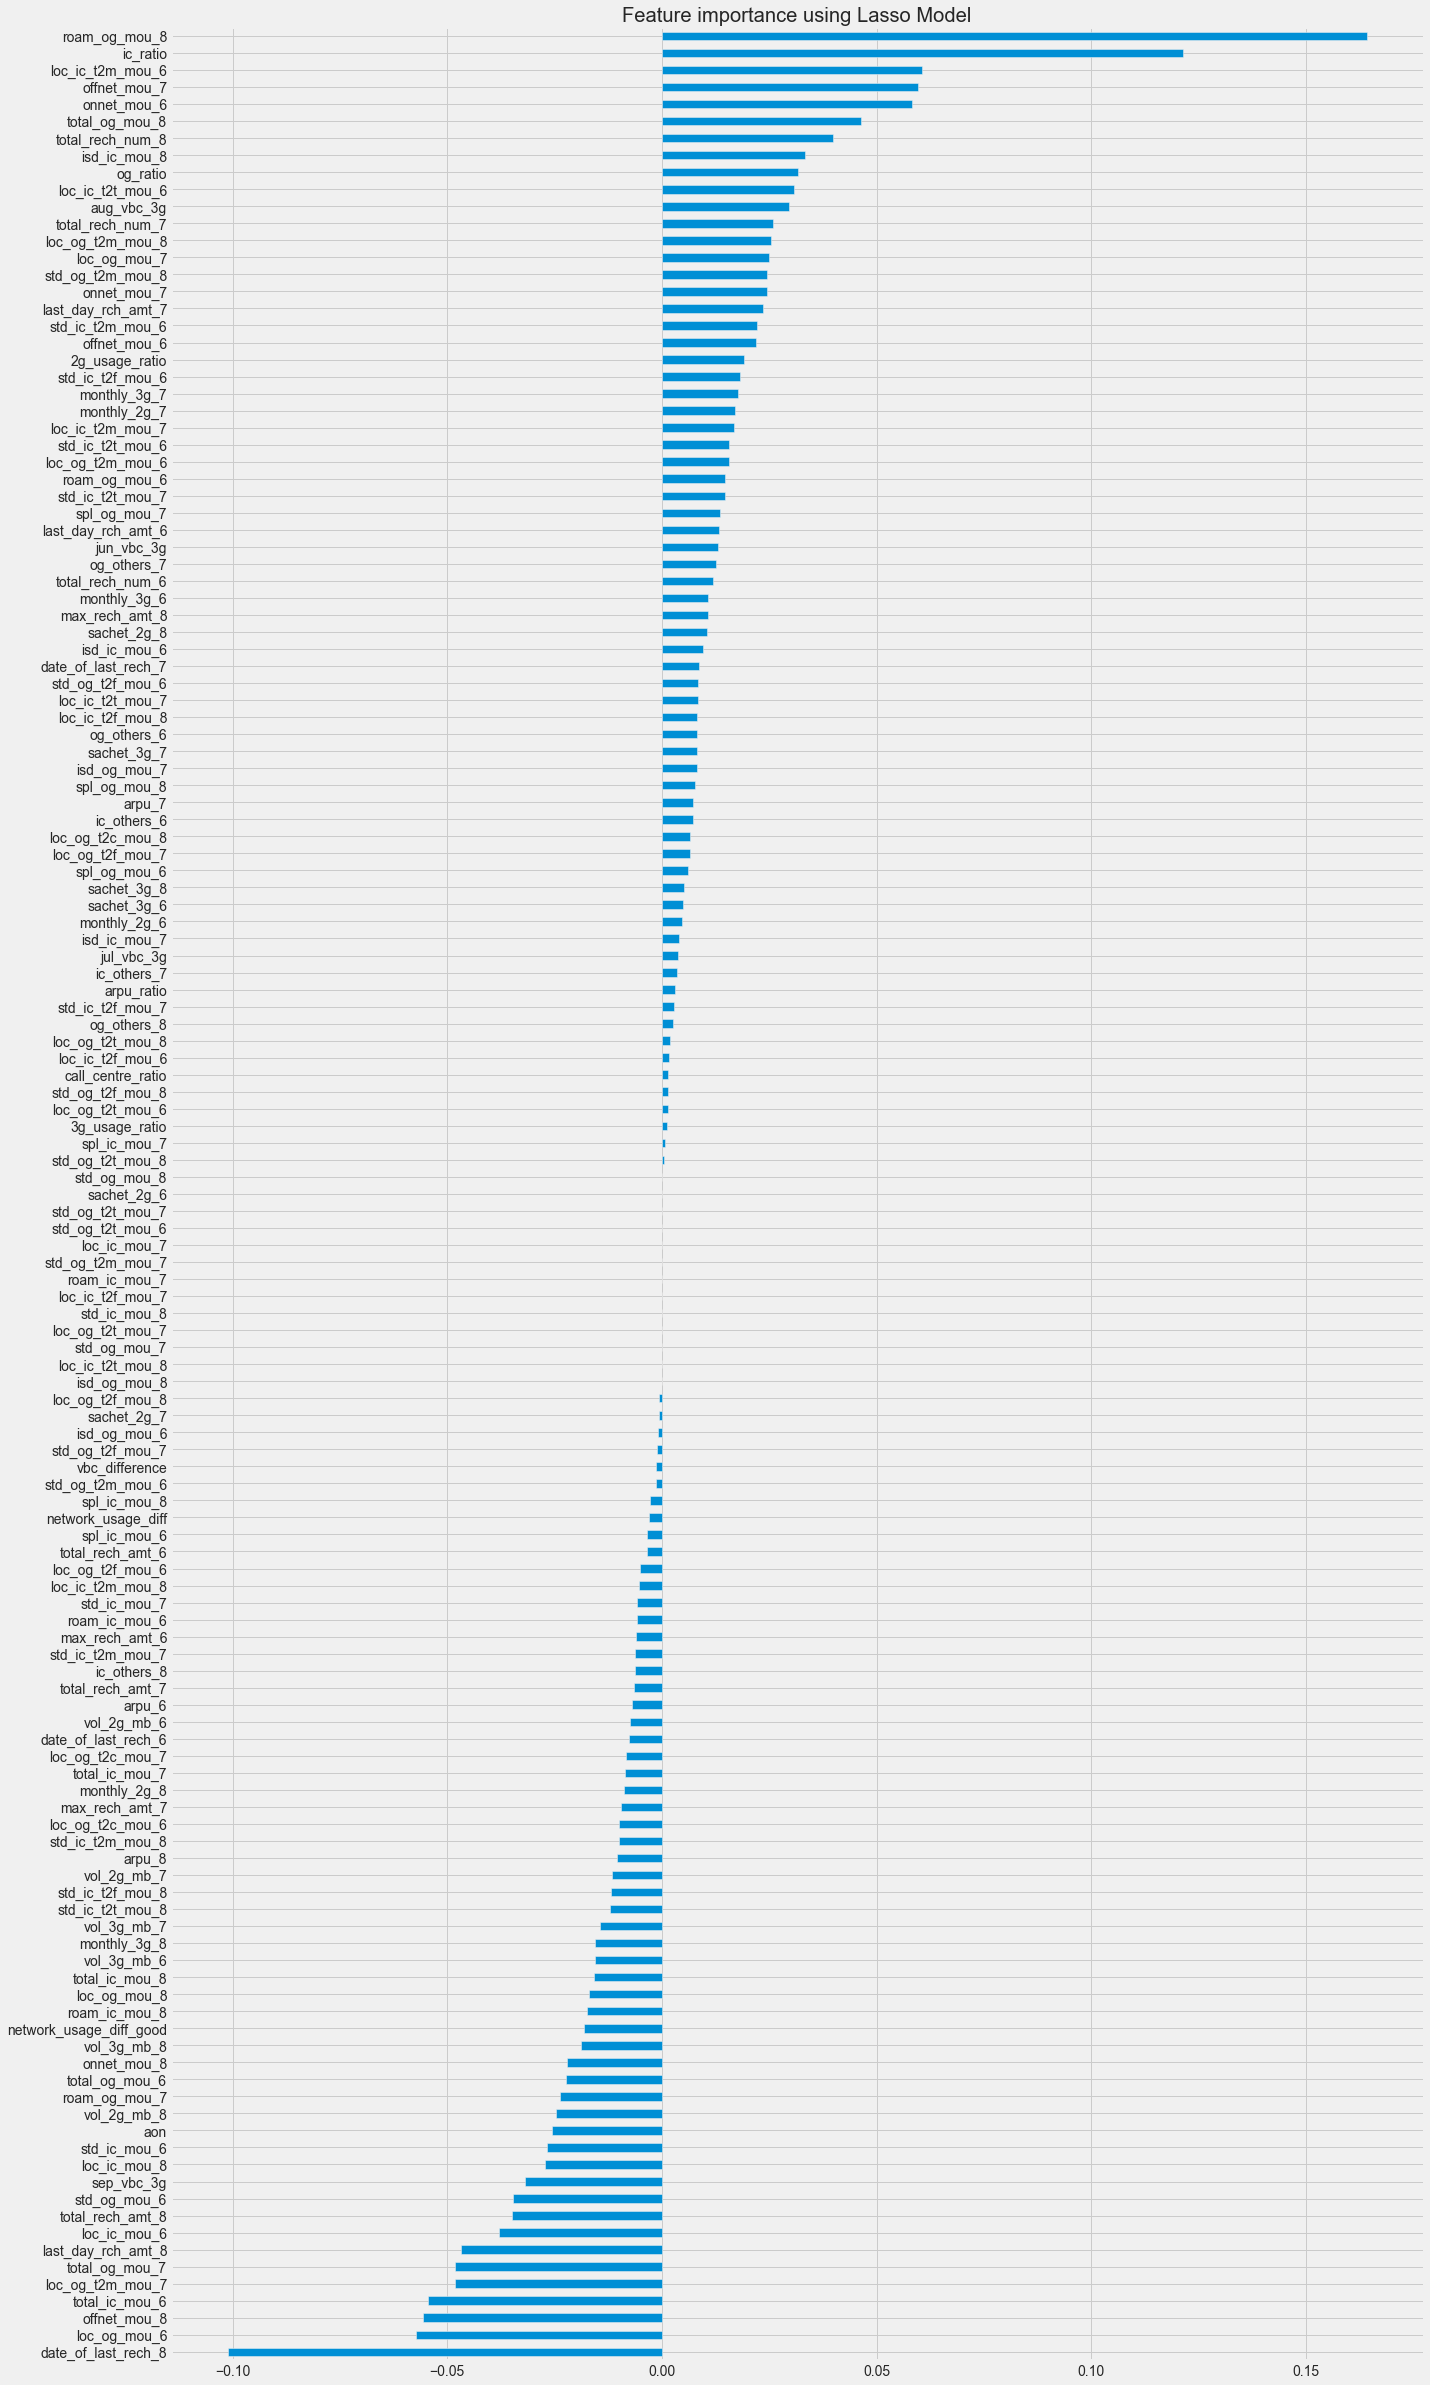

In [80]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 40)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [81]:
# The best indicators of churn in reverse order are:
imp_coef.tail(10)

loc_ic_t2t_mou_6   0.030691
og_ratio           0.031640
isd_ic_mou_8       0.033299
total_rech_num_8   0.039830
total_og_mou_8     0.046439
onnet_mou_6        0.058261
offnet_mou_7       0.059633
loc_ic_t2m_mou_6   0.060460
ic_ratio           0.121245
roam_og_mou_8      0.164107
dtype: float64

In [82]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
# Logistic regression model, first training model
logm1 = sm.GLM(list(y_train),(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37972
Model:                            GLM   Df Residuals:                    37834
Model Family:                Binomial   Df Model:                          137
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9299.3
Date:                Fri, 22 Jan 2021   Deviance:                       18599.
Time:                        01:26:25   Pearson chi2:                 5.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0462      0.026      1.803      0.071      -0.004       0.096
arpu_6                     -0.1302      0.047     -2.770      0.006      -0.222      -0.038
arpu_7                      0.0102      0.050      0.203      0.839      -0.088       0.108
arpu_8                     -0.0462      0.042     -1.098      0.272      -0.129       0.036
onnet_mou_6                 0.8307      0.086      9.692      0.000       0.663       0.999
onnet_mou_7                 0.3781      0.075      5.038      0.000       0.231       0.525
onnet_mou_8                -0.0777      0.083     -0.941      0.347      -0.239       0.084
offnet_mou_6                0.1027      0.072      1.432      0.152      -0.038       0.243
offnet_mou_7                0.7157      0.075      9.554      0.000       0.569       0.863
offnet_mou_8               -0.5546      0.072     -7.742      0.000      -0.695      -0.414
roam_ic_mou_6              -0.0742      0.048     -1.556      0.120      -0.168       0.019
roam_ic_mou_7               0.0275      0.020      1.349      0.177      -0.012       0.067
roam_ic_mou_8              -0.2062      0.031     -6.739      0.000      -0.266      -0.146
roam_og_mou_6               0.1737      0.032      5.510      0.000       0.112       0.235
roam_og_mou_7              -0.2306      0.029     -7.928      0.000      -0.288      -0.174
roam_og_mou_8               1.2074      0.026     46.222      0.000       1.156       1.259
loc_og_t2t_mou_6            0.0858      0.067      1.277      0.202      -0.046       0.217
loc_og_t2t_mou_7           -0.1549      0.054     -2.874      0.004      -0.261      -0.049
loc_og_t2t_mou_8            0.2016      0.054      3.765      0.000       0.097       0.307
loc_og_t2m_mou_6            0.2169      0.109      1.983      0.047       0.002       0.431
loc_og_t2m_mou_7           -0.8673      0.081    -10.664      0.000      -1.027      -0.708
loc_og_t2m_mou_8            0.6765      0.083      8.174      0.000       0.514       0.839
loc_og_t2f_mou_6           -0.0793      0.032     -2.507      0.012      -0.141      -0.017
loc_og_t2f_mou_7            0.1033      0.033      3.164      0.002       0.039       0.167
loc_og_t2f_mou_8            0.0016      0.034      0.049      0.961      -0.064       0.067
loc_og_t2c_mou_6           -0.0108      0.033     -0.323      0.747      -0.076       0.055
loc_og_t2c_mou_7           -0.0640      0.033     -1.928      0.054      -0.129       0.001
loc_og_t2c_mou_8            0.0487      0.036      1.357      0.175      -0.022       0.119
loc_og_mou_6               -0.6794      0.144     -4.702      0.000      -0.963      -0.396
loc_og_mou_7                0.8938      0.102      8.735      0.000       0.693       1.094
loc_og_mou_8               -1.2095      0.112  

### RFE

In [84]:
logreg = LogisticRegression(random_state=100)

In [85]:
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [86]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,

In [87]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 45),
 ('arpu_7', False, 120),
 ('arpu_8', False, 101),
 ('onnet_mou_6', False, 17),
 ('onnet_mou_7', False, 27),
 ('onnet_mou_8', False, 38),
 ('offnet_mou_6', False, 88),
 ('offnet_mou_7', False, 8),
 ('offnet_mou_8', False, 9),
 ('roam_ic_mou_6', False, 89),
 ('roam_ic_mou_7', False, 107),
 ('roam_ic_mou_8', False, 20),
 ('roam_og_mou_6', False, 41),
 ('roam_og_mou_7', False, 28),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 64),
 ('loc_og_t2t_mou_7', False, 65),
 ('loc_og_t2t_mou_8', False, 53),
 ('loc_og_t2m_mou_6', False, 42),
 ('loc_og_t2m_mou_7', False, 11),
 ('loc_og_t2m_mou_8', False, 10),
 ('loc_og_t2f_mou_6', False, 87),
 ('loc_og_t2f_mou_7', False, 79),
 ('loc_og_t2f_mou_8', False, 123),
 ('loc_og_t2c_mou_6', False, 119),
 ('loc_og_t2c_mou_7', False, 93),
 ('loc_og_t2c_mou_8', False, 94),
 ('loc_og_mou_6', False, 4),
 ('loc_og_mou_7', False, 5),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 117),
 ('std_og_t2t_mou_7', False, 61),
 

In [88]:
col = X_train.columns[rfe.support_]
col

Index(['roam_og_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_mou_6', 'total_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'date_of_last_rech_8', 'last_day_rch_amt_8',
       'vol_3g_mb_8', 'aug_vbc_3g', 'sep_vbc_3g', 'ic_ratio'],
      dtype='object')

In [89]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'jul_vbc_3g', 'jun_vbc_3g', 'arpu_ratio', 'call_centre_ratio',
       'network_usage_diff', 'network_usage_diff_good', '2g_usage_ratio',
       '3g_usage_ratio', 'og_ratio', 'vbc_difference'],
      dtype='object', length=122)

### Model Assessment with stats model

In [90]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37972
Model:                            GLM   Df Residuals:                    37956
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10635.
Date:                Fri, 22 Jan 2021   Deviance:                       21271.
Time:                        01:27:27   Pearson chi2:                 5.54e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0888      0.020      4.477      0.000       0.050       0.128
roam_og_mou_8           1.0028      0.018     55.678      0.000       0.968       1.038
loc_og_mou_8           -0.5073      0.040    -12.612      0.000      -0.586      -0.428
loc_ic_t2t_mou_6        0.8329      0.038     21.819      0.000       0.758       0.908
loc_ic_t2m_mou_6        1.5370      0.069     22.290      0.000       1.402       1.672
loc_ic_mou_6           -2.2400      0.095    -23.534      0.000      -2.427      -2.053
total_ic_mou_8         -0.4054      0.045     -8.950      0.000      -0.494      -0.317
isd_ic_mou_8            0.4062      0.020     20.800      0.000       0.368       0.444
total_rech_num_7        0.4508      0.026     17.450      0.000       0.400       0.501
total_rech_num_8        0.2590      0.034      7.681      0.000       0.193       0.325
date_of_last_rech_8    -1.0471      0.023    -45.752      0.000      -1.092      -1.002
last_day_rch_amt_8     -0.5083      0.020    -25.459      0.000      -0.547      -0.469
vol_3g_mb_8            -0.4985      0.026    -19.373      0.000      -0.549      -0.448
aug_vbc_3g              0.4133      0.026     16.060      0.000       0.363       0.464
sep_vbc_3g             -0.6364      0.031    -20.494      0.000      -0.697      -0.576
ic_ratio                0.9048      0.036     24.848      0.000       0.833       0.976
=======================================================================================
"""

### Adding the probablity column

Now we add the probablity column as well as the prediction column in order to make our predictions.

In [91]:
# Get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.125140
1   0.011891
2   0.113612
3   0.302268
4   0.750458
5   0.006004
6   0.073427
7   0.019435
8   0.603218
9   0.155030
dtype: float64

In [92]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})

In [93]:
y_train_pred_final.head()

Churned  Churn_Prob
0        0    0.125140
1        0    0.011891
2        0    0.113612
3        1    0.302268
4        1    0.750458

In [94]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.035 else 0)

y_train_pred_final.head()

Churned  Churn_Prob  predicted
0        0    0.125140          1
1        0    0.011891          0
2        0    0.113612          1
3        1    0.302268          1
4        1    0.750458          1

## Confusion Metrics

In [95]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

In [96]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[ 6525 12461]
 [   51 18935]]


In [97]:
#overall accuracy check
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.6704940482460761


## VIFs

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features       VIF
4          loc_ic_mou_6 24.140000
3      loc_ic_t2m_mou_6 12.750000
5        total_ic_mou_8  6.880000
14             ic_ratio  4.700000
2      loc_ic_t2t_mou_6  4.160000
1          loc_og_mou_8  3.350000
8      total_rech_num_8  3.190000
12           aug_vbc_3g  2.370000
11          vol_3g_mb_8  2.220000
7      total_rech_num_7  1.750000
10   last_day_rch_amt_8  1.540000
9   date_of_last_rech_8  1.500000
0         roam_og_mou_8  1.400000
6          isd_ic_mou_8  1.290000
13           sep_vbc_3g  1.190000

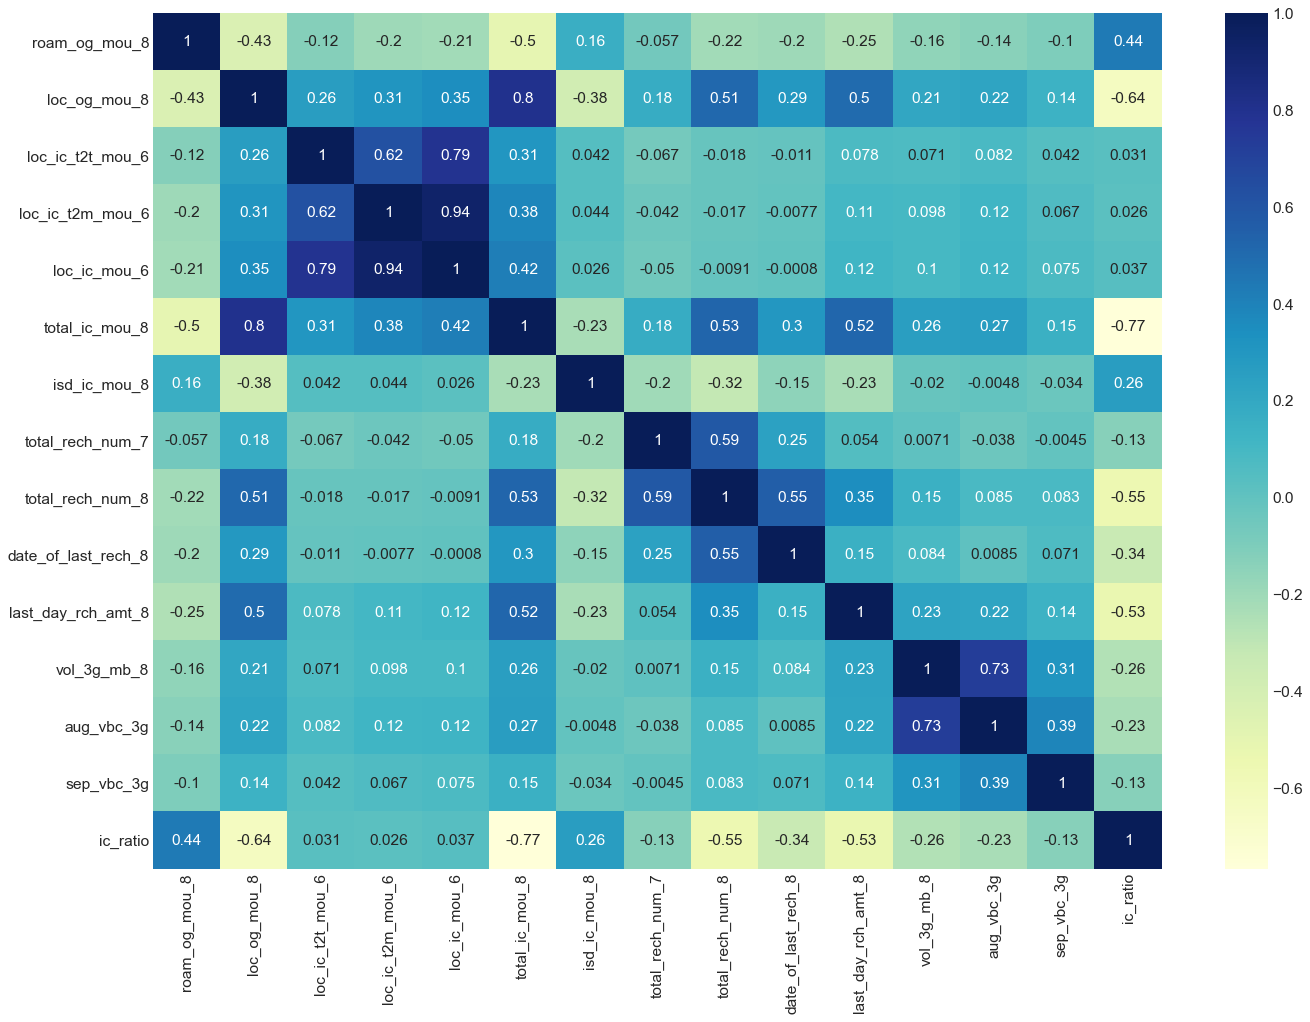

In [99]:
plt.figure(figsize=(18,13), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Removal of variables and updation of the Model

Some of the variable have high VIFs although the p-value of them are in a good state. Those variables are insignificant and can be dropped.

In [100]:
col = col.drop('loc_ic_mou_6', 1)
col

Index(['roam_og_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'total_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'date_of_last_rech_8', 'last_day_rch_amt_8',
       'vol_3g_mb_8', 'aug_vbc_3g', 'sep_vbc_3g', 'ic_ratio'],
      dtype='object')

In [101]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37972
Model:                            GLM   Df Residuals:                    37957
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10931.
Date:                Fri, 22 Jan 2021   Deviance:                       21862.
Time:                        01:27:31   Pearson chi2:                 5.28e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1264      0.020      6.468      0.000       0.088       0.165
roam_og_mou_8           1.0123      0.018     57.090      0.000       0.978       1.047
loc_og_mou_8           -0.5344      0.040    -13.459      0.000      -0.612      -0.457
loc_ic_t2t_mou_6        0.1571      0.024      6.662      0.000       0.111       0.203
loc_ic_t2m_mou_6        0.0594      0.026      2.244      0.025       0.008       0.111
total_ic_mou_8         -0.7635      0.042    -18.062      0.000      -0.846      -0.681
isd_ic_mou_8            0.4545      0.019     23.694      0.000       0.417       0.492
total_rech_num_7        0.4702      0.026     18.381      0.000       0.420       0.520
total_rech_num_8        0.2448      0.033      7.374      0.000       0.180       0.310
date_of_last_rech_8    -1.0308      0.022    -45.910      0.000      -1.075      -0.987
last_day_rch_amt_8     -0.5299      0.020    -27.089      0.000      -0.568      -0.492
vol_3g_mb_8            -0.4697      0.025    -18.800      0.000      -0.519      -0.421
aug_vbc_3g              0.3767      0.025     15.083      0.000       0.328       0.426
sep_vbc_3g             -0.6233      0.030    -20.888      0.000      -0.682      -0.565
ic_ratio                0.5573      0.032     17.442      0.000       0.495       0.620
=======================================================================================
"""

In [102]:
# Get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.154827
1   0.013315
2   0.131040
3   0.258182
4   0.988423
5   0.005292
6   0.061296
7   0.041602
8   0.631412
9   0.135403
dtype: float64

In [103]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churned  Churn_Prob
0        0    0.154827
1        0    0.013315
2        0    0.131040
3        1    0.258182
4        1    0.988423

In [104]:
values = y_train_pred_final.Churned * y_train_pred_final.Churn_Prob
m = values.mean()
m

0.4131805020008758

In [105]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > m else 0)
y_train_pred_final.head()

Churned  Churn_Prob  predicted
0        0    0.154827          0
1        0    0.013315          0
2        0    0.131040          0
3        1    0.258182          0
4        1    0.988423          1

In [106]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[16421  2565]
 [ 1829 17157]]


In [107]:
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.8842831560096913


In [108]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
4        total_ic_mou_8 6.100000
13             ic_ratio 4.050000
1          loc_og_mou_8 3.350000
7      total_rech_num_8 3.190000
11           aug_vbc_3g 2.370000
10          vol_3g_mb_8 2.220000
3      loc_ic_t2m_mou_6 2.110000
6      total_rech_num_7 1.740000
2      loc_ic_t2t_mou_6 1.730000
9    last_day_rch_amt_8 1.530000
8   date_of_last_rech_8 1.500000
0         roam_og_mou_8 1.390000
5          isd_ic_mou_8 1.280000
12           sep_vbc_3g 1.190000

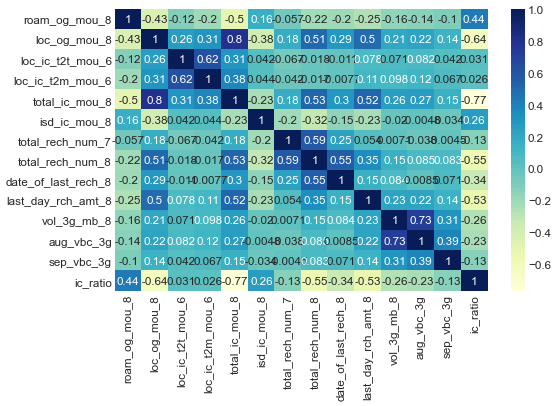

In [109]:
plt.figure(figsize=(10,7), dpi=60, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Removal of variables and updation of the Model

Some of the variable have high VIFs although the p-value of them are in a good state. Those variables are insignificant and can be dropped.

In [110]:
col = col.drop('total_ic_mou_8', 1)
col

Index(['roam_og_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'isd_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'vol_3g_mb_8',
       'aug_vbc_3g', 'sep_vbc_3g', 'ic_ratio'],
      dtype='object')

In [111]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37972
Model:                            GLM   Df Residuals:                    37958
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11101.
Date:                Fri, 22 Jan 2021   Deviance:                       22202.
Time:                        01:27:33   Pearson chi2:                 4.88e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0977      0.019      5.101      0.000       0.060       0.135
roam_og_mou_8           1.0488      0.018     59.788      0.000       1.014       1.083
loc_og_mou_8           -0.9146      0.035    -25.844      0.000      -0.984      -0.845
loc_ic_t2t_mou_6        0.0832      0.023      3.669      0.000       0.039       0.128
loc_ic_t2m_mou_6       -0.1021      0.024     -4.205      0.000      -0.150      -0.054
isd_ic_mou_8            0.4008      0.019     21.267      0.000       0.364       0.438
total_rech_num_7        0.4290      0.025     17.041      0.000       0.380       0.478
total_rech_num_8        0.1918      0.033      5.865      0.000       0.128       0.256
date_of_last_rech_8    -1.0057      0.022    -45.377      0.000      -1.049      -0.962
last_day_rch_amt_8     -0.5358      0.019    -27.643      0.000      -0.574      -0.498
vol_3g_mb_8            -0.4486      0.025    -18.181      0.000      -0.497      -0.400
aug_vbc_3g              0.3550      0.025     14.361      0.000       0.307       0.403
sep_vbc_3g             -0.6139      0.029    -21.007      0.000      -0.671      -0.557
ic_ratio                0.8509      0.026     32.263      0.000       0.799       0.903
=======================================================================================
"""

In [112]:
# Get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.174875
1   0.013186
2   0.102679
3   0.277652
4   0.990561
5   0.003846
6   0.067013
7   0.083841
8   0.619792
9   0.115861
dtype: float64

In [113]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churned  Churn_Prob
0        0    0.174875
1        0    0.013186
2        0    0.102679
3        1    0.277652
4        1    0.990561

In [114]:
values = y_train_pred_final.Churned * y_train_pred_final.Churn_Prob
m = values.mean()
m

0.41126636649780846

In [115]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > m else 0)
y_train_pred_final.head()

Churned  Churn_Prob  predicted
0        0    0.174875          0
1        0    0.013186          0
2        0    0.102679          0
3        1    0.277652          0
4        1    0.990561          1

In [116]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[16267  2719]
 [ 1863 17123]]


In [117]:
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.8793321394711893


In [118]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
6      total_rech_num_8 3.160000
1          loc_og_mou_8 2.670000
12             ic_ratio 2.600000
10           aug_vbc_3g 2.360000
9           vol_3g_mb_8 2.220000
3      loc_ic_t2m_mou_6 1.840000
5      total_rech_num_7 1.730000
2      loc_ic_t2t_mou_6 1.680000
8    last_day_rch_amt_8 1.530000
7   date_of_last_rech_8 1.500000
0         roam_og_mou_8 1.360000
4          isd_ic_mou_8 1.260000
11           sep_vbc_3g 1.190000

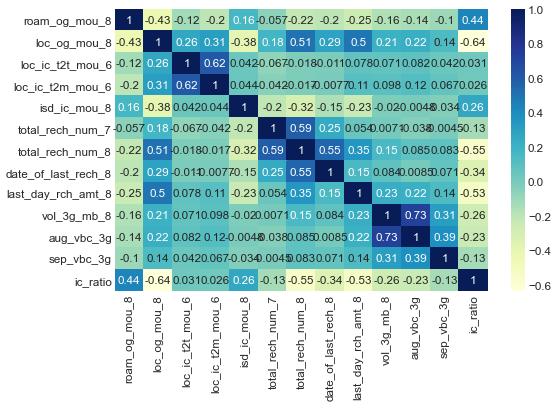

In [119]:
plt.figure(figsize=(10,7), dpi=60, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

## Our latest models features are as follows:

1. All variables have p-values equal to 0.
2. All the features have very low VIF values (less than 5) that means there is less muliticollinearity among the features as per heat map.
3. The overall accuracy of 0.88 at a probability threshold of 0.05 is quite acceptable. So we shouldn't drop more variables and we should proceed with the predictions using this model.

## Calculating Sensitivity and Specificity

In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.9018750658379859

In [122]:
# calculate specificity
TN / float(TN+FP)

0.8567892131043927

In [123]:
# false postive rate
print(FP/ float(TN+FP))

0.1432107868956073


In [124]:
# positive predicted value 
print (TP / float(TP+FP))

0.862967442798105


In [125]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8972421400992829


In [126]:
### ROC Curve

In [127]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [128]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churned, y_train_pred_final.Churn_Prob, drop_intermediate = False )

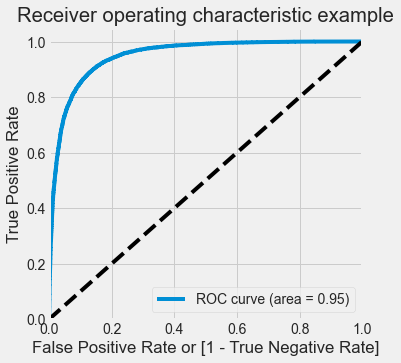

(array([0.        , 0.        , 0.        , ..., 0.99989466, 0.99994733,
        1.        ]),
 array([0.00000000e+00, 5.26703887e-05, 1.05340777e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99949466e+00, 9.99494659e-01, 9.99419363e-01, ...,
        3.03270067e-05, 1.36232422e-05, 6.06033375e-06]))

In [129]:
draw_roc(y_train_pred_final.Churned, y_train_pred_final.Churn_Prob)

### The area under the curve

In [130]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [131]:
auc = auc_val(fpr,tpr)
auc

0.948510797329797

## Finding the Probablity Cutoff Point

In [132]:
# create columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churned  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0        0    0.174875          0    1    1    0    0    0    0    0    0   
1        0    0.013186          0    1    0    0    0    0    0    0    0   
2        0    0.102679          0    1    1    0    0    0    0    0    0   
3        1    0.277652          0    1    1    1    0    0    0    0    0   
4        1    0.990561          1    1    1    1    1    1    1    1    1   

   0.8  0.9  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    1    1

In [133]:
#calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

             prob  accuracy    sensi    speci
0.000000 0.000000  0.500000 1.000000 0.000000
0.100000 0.100000  0.782603 0.986938 0.578268
0.200000 0.200000  0.847888 0.965238 0.730538
0.300000 0.300000  0.870931 0.936111 0.805752
0.400000 0.400000  0.878858 0.905825 0.851891
0.500000 0.500000  0.878331 0.870747 0.885916
0.600000 0.600000  0.871958 0.832403 0.911514
0.700000 0.700000  0.858685 0.783314 0.934057
0.800000 0.800000  0.834773 0.714685 0.954861
0.900000 0.900000  0.779258 0.584325 0.974192


In [134]:
### Plot of the accuracy, sensitivity and specificity for various probabilities

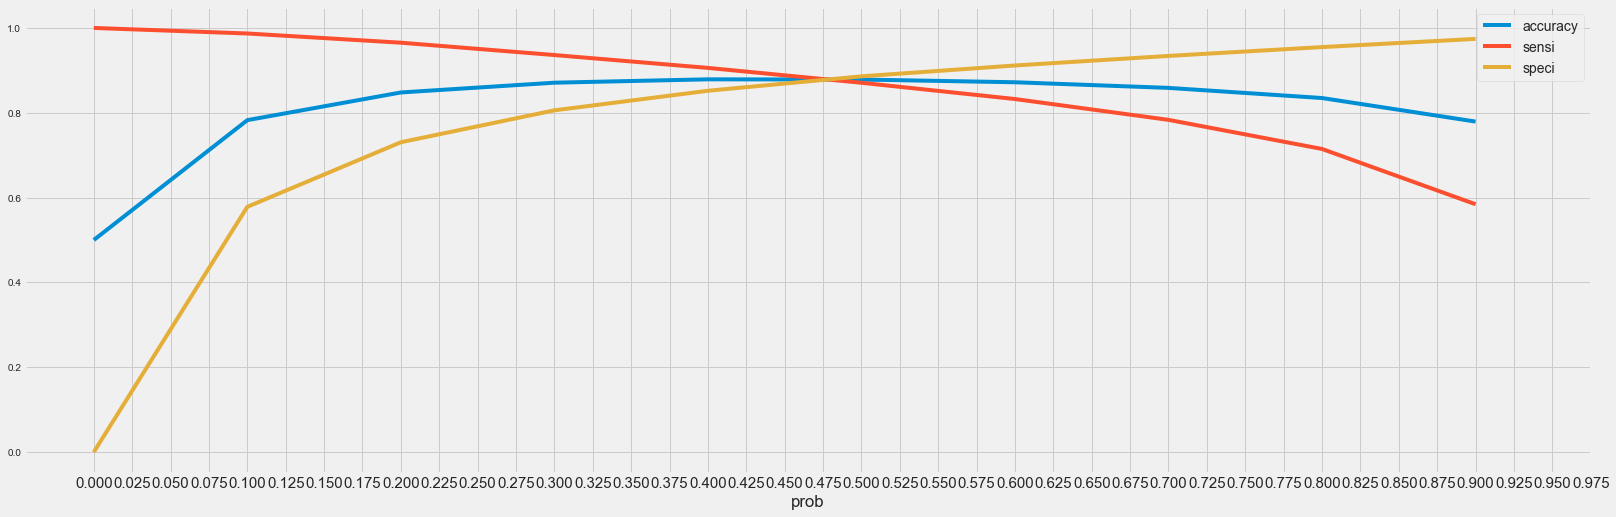

In [135]:
#plt.figure(figsize=(60, 30))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(25,8))
#plt.xticks(np.arange(0, 1, step=0.05), size = 15)
plt.xticks(np.arange(0, 1, step=0.025), size = 15)                    
plt.yticks(size = 10)
plt.show()



In [136]:
### 0.48 is the optimum point to take it as a cutoff probability

In [137]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.48 else 0)

y_train_pred_final.head()

Churned  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0        0    0.174875          0    1    1    0    0    0    0    0    0   
1        0    0.013186          0    1    0    0    0    0    0    0    0   
2        0    0.102679          0    1    1    0    0    0    0    0    0   
3        1    0.277652          0    1    1    1    0    0    0    0    0   
4        1    0.990561          1    1    1    1    1    1    1    1    1   

   0.8  0.9  final_predicted  
0    0    0                0  
1    0    0                0  
2    0    0                0  
3    0    0                0  
4    1    1                1

In [138]:
metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)

0.8789107763615296

In [139]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.final_predicted)
confusion1

array([[16716,  2270],
       [ 2328, 16658]], dtype=int64)

In [140]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [141]:
#sensitivity 
TP / float(TP+FN)

0.877383335089013

In [142]:
#specificity
TN / float(TN+FP)

0.8804382176340462

In [143]:
#false postive rate
print(FP/ float(TN+FP))

0.11956178236595386


In [144]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8800718512256974


In [145]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8777567737870196


In [146]:
# Precision and Recall

In [147]:
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

0.8800718512256974

In [148]:
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

0.877383335089013

In [149]:
precision_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)

0.8800718512256974

In [150]:
recall_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)

0.877383335089013

In [151]:
y_train_pred_final.Churned, y_train_pred_final.final_predicted

(0        0
 1        0
 2        0
 3        1
 4        1
 5        0
 6        0
 7        0
 8        0
 9        0
 10       0
 11       0
 12       0
 13       0
 14       0
 15       0
 16       0
 17       0
 18       0
 19       0
 20       1
 21       1
 22       0
 23       0
 24       0
 25       0
 26       0
 27       0
 28       0
 29       0
 30       0
 31       0
 32       0
 33       0
 34       0
 35       0
 36       0
 37       0
 38       0
 39       0
 40       0
 41       0
 42       0
 43       0
 44       0
 45       0
 46       0
 47       0
 48       0
 49       1
 50       0
 51       0
 52       0
 53       0
 54       0
 55       0
 56       0
 57       0
 58       1
 59       1
 60       0
 61       0
 62       0
 63       0
 64       0
 65       0
 66       0
 67       0
 68       0
 69       0
 70       0
 71       0
 72       0
 73       0
 74       1
 75       0
 76       0
 77       0
 78       0
 79       0
 80       0
 81       0
 82       1
 83 

In [152]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churned, y_train_pred_final.Churn_Prob)

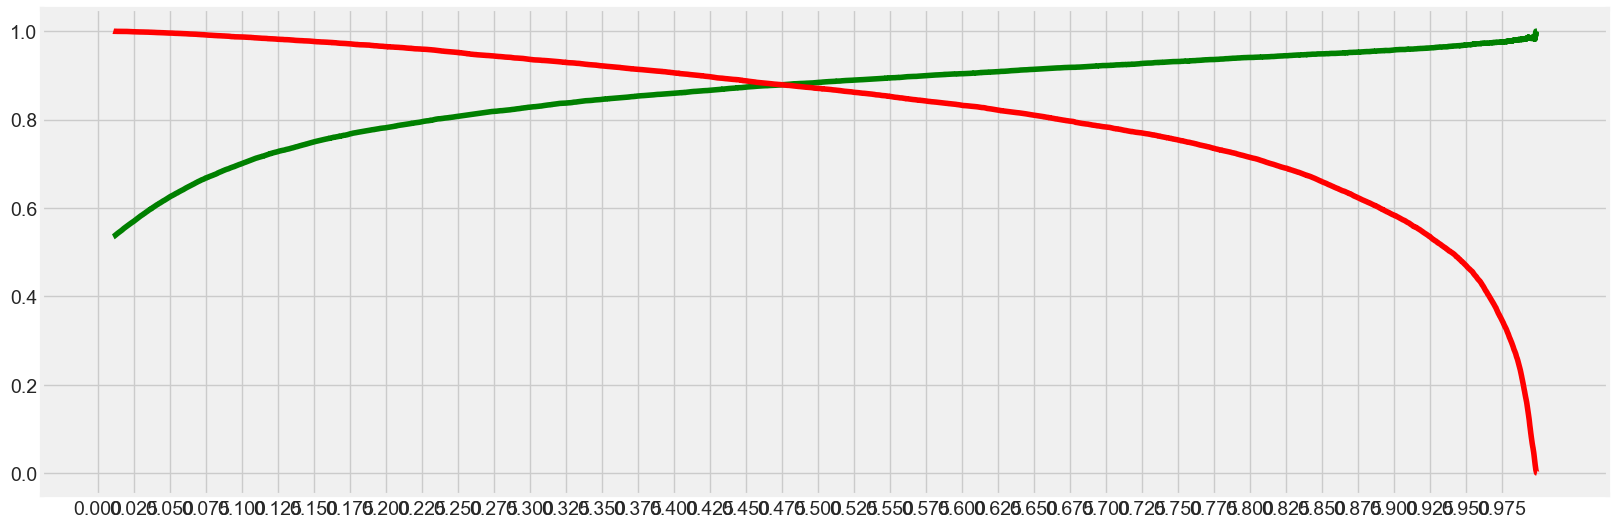

In [153]:
plt.figure(figsize=(18, 6), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.025))
plt.show()

### The optimal threshold value is 0.48

In [154]:
# F1 score
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8787255367410456

In [155]:
# Making predictions on the test set
X_test1 = X_test # Added by Madhu
X_test = X_test[col]
X_test.head()

roam_og_mou_8  loc_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  \
0      -0.962050      1.093000          0.473921         -0.999468   
1      -0.962050     -0.103142         -1.681889         -0.554243   
2      -0.962050     -0.308180         -0.404875         -0.251748   
3       1.800777     -0.475642         -1.965063         -2.285139   
4      -0.962050      0.621676         -1.965063         -2.285139   

   isd_ic_mou_8  total_rech_num_7  total_rech_num_8  date_of_last_rech_8  \
0     -0.725625         -1.080644         -0.111420             0.155354   
1     -0.725625          1.860863          2.362486             1.441745   
2     -0.725625         -0.588394         -0.333583            -1.844807   
3     -0.725625         -0.055672         -0.333583            -0.109290   
4     -0.725625          0.088613          0.936124             0.441823   

   last_day_rch_amt_8  vol_3g_mb_8  aug_vbc_3g  sep_vbc_3g  ic_ratio  
0            1.078188    -0.447155   -0.490941   -0.225656 -0.735189  
1            0.573020    -0.447155   -0.490941   -0.225656 -1.263721  
2            0.593612    -0.447155   -0.490941   -0.225656 -0.356800  
3            1.078188    -0.447155   -0.490941   -0.225656 -1.762038  
4            1.078188    -0.447155   -0.490941   -0.225656 -0.550648

In [156]:
X_test_sm = sm.add_constant(X_test)

In [157]:
y_test_pred = res.predict(X_test_sm)

In [158]:
y_test_pred[:10]

0   0.023207
1   0.068673
2   0.538384
3   0.576897
4   0.056832
5   0.077171
6   0.875173
7   0.084113
8   0.340357
9   0.049443
dtype: float64

In [159]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [160]:
y_pred_1.head()

0
0 0.023207
1 0.068673
2 0.538384
3 0.576897
4 0.056832

In [161]:
y_test_df = pd.DataFrame(y_test)

In [162]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [163]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [164]:
y_pred_final.head()

churn_data        0
0           0 0.023207
1           0 0.068673
2           0 0.538384
3           0 0.576897
4           0 0.056832

In [165]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [166]:
y_pred_final.head()

churn_data  Churn_Prob
0           0    0.023207
1           0    0.068673
2           0    0.538384
3           0    0.576897
4           0    0.056832

In [167]:
y_pred_final.shape

(8892, 2)

In [168]:
# Using the probability threshold value 0f 0.525 on the test dataset to predict if a churn will take place.

y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.525 else 0)

In [169]:
y_pred_final.head()

churn_data  Churn_Prob  final_predicted
0           0    0.023207                0
1           0    0.068673                0
2           0    0.538384                1
3           0    0.576897                1
4           0    0.056832                0

In [170]:
#accuracy.
acc_score=metrics.accuracy_score(y_pred_final.churn_data, y_pred_final.final_predicted)
acc_score

0.8887764282501125

In [171]:
confusion_test = metrics.confusion_matrix(y_pred_final.churn_data, y_pred_final.final_predicted )
print(confusion_test)

[[7277  843]
 [ 146  626]]


In [172]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [173]:
#sensitivity
TP / float(TP+FN)

0.810880829015544

In [174]:
#specificity
TN / float(TN+FP)

0.8961822660098522

In [175]:
# false postive rate
print(FP/ float(TN+FP))

0.10381773399014778


In [176]:
# Positive predictive value 
print (TP / float(TP+FP))

0.426140231449966


In [177]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9803314023979524


In [178]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.426140231449966

In [179]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.810880829015544

In [180]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.5586791610887997

In [181]:
print(classification_report(y_pred_final.churn_data, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8120
           1       0.43      0.81      0.56       772

    accuracy                           0.89      8892
   macro avg       0.70      0.85      0.75      8892
weighted avg       0.93      0.89      0.90      8892



In [182]:
# Cross Validation Score To avoid overfitting, calculate the Cross Validation Score to see how our model performs

In [183]:
lr = LogisticRegression(solver = 'lbfgs',random_state=42)
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.92948718 0.93049933 0.93151147 0.93218623 0.932861   0.93522267
 0.93553831 0.93556005 0.93724696 0.93724696]
0.9337360168119357


In [184]:
# ROC for test data set
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [185]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.churn_data, y_pred_final.Churn_Prob, drop_intermediate = False )

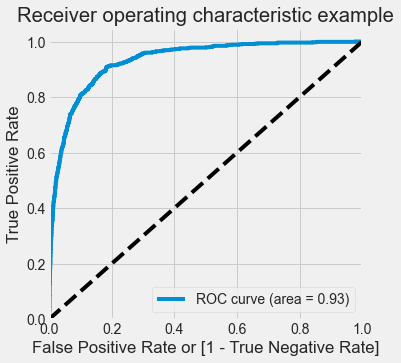

(array([0.        , 0.        , 0.        , ..., 0.99975369, 0.99987685,
        1.        ]),
 array([0.        , 0.00129534, 0.00259067, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99966360e+00, 9.99663600e-01, 9.99377699e-01, ...,
        5.56103641e-05, 2.46702502e-05, 3.08547906e-06]))

In [186]:
draw_roc(y_pred_final.churn_data, y_pred_final.Churn_Prob)

In [187]:
# Area under curve
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [188]:
auc = auc_val(fpr,tpr)
auc

0.9310418208733562

As a rule of thumb, an AUC can be classed as follows,

0.90 - 1.00 = excellent

0.80 - 0.90 = good

0.70 - 0.80 = fair

0.60 - 0.70 = poor

0.50 - 0.60 = fail

Auc is 0.93, our model seems to be doing excellent on the test dataset.

In [189]:
### Feature Importance
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

roam_og_mou_8          1.05
loc_og_mou_8          -0.91
loc_ic_t2t_mou_6       0.08
loc_ic_t2m_mou_6      -0.10
isd_ic_mou_8           0.40
total_rech_num_7       0.43
total_rech_num_8       0.19
date_of_last_rech_8   -1.01
last_day_rch_amt_8    -0.54
vol_3g_mb_8           -0.45
aug_vbc_3g             0.36
sep_vbc_3g            -0.61
ic_ratio               0.85
dtype: float64

In [190]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

roam_og_mou_8         100.00
loc_og_mou_8          -87.21
loc_ic_t2t_mou_6        7.94
loc_ic_t2m_mou_6       -9.73
isd_ic_mou_8           38.22
total_rech_num_7       40.90
total_rech_num_8       18.29
date_of_last_rech_8   -95.89
last_day_rch_amt_8    -51.09
vol_3g_mb_8           -42.78
aug_vbc_3g             33.85
sep_vbc_3g            -58.53
ic_ratio               81.13
dtype: float64

In [191]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

roam_og_mou_8           7
loc_og_mou_8            1
loc_ic_t2t_mou_6       11
loc_ic_t2m_mou_6        8
isd_ic_mou_8            9
total_rech_num_7        3
total_rech_num_8        2
date_of_last_rech_8     6
last_day_rch_amt_8     10
vol_3g_mb_8             4
aug_vbc_3g              5
sep_vbc_3g             12
ic_ratio                0
dtype: int64

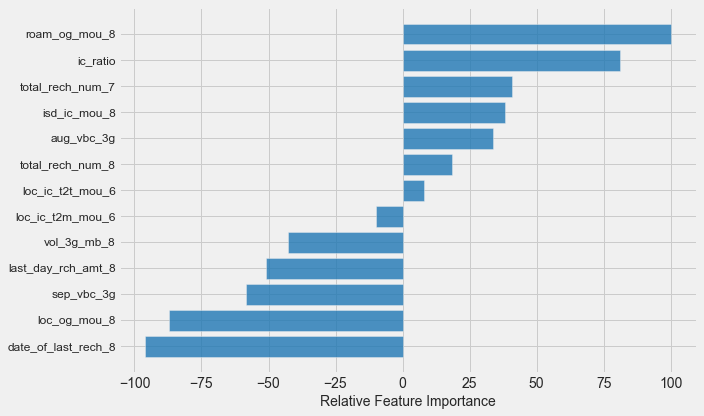

In [192]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

In [193]:
### Top 3 feature selection.
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

index      0
0      roam_og_mou_8 100.00
12          ic_ratio  81.13
5   total_rech_num_7  40.90

# PCA

In [194]:
#Import PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [195]:
X_train.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   -0.59   -0.36    0.20        -0.35        -0.31         0.05   
1   -0.29    0.21    1.50        -0.42        -0.70        -0.12   
2   -0.60   -0.37    0.26         0.14         0.18         0.61   
3   -0.81    0.11   -0.23         0.70         1.66         0.62   
4    0.12   -0.99   -1.19         0.82        -0.01        -1.73   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          0.08          0.11          0.56          -0.38          -0.29   
1         -0.29         -0.11          0.50          -0.38          -0.29   
2         -1.24         -1.21         -0.42          -0.38          -0.29   
3         -2.29         -2.56         -1.89          -0.38          -0.29   
4          0.36         -0.49          0.00          -0.38          -0.29   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0          -0.38          -0.68          -0.73          -0.96   
1          -0.38          -0.68          -0.73          -0.96   
2          -0.38          -0.68          -0.73          -0.96   
3          -0.38          -0.68          -0.73          -0.96   
4           0.42          -0.68          -0.73           0.65   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.56              0.73              0.83              0.50   
1             -0.49             -0.68             -0.11              0.65   
2             -1.85             -1.41             -0.71             -0.96   
3             -1.64             -1.83             -1.65             -2.18   
4              2.11              1.26              0.33             -0.68   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.65              1.13              0.33              1.57   
1              0.77              1.08              1.41              0.98   
2             -0.74             -0.84             -0.92             -0.91   
3             -1.71             -1.16             -0.92             -0.91   
4             -1.00              0.35              0.97             -0.91   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              1.49             -0.16             -0.07              0.41   
1              0.25             -0.16             -0.07              0.18   
2             -0.97             -0.16             -0.07              2.43   
3             -0.97             -0.16              0.03              0.18   
4              0.95             -0.16             -0.07             -2.06   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.44          0.49          0.91              0.17   
1          0.40          0.31          0.71              0.36   
2         -1.11         -0.72         -0.29              0.90   
3         -2.01         -1.06         -0.40              1.17   
4          1.34          0.17         -1.78             -0.19   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0             -0.08              0.17              0.28             -0.00   
1             -0.15              0.22             -0.42             -0.16   
2              0.88              1.19             -0.12             -0.19   
3              1.48              1.20             -0.78             -1.52   
4             -0.20              0.73              0.95              0.46   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.03              2.35              2.35              2.02   
1              0.17             -0.48             -0.48             -0.62   
2              0.30             -0.48             -0.48             -0.62   
3             -1.40             -0.48             -0.48             -0.62   
4              0.54              2.31             -0.48              1.63   

   std_og_mou_6  std_og_mou_7  std

In [196]:
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [197]:
print(pca.components_)
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head(10)

[[ 8.65284223e-03  8.91760327e-02  1.40641544e-01 ... -1.46101197e-01
  -1.36337779e-01 -1.49803459e-02]
 [-4.01612593e-02  8.33205611e-02  9.66317275e-02 ... -8.84275745e-02
  -8.89211756e-02 -3.89765596e-02]
 [-1.06161206e-01 -2.39477986e-02  2.82533088e-02 ... -8.05842876e-02
  -8.81314362e-02 -6.14562463e-03]
 ...
 [-3.49300691e-03  2.48191735e-03  2.93988425e-03 ...  2.86164030e-02
  -2.54586540e-02 -5.24111640e-04]
 [ 6.14831329e-04 -5.32013822e-03 -2.03819630e-03 ...  2.18453582e-02
  -1.40733991e-02 -5.50954992e-04]
 [ 1.91393292e-03  1.43853168e-03 -3.10849360e-03 ... -2.60379496e-02
   2.23408462e-02  5.79338900e-05]]


PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10        Feature
0  0.01 -0.04 -0.11  0.03  0.14 -0.07  0.08  0.27 -0.08 -0.12         arpu_6
1  0.09  0.08 -0.02  0.11  0.07 -0.09  0.04  0.05  0.17 -0.26         arpu_7
2  0.14  0.10  0.03  0.11 -0.05 -0.03  0.04  0.15 -0.03 -0.07         arpu_8
3 -0.02  0.08 -0.10 -0.06  0.15  0.10 -0.19  0.23 -0.03 -0.05    onnet_mou_6
4  0.03  0.16 -0.05 -0.00  0.09  0.08 -0.23  0.09  0.13 -0.15    onnet_mou_7
5  0.10  0.18  0.03  0.03 -0.01  0.03 -0.15  0.10 -0.09 -0.06    onnet_mou_8
6  0.02  0.01 -0.16 -0.05  0.08 -0.17  0.27  0.06 -0.04 -0.01   offnet_mou_6
7  0.07  0.09 -0.11  0.02 -0.01 -0.15  0.25 -0.08  0.09 -0.12   offnet_mou_7
8  0.11  0.04 -0.10  0.09 -0.13  0.03  0.23  0.09  0.06 -0.01   offnet_mou_8
9 -0.03 -0.01  0.03  0.08 -0.06 -0.09  0.01  0.11  0.03 -0.03  roam_ic_mou_6

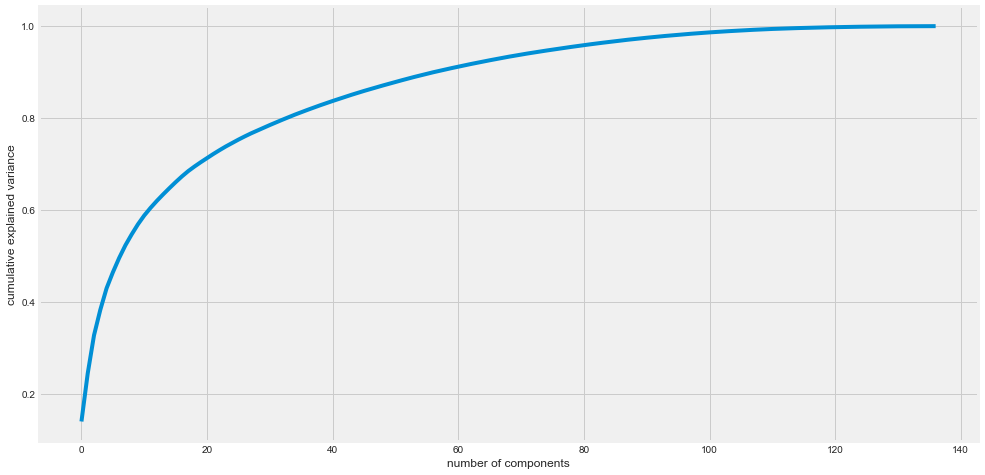

In [198]:
%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### 50 components explain ~90% of variance in the data.

In [199]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(37972, 50)

### Correlation matrix

In [200]:
corrmat = np.corrcoef(df_train_pca.transpose())

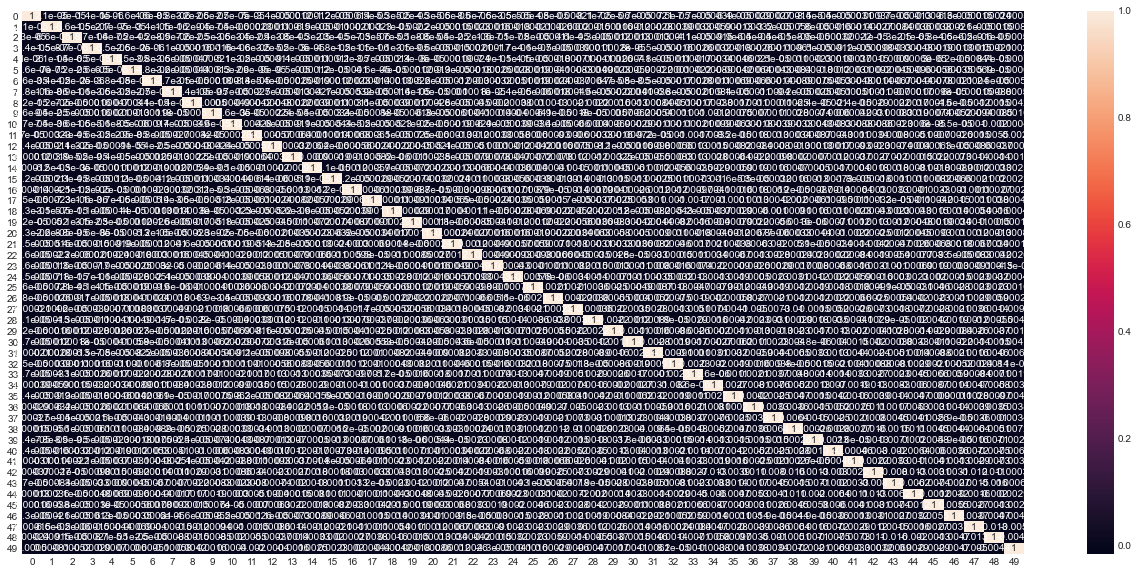

In [201]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [202]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# Observe that correlations are indeed very close to 0

max corr: 0.01604848173809026 , min corr:  -0.015995224435110846


In [203]:
#Apply selected components to the test data
df_test_pca = pca_final.transform(X_test1)
df_test_pca.shape

(8892, 50)

# RandomForestClassifier with PCA

In [204]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced',random_state=42)

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [205]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[7767,  353],
       [ 273,  499]], dtype=int64)

In [206]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.6463730569948186
Specificity:  0.9565270935960591
false postive rate:  0.043472906403940886
positive predictive value:  0.5856807511737089
Negative predictive value:  0.966044776119403
Misclassification Rate:  0.07040035987404408


### Hyperparameter tuning for RandomForest

In [207]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

rf_with_pca = RandomForestClassifier(class_weight='balanced',random_state=42)


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf_with_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [208]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           3.83          0.07             0.05            0.00   
1          10.65          0.07             0.07            0.00   
2          15.83          0.16             0.11            0.00   
3          19.01          0.21             0.13            0.01   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}               0.80               0.79   
1               7   {'max_depth': 7}               0.85               0.85   
2              12  {'max_depth': 12}               0.91               0.92   
3              17  {'max_depth': 17}               0.94               0.94   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0               0.81               0.80               0.81             0.80   
1               0.86               0.86               0.86             0.86   
2               0.92               0.92               0.92             0.92   
3               0.95               0.95               0.95             0.94   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0            0.01                4                0.81                0.81   
1            0.00                3                0.87                0.87   
2            0.01                2                0.96                0.96   
3            0.00                1                0.99                0.99   

   split2_train_score  split3_train_score  split4_train_score  \
0                0.80                0.81                0.81   
1                0.87                0.87                0.87   
2                0.96                0.96                0.96   
3                0.99                0.99                0.99   

   mean_train_score  std_train_score  
0              0.81             0.00  
1              0.87             0.00  
2              0.96             0.00  
3              0.99             0.00

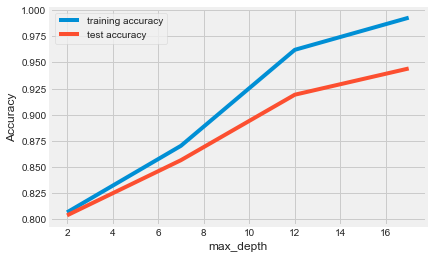

In [209]:
# plot accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [214]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(8,16,2),
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced',random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [215]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 35.3min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(8, 16, 2),
                         'max_features': [8, 10, 12],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': range(200, 400, 100)},
             refit='recall_score', verbose=1)

In [216]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of ',grid_search.best_score_,' using ',grid_search.best_params_)

We can get accuracy of  0.8713529218087874  using  {'max_depth': 14, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [217]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=14,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=200,
                             random_state=42)

In [218]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=14, max_features=8,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=200, random_state=42)

In [219]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [220]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8120
           1       0.43      0.77      0.55       772

    accuracy                           0.89      8892
   macro avg       0.70      0.84      0.75      8892
weighted avg       0.93      0.89      0.91      8892

[[7340  780]
 [ 177  595]]
accuracy_score:   0.8923751686909581


In [221]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[7340,  780],
       [ 177,  595]], dtype=int64)

In [222]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.8923751686909581
Sensitivity:  0.7707253886010362
Specificity:  0.9039408866995073
false postive rate:  0.0960591133004926
positive predictive value:  0.43272727272727274
Negative predictive value:  0.976453372355993
Misclassification Rate:  0.10762483130904184


# Recomendation for Model Selection
- Logistic Regression(Lasso and RFE) and Random Forest(with PCA) performed good for customer churn analysis for this particular dataset.
- LogisticRegression has an acuracy of 93% and AUC 0.93
- Accuracy of RandomForest with PCA has accuracy of 89% and sensitivity 0.77
- LogisticRegression is the best model out of the two

In [223]:
feature_names=list(X_train.columns.values)
res = pd.DataFrame(list(dict(zip(feature_names, rfc.feature_importances_)).items()))
res.columns = ["Feature","Importance"]

### Top 5 churn indicators 

In [226]:
res.sort_values(by ="Importance").tail(5)

Feature  Importance
7  offnet_mou_7        0.05
4   onnet_mou_7        0.06
8  offnet_mou_8        0.07
1        arpu_7        0.10
0        arpu_6        0.36